In [1]:
import sys 
sys.path.append("source")

In [2]:
import pandas
from pss2dataframe import create_dataframe
from PIL import Image
import numpy as np
import pandas as pd
import logging
import glob
import os
import matplotlib.pyplot as plt
import pickle as pkl
logger = logging.getLogger()
logger.setLevel(100)

In [3]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
N = 4
K = 4
M = 7

In [5]:
hv = "0001000"
seed = "0016"
path = "sandbox/images/{}/{}".format(hv,seed)
#path="images"
img_path = "{}/img/*".format(path)
image_list = glob.glob(img_path)
image_list.sort()

In [6]:
df_list = []
filename_list = []
for ind, file_name in enumerate( image_list[0:2000] ):
    print("{:6}/{:6}".format(ind,len(image_list)),end="\r")
    image = Image.open(file_name).convert("L")
    #image = squared( np.array(image) )
    image=np.array(image)
    df_list.append( create_dataframe( image,N,K,M) )
    filename_list.append( os.path.basename(file_name).replace(".png","") )

In [7]:
all_df = pd.concat( df_list ,axis=0)
tuples = list(zip( *[filename_list] ))
indexes = pd.MultiIndex.from_tuples(tuples,names=["file_name"])
all_df.set_index(indexes,inplace=True)

In [8]:
with open("{}/df.pkl".format(path),"wb") as f:
    pkl.dump(all_df,f)

In [9]:
with open("{}/df.pkl".format(path),"rb") as f:
    all_df = pkl.load(f)

In [10]:
df_pss_st = all_df.apply(lambda x: (x - x.mean() )/x.std(),axis=0) 
statics = ["IM_MAR","CF_MAR","BND_MMAR","CF_CA","BND_MCOR","CF_COUS","CF_CPAR","CF_RCOU","CF_RPAR","H0_PRO"]
#statics = ["C1","C2","C5","C3","C4","C6","C7","C8","C9","C10"]

In [11]:
df_pss_st

STATIC       IM_MAR                                                    \
SCALE          none                                                     
ORIENT         none                                                     
ID             mean       val      skew      kurt       max       min   
file_name                                                               
000001    -1.555085 -0.716576 -0.536846 -0.464588 -1.173044 -2.686471   
000002    -1.407647 -0.717227 -0.242811 -0.400307 -1.112601 -2.055455   
000003    -1.344883 -0.717311 -0.616050 -0.149707 -1.092454 -1.818825   
000004    -1.315382 -0.717301 -0.504198  0.318202 -1.072306 -1.739948   
000005    -1.300871 -0.717272 -0.532320  0.061141 -1.062233 -1.661071   
000006    -1.293379 -0.717246 -0.520158  0.112242 -1.062233 -1.661071   
000007    -1.289315 -0.717226 -0.495017  0.101243 -1.052159 -1.661071   
000008    -1.286969 -0.717212 -0.474943  0.118117 -1.052159 -1.661071   
000009    -1.285382 -0.717202 -0.483157  0.116362 -1.052159 -1.661071   
000010    -1.284232 -0.717195 -0.490255  0.110394 -1.052159 -1.661071   
000011    -1.283309 -0.717190 -0.485280  0.108069 -1.052159 -1.661071   
000012    -1.282582 -0.717189 -0.495954  0.109402 -1.052159 -1.661071   
000013    -1.281809 -0.717187 -0.499053  0.115020 -1.052159 -1.661071   
000014    -1.281112 -0.717186 -0.491139  0.112255 -1.052159 -1.661071   
000015    -1.280444 -0.717184 -0.471792  0.110772 -1.052159 -1.661071   
000016    -1.279791 -0.717184 -0.461817  0.122792 -1.052159 -1.661071   
000017    -1.279095 -0.717185 -0.463618  0.128775 -1.052159 -1.661071   
000018    -1.278454 -0.717184 -0.449719  0.134164 -1.052159 -1.661071   
000019    -1.277762 -0.717184 -0.443945  0.143545 -1.042085 -1.661071   
000020    -1.277122 -0.717184 -0.427231  0.127480 -1.042085 -1.661071   
000021    -1.276440 -0.717183 -0.421745  0.119214 -1.042085 -1.661071   
000022    -1.275795 -0.717182 -0.432225  0.110218 -1.042085 -1.661071   
000023    -1.275134 -0.717182 -0.425676  0.103868 -1.042085 -1.661071   
000024    -1.274413 -0.717181 -0.425496  0.104902 -1.042085 -1.661071   
000025    -1.273757 -0.717180 -0.424503  0.108926 -1.042085 -1.661071   
000026    -1.273134 -0.717180 -0.425068  0.113300 -1.042085 -1.661071   
000027    -1.272474 -0.717181 -0.407115  0.106851 -1.042085 -1.661071   
000028    -1.271762 -0.717180 -0.401728  0.115165 -1.042085 -1.661071   
000029    -1.271002 -0.717180 -0.382698  0.112562 -1.042085 -1.661071   
000030    -1.270319 -0.717179 -0.364517  0.116385 -1.042085 -1.661071   
000031    -1.269663 -0.717178 -0.352861  0.126880 -1.042085 -1.661071   
000032    -1.268992 -0.717178 -0.364671  0.122670 -1.042085 -1.661071   
000033    -1.268351 -0.717177 -0.364954  0.125051 -1.042085 -1.661071   
000034    -1.267657 -0.717175 -0.374702  0.128742 -1.042085 -1.661071   
000035    -1.266967 -0.717176 -0.399877  0.129840 -1.042085 -1.661071   
000036    -1.266275 -0.717175 -0.408363  0.122351 -1.042085 -1.661071   
000037    -1.265616 -0.717172 -0.414323  0.124867 -1.042085 -1.661071   
000038    -1.264880 -0.717172 -0.413868  0.118702 -1.042085 -1.661071   
000039    -1.264186 -0.717172 -0.400497  0.113987 -1.042085 -1.661071   
000040    -1.263493 -0.717171 -0.403656  0.112543 -1.042085 -1.661071   
000041    -1.262824 -0.717170 -0.438831  0.105866 -1.042085 -1.661071   
000042    -1.262043 -0.717168 -0.443809  0.097209 -1.042085 -1.661071   
000043    -1.261374 -0.717168 -0.454264  0.102259 -1.042085 -1.661071   
000044    -1.260722 -0.717168 -0.462607  0.109757 -1.042085 -1.661071   
000045    -1.260025 -0.717168 -0.479215  0.113927 -1.042085 -1.661071   
000046    -1.259313 -0.717167 -0.478803  0.116765 -1.042085 -1.661071   
000047    -1.258593 -0.717166 -0.484471  0.121031 -1.042085 -1.661071   
000048    -1.257990 -0.717167 -0.472743  0.130237 -1.042085 -1.661071   
000049    -1.257310 -0.717166 -0.461449  0.133289 -1.032012 -1.582194   
000050    -1.256613 -0.717167 -0.461557  0.132596 -1.03201

In [ ]:
#最終的な生成画像との統計量の差分をグラフにすることを考える

In [12]:
#真の距離(C1-C10)
df_distance_dict = {}
for static_name in statics:
    df_tmp = df_pss_st.loc[:,static_name]
    df_square =  (df_tmp - df_tmp.iloc[-1])**2
    #distance = np.sqrt(df_square.sum(axis=1))
    distance = np.sqrt(df_square.sum(axis=1)) / df_square.shape[1]
    #distance=df_square.sum(axis=1)
    df_distance_dict[static_name] = distance.values

In [13]:
#真の距離(Call)
df_distance_dict3 = {}
#for static_name in statics:
df_tmp2 = df_pss_st.loc[:,:]
df_square =  (df_tmp2 - df_tmp2.iloc[-1])**2
distance = np.sqrt(df_square.sum(axis=1))/782
#distance=df_square.sum(axis=1)
df_distance_dict3 = distance.values

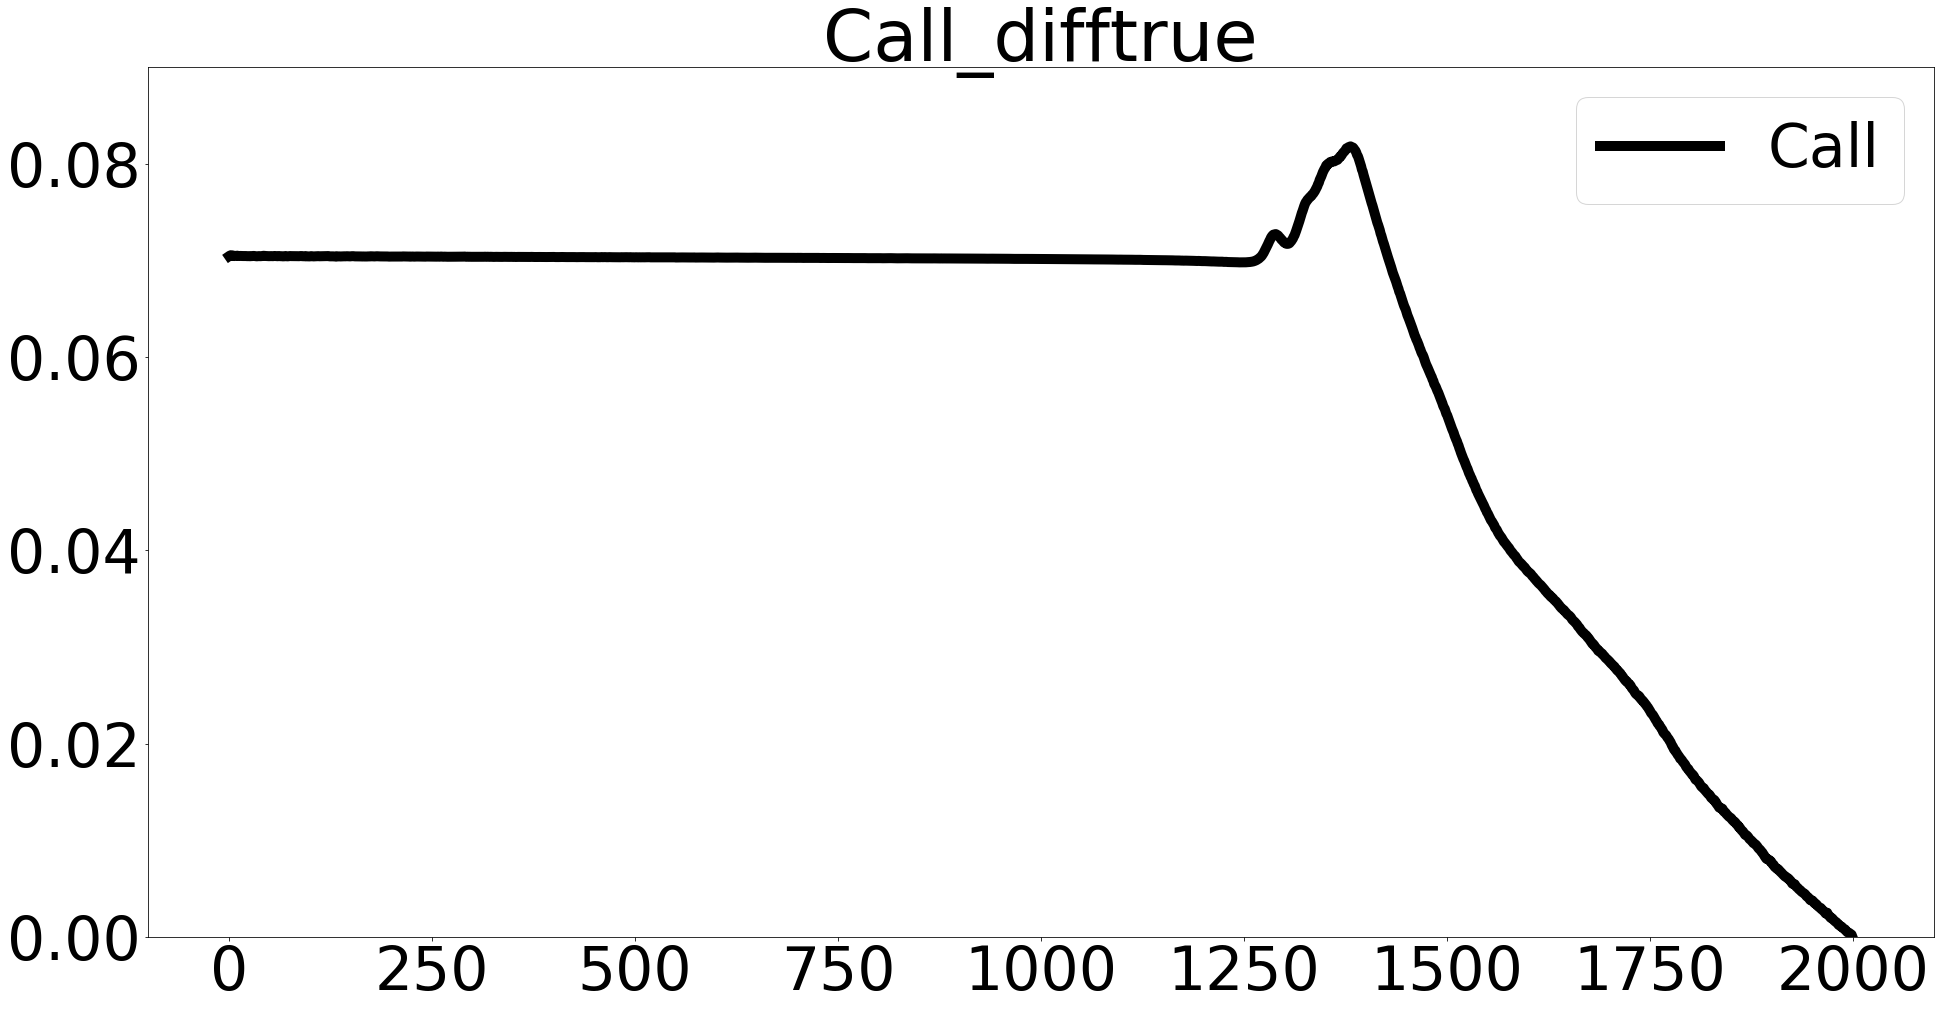

In [14]:
plt.figure(figsize=(32,16))
plt.rcParams["font.size"] = 60
#plt.plot(df_distance_dict["BND_MMAR"],color="red")
plt.plot(df_distance_dict3 ,color="black",  linewidth=10, label='Call')
plt.ylim(0, 0.09)
plt.title("Call_difftrue")
plt.legend()

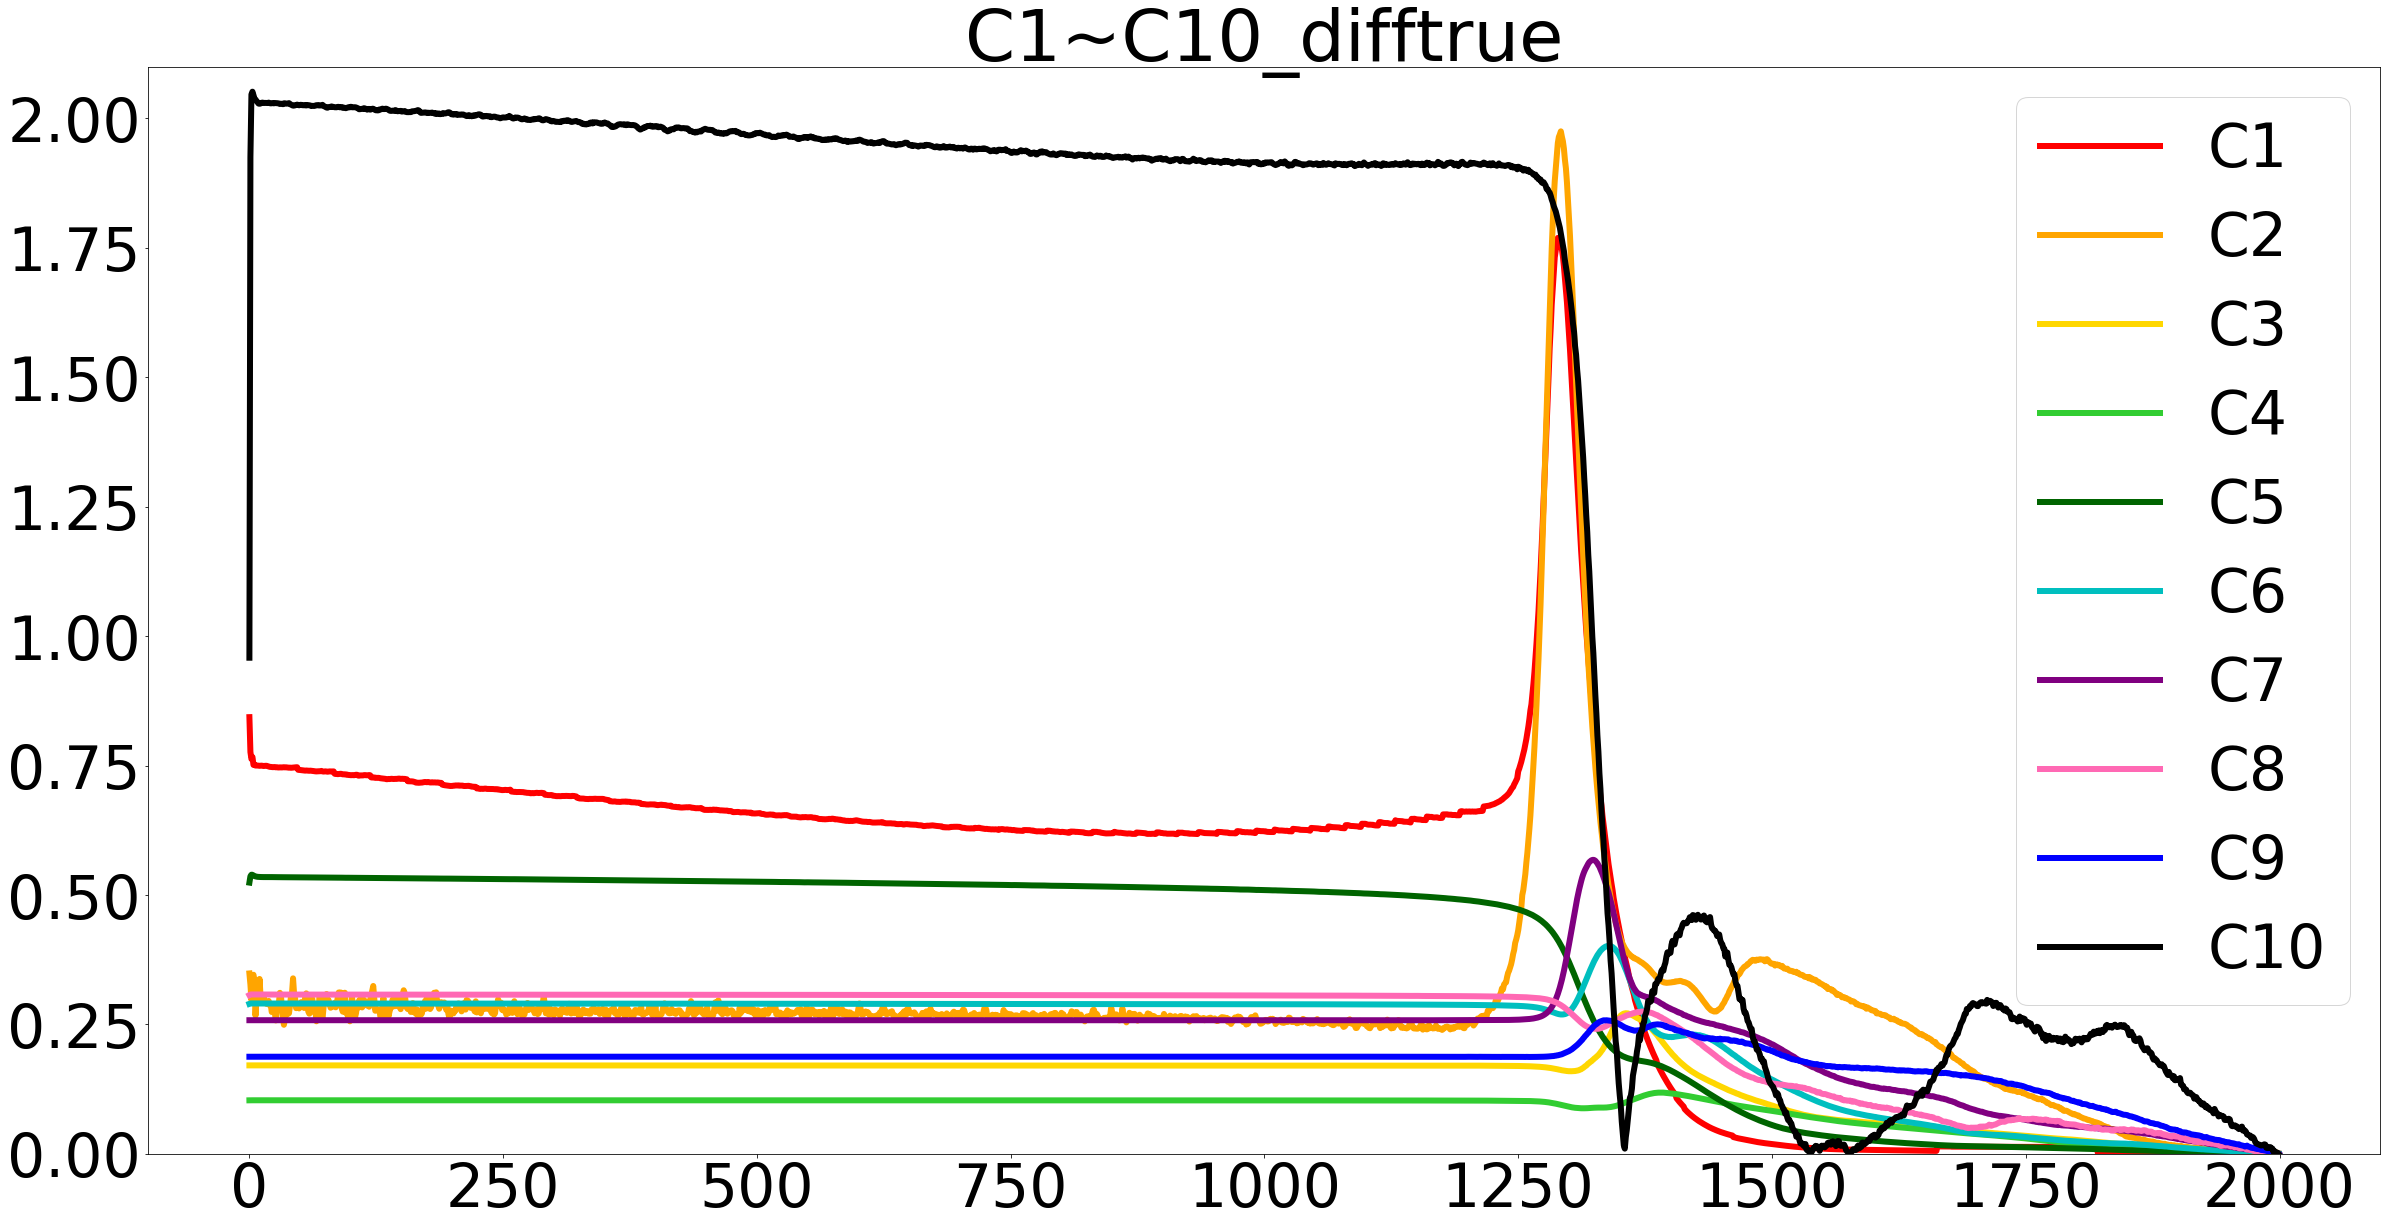

In [16]:
#statics = ["IM_MAR","CF_MAR","BND_MMAR","CF_CA","BND_MCOR","CF_COUS","CF_CPAR","CF_RCOU","CF_RPAR","H0_PRO"]
plt.figure(figsize=(40,20))
plt.rcParams["font.size"] = 60

plt.plot(df_distance_dict["IM_MAR"],label="C1", color="red", linewidth=6)#C1s

plt.plot(df_distance_dict["CF_MAR"],label="C2",color="orange", linewidth=6)#C2s
plt.plot(df_distance_dict["CF_CA"],label="C3",color="gold", linewidth=6) #C3s
plt.plot(df_distance_dict["BND_MCOR"],label="C4",color="limegreen", linewidth=6)#C4s
plt.plot(df_distance_dict["BND_MMAR"],label="C5",color="darkgreen", linewidth=6)#C5s
plt.plot(df_distance_dict["CF_COUS"],label="C6",color="c", linewidth=6)#C6s
plt.plot(df_distance_dict["CF_CPAR"],label="C7",color="purple", linewidth=6)#C7s
plt.plot(df_distance_dict["CF_RCOU"],label="C8",color="hotpink", linewidth=6)#C8s
plt.plot(df_distance_dict["CF_RPAR"],label="C9",color="blue", linewidth=6)#C9s
plt.plot(df_distance_dict["H0_PRO"],label="C10",color="black", linewidth=6)#C10s
#plt.bar(df_distance_dict["CF_RPAR"])
plt.ylim(0,2.1)
plt.title("C1~C10_difftrue")
plt.legend()

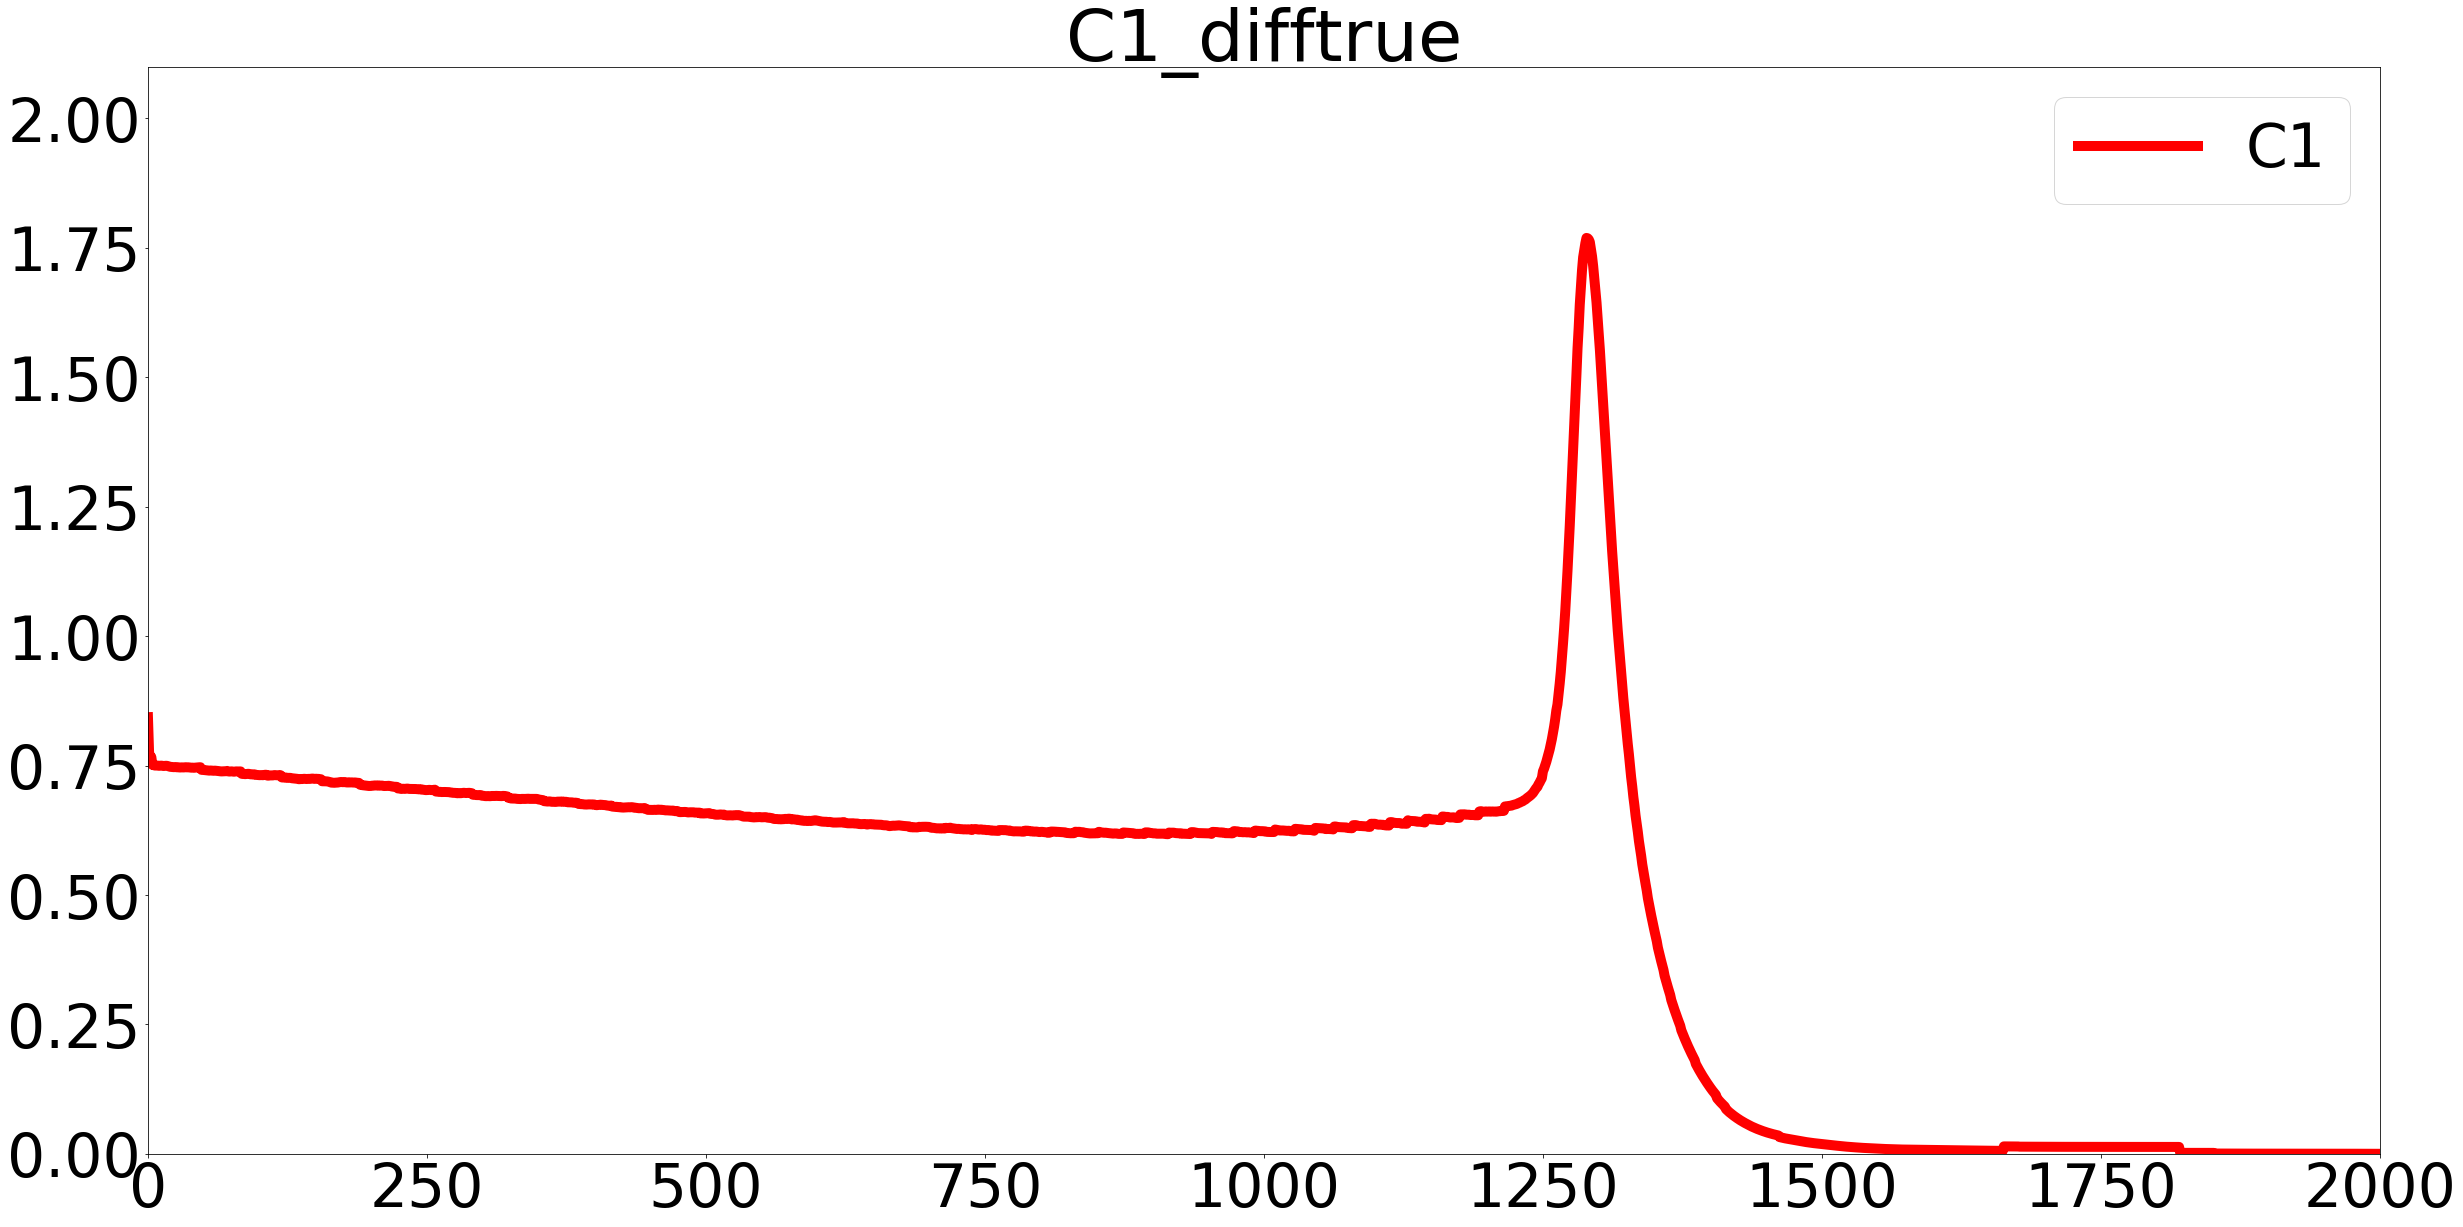

In [17]:
#statics = ["IM_MAR","CF_MAR","BND_MMAR","CF_CA","BND_MCOR","CF_COUS","CF_CPAR","CF_RCOU","CF_RPAR","H0_PRO"]
plt.figure(figsize=(40,20))
plt.rcParams["font.size"] = 60

plt.plot(df_distance_dict["IM_MAR"],color="red", label='C1', linewidth=10)#C1s
plt.ylim(0,2.1)
plt.xlim(0,2000)
plt.title("C1_difftrue")
plt.legend()

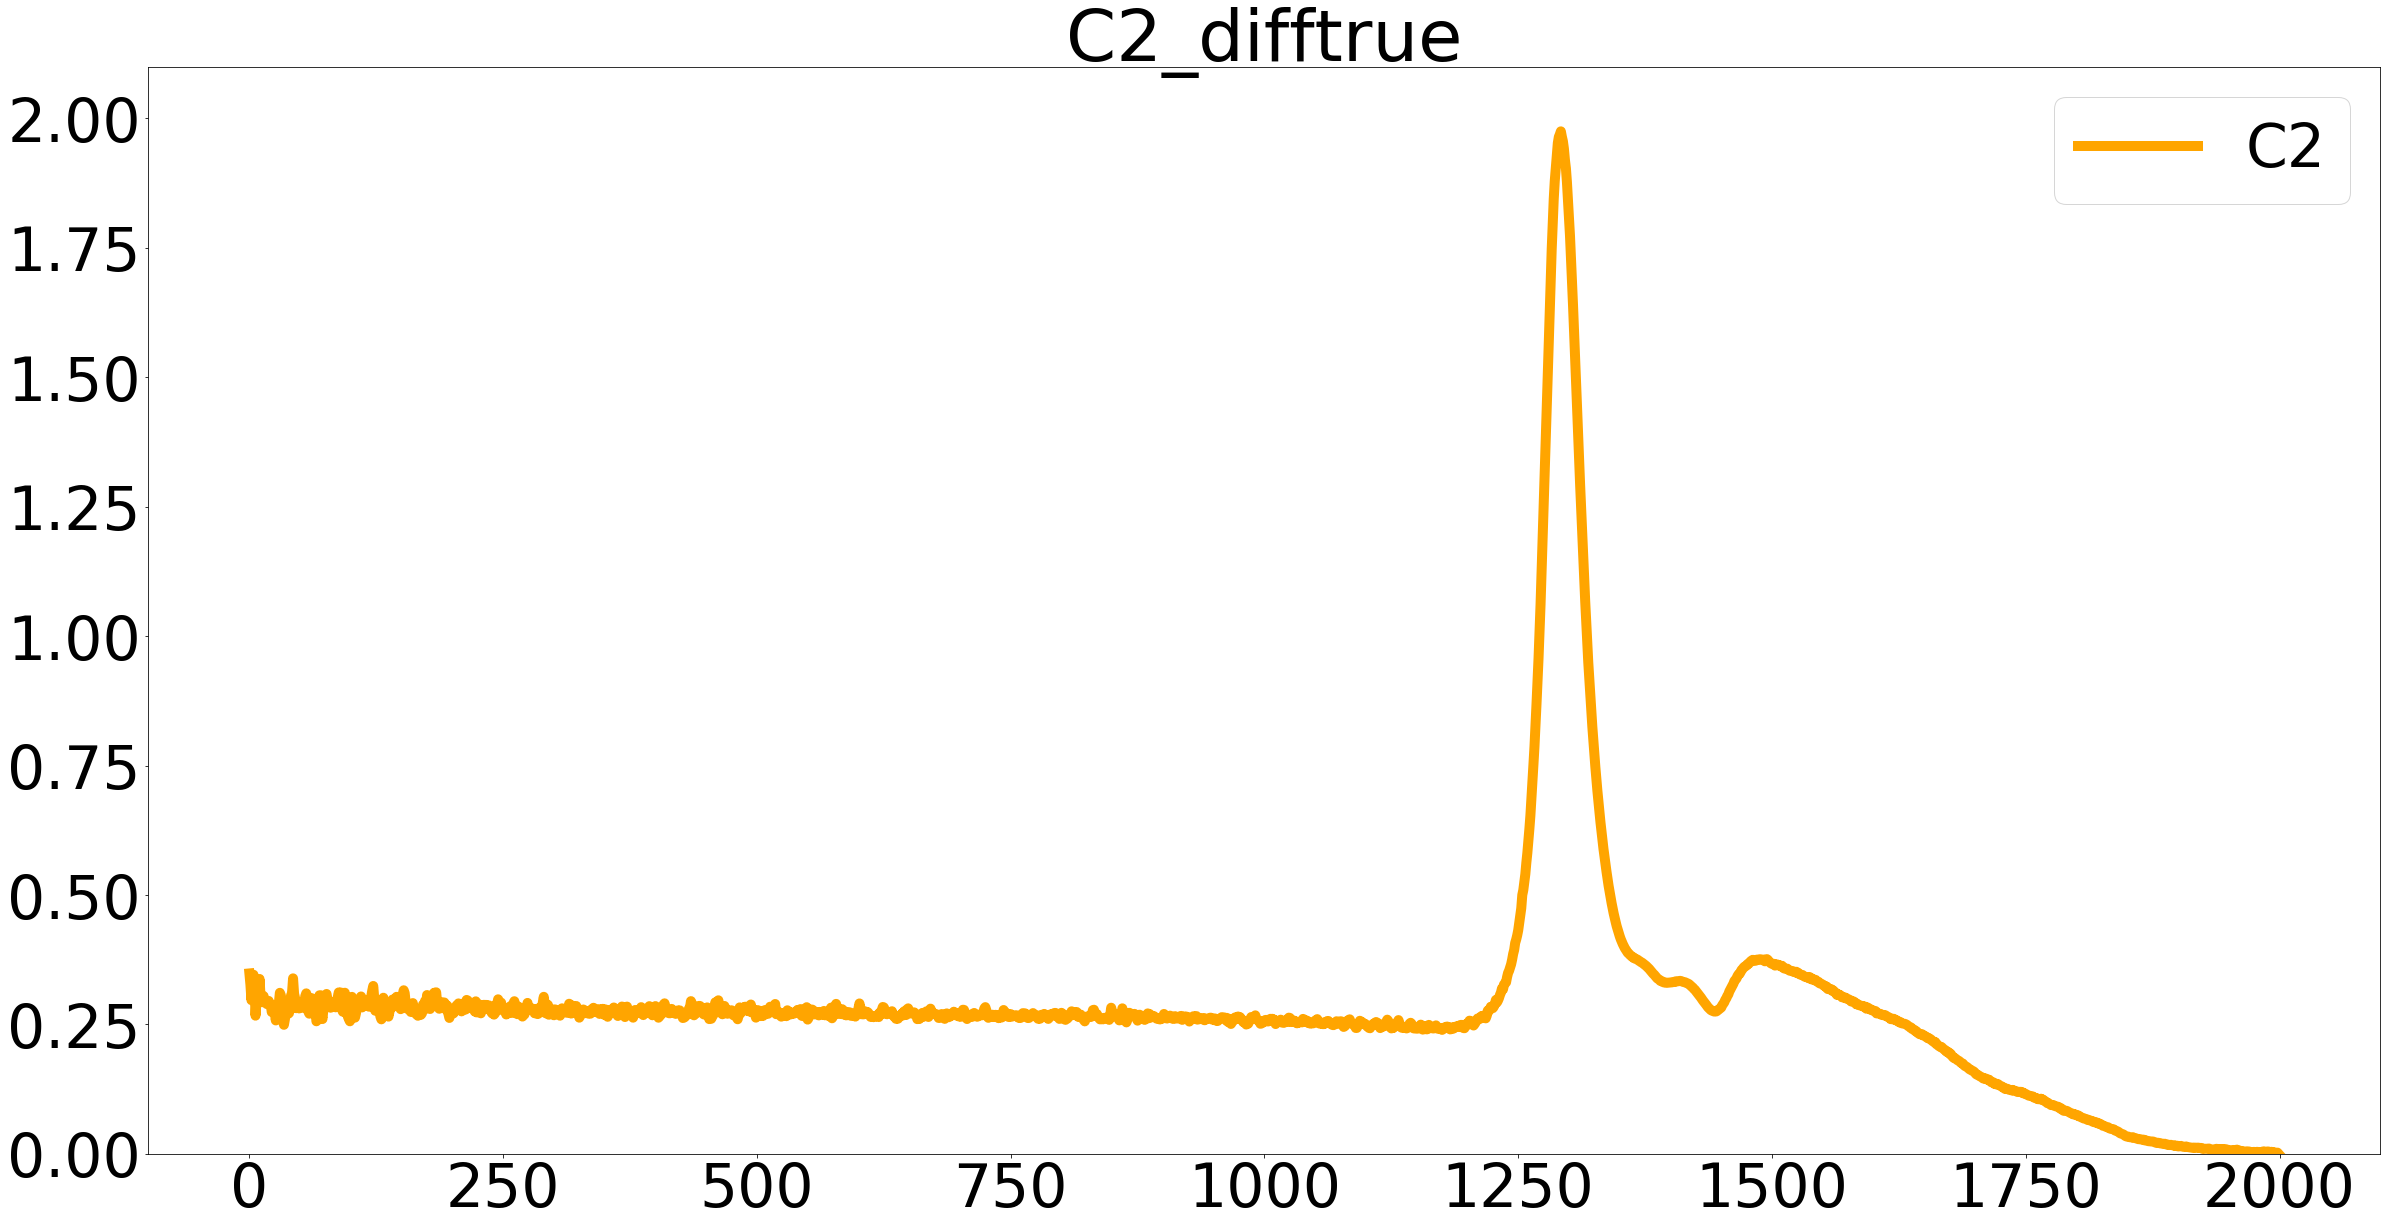

In [18]:
y=2.1
#statics = ["IM_MAR","CF_MAR","BND_MMAR","CF_CA","BND_MCOR","CF_COUS","CF_CPAR","CF_RCOU","CF_RPAR","H0_PRO"]
plt.figure(figsize=(40,20))
plt.rcParams["font.size"] = 60

plt.plot(df_distance_dict["CF_MAR"],label="C2",color="orange", linewidth=10)#C2s
plt.ylim(0,y)
#plt.xlim(0,20000)
plt.title("C2_difftrue")
plt.legend()

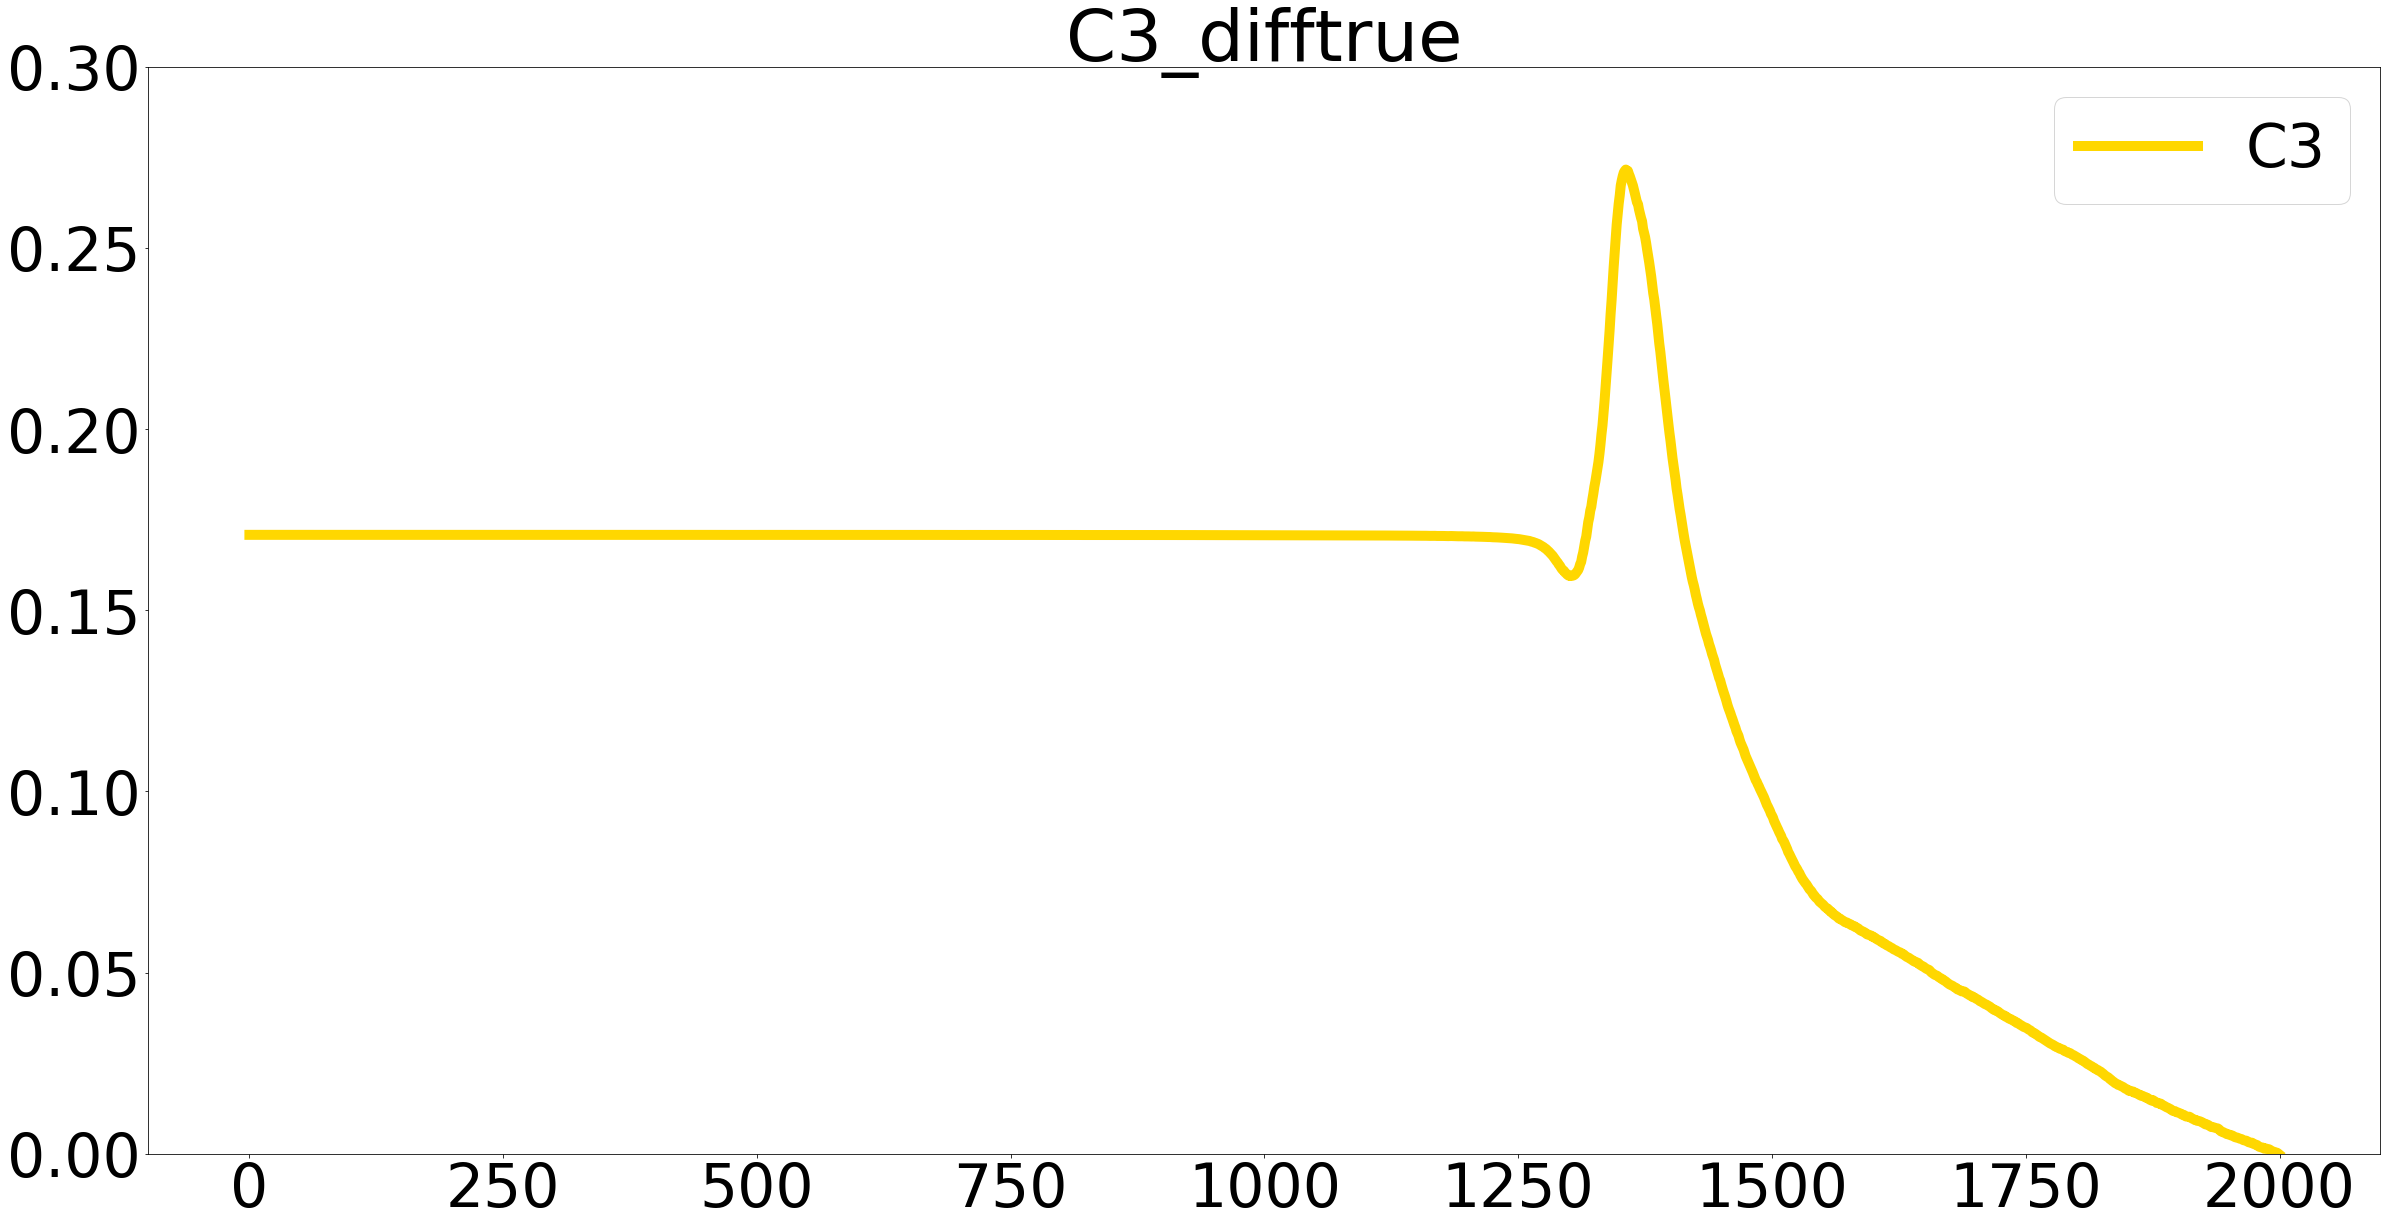

In [19]:
#statics = ["IM_MAR","CF_MAR","BND_MMAR","CF_CA","BND_MCOR","CF_COUS","CF_CPAR","CF_RCOU","CF_RPAR","H0_PRO"]
plt.figure(figsize=(40,20))
plt.rcParams["font.size"] = 60

plt.plot(df_distance_dict["CF_CA"],label="C3",color="gold", linewidth=10) #C3s
plt.ylim(0, y)
plt.ylim(0, .3)
plt.title("C3_difftrue")
plt.legend()

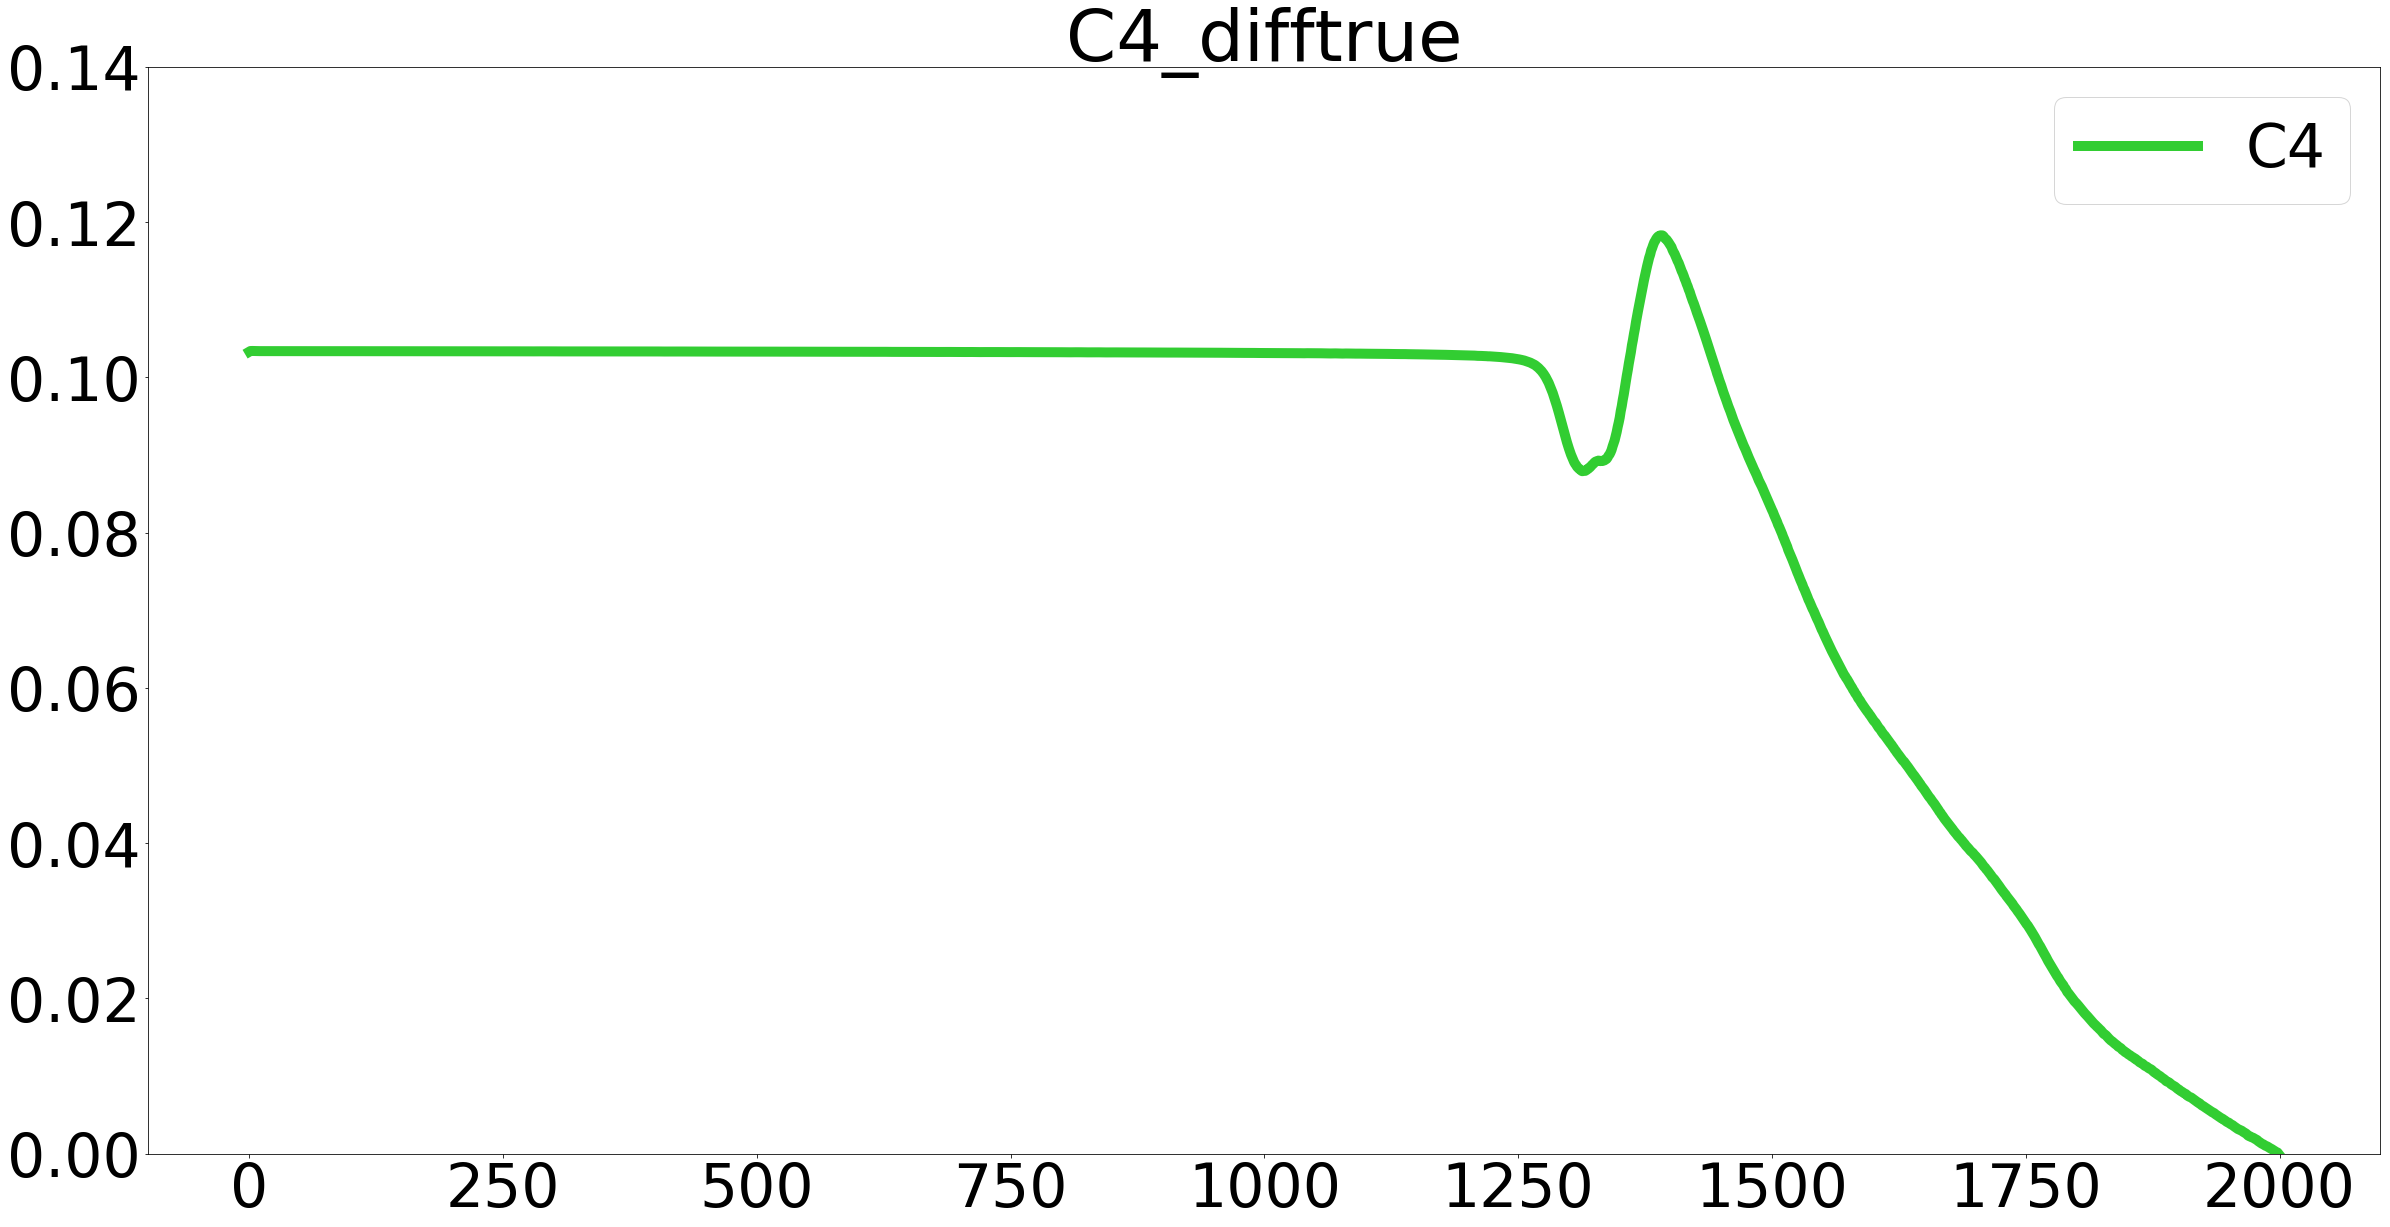

In [20]:
#statics = ["IM_MAR","CF_MAR","BND_MMAR","CF_CA","BND_MCOR","CF_COUS","CF_CPAR","CF_RCOU","CF_RPAR","H0_PRO"]
plt.figure(figsize=(40,20))
plt.rcParams["font.size"] = 60

plt.plot(df_distance_dict["BND_MCOR"],label="C4",color="limegreen", linewidth=10)#C4s
plt.ylim(0, y)
plt.ylim(0, .14)

plt.title("C4_difftrue")
plt.legend()

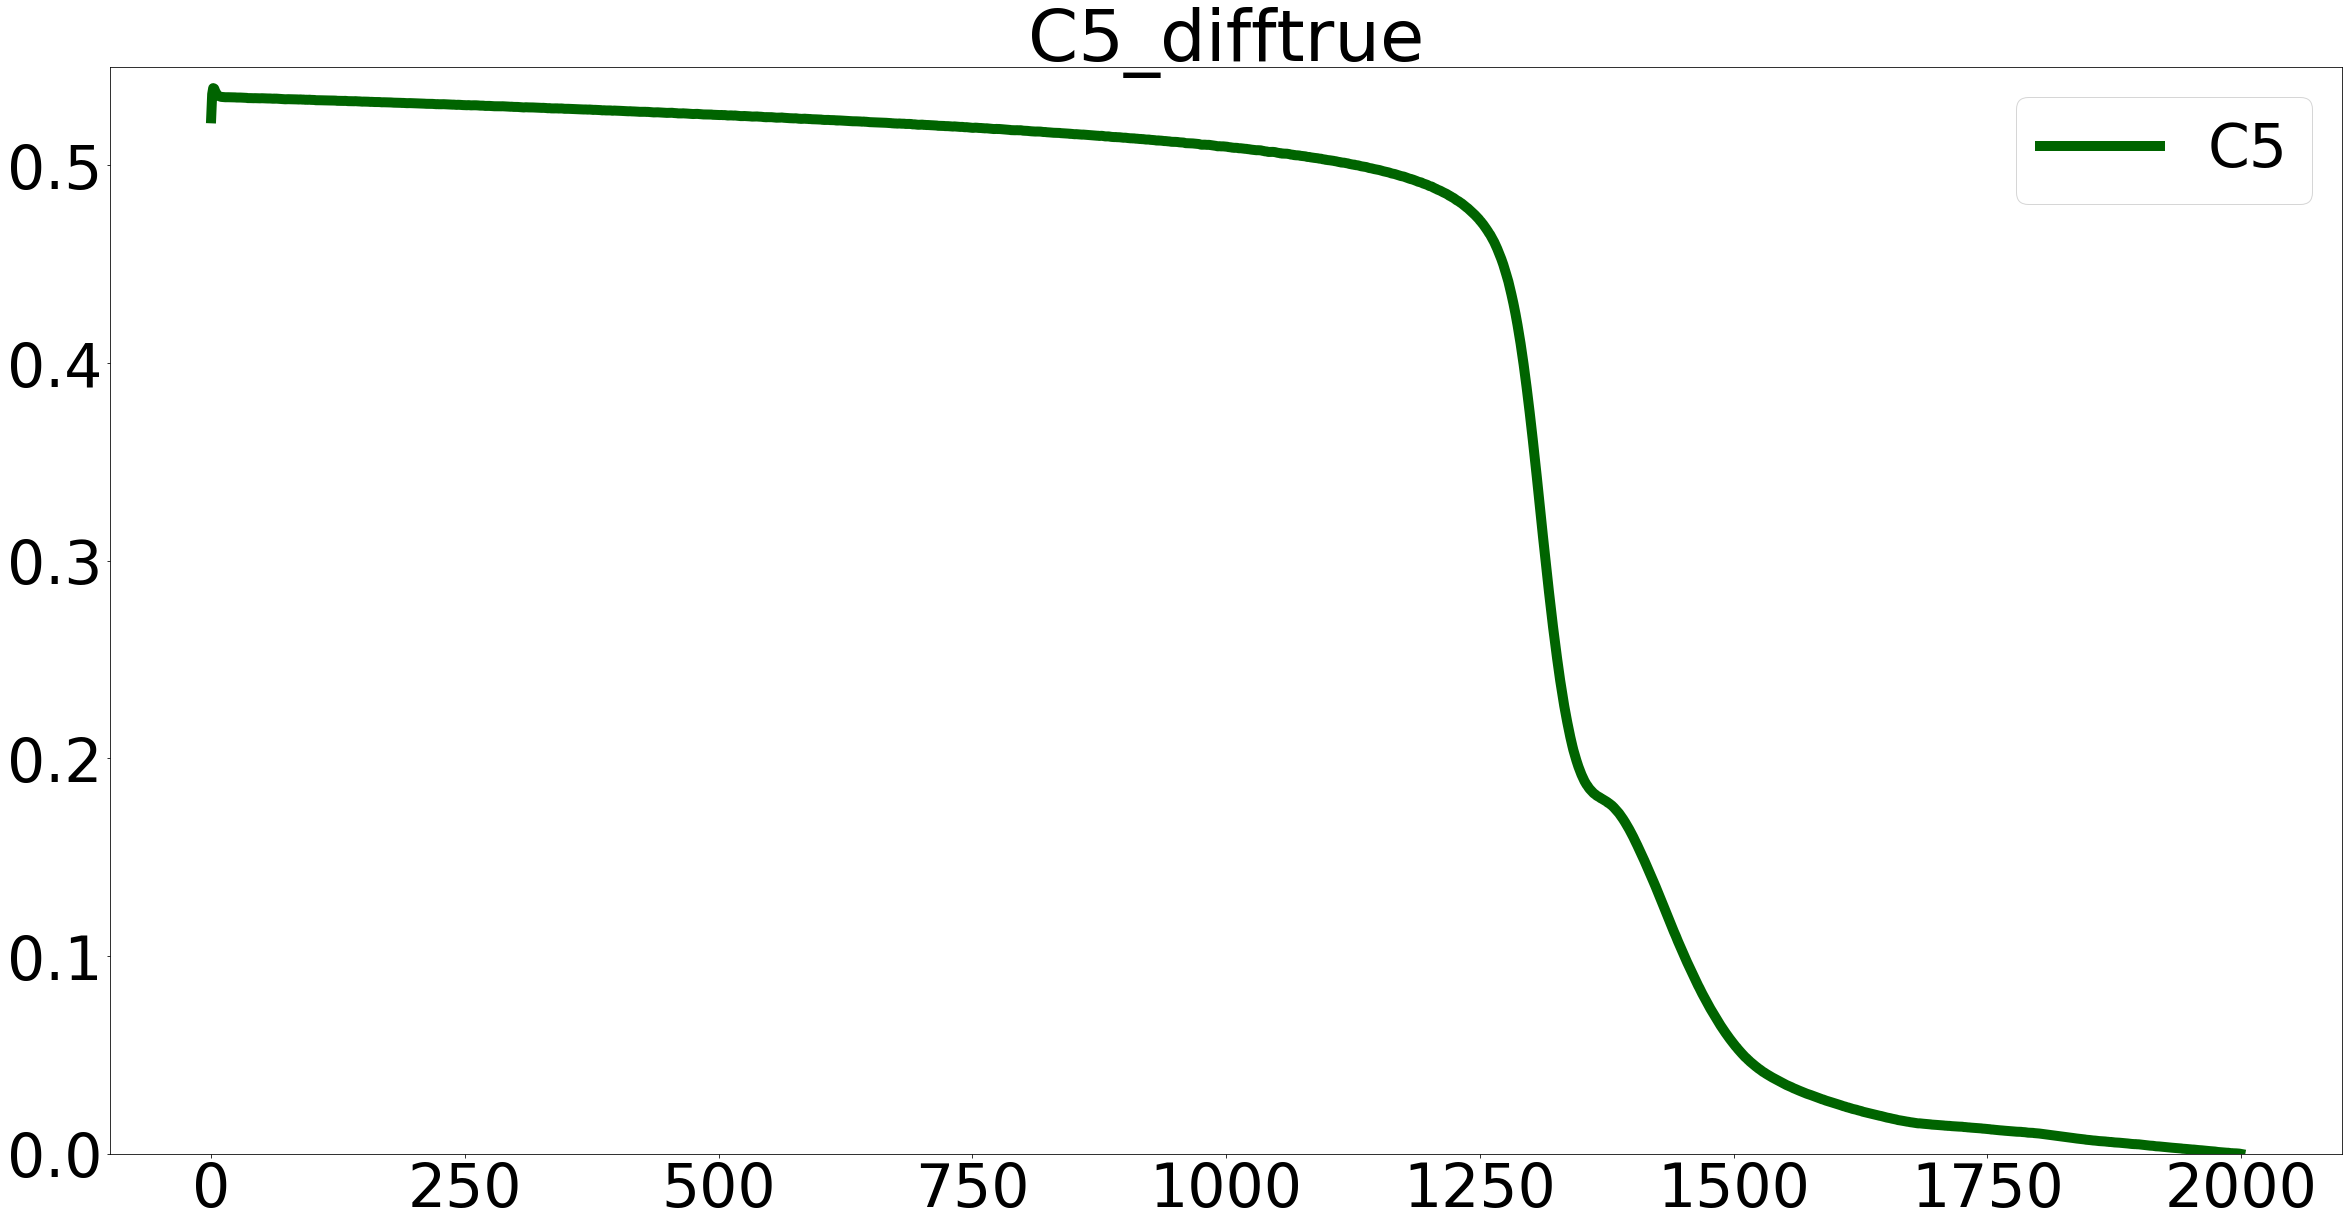

In [21]:
#statics = ["IM_MAR","CF_MAR","BND_MMAR","CF_CA","BND_MCOR","CF_COUS","CF_CPAR","CF_RCOU","CF_RPAR","H0_PRO"]
plt.figure(figsize=(40,20))
plt.rcParams["font.size"] = 60

plt.plot(df_distance_dict["BND_MMAR"],label="C5",color="darkgreen", linewidth=10)#C5s
plt.ylim(0, y)
plt.ylim(0, .55)
plt.title("C5_difftrue")
plt.legend()

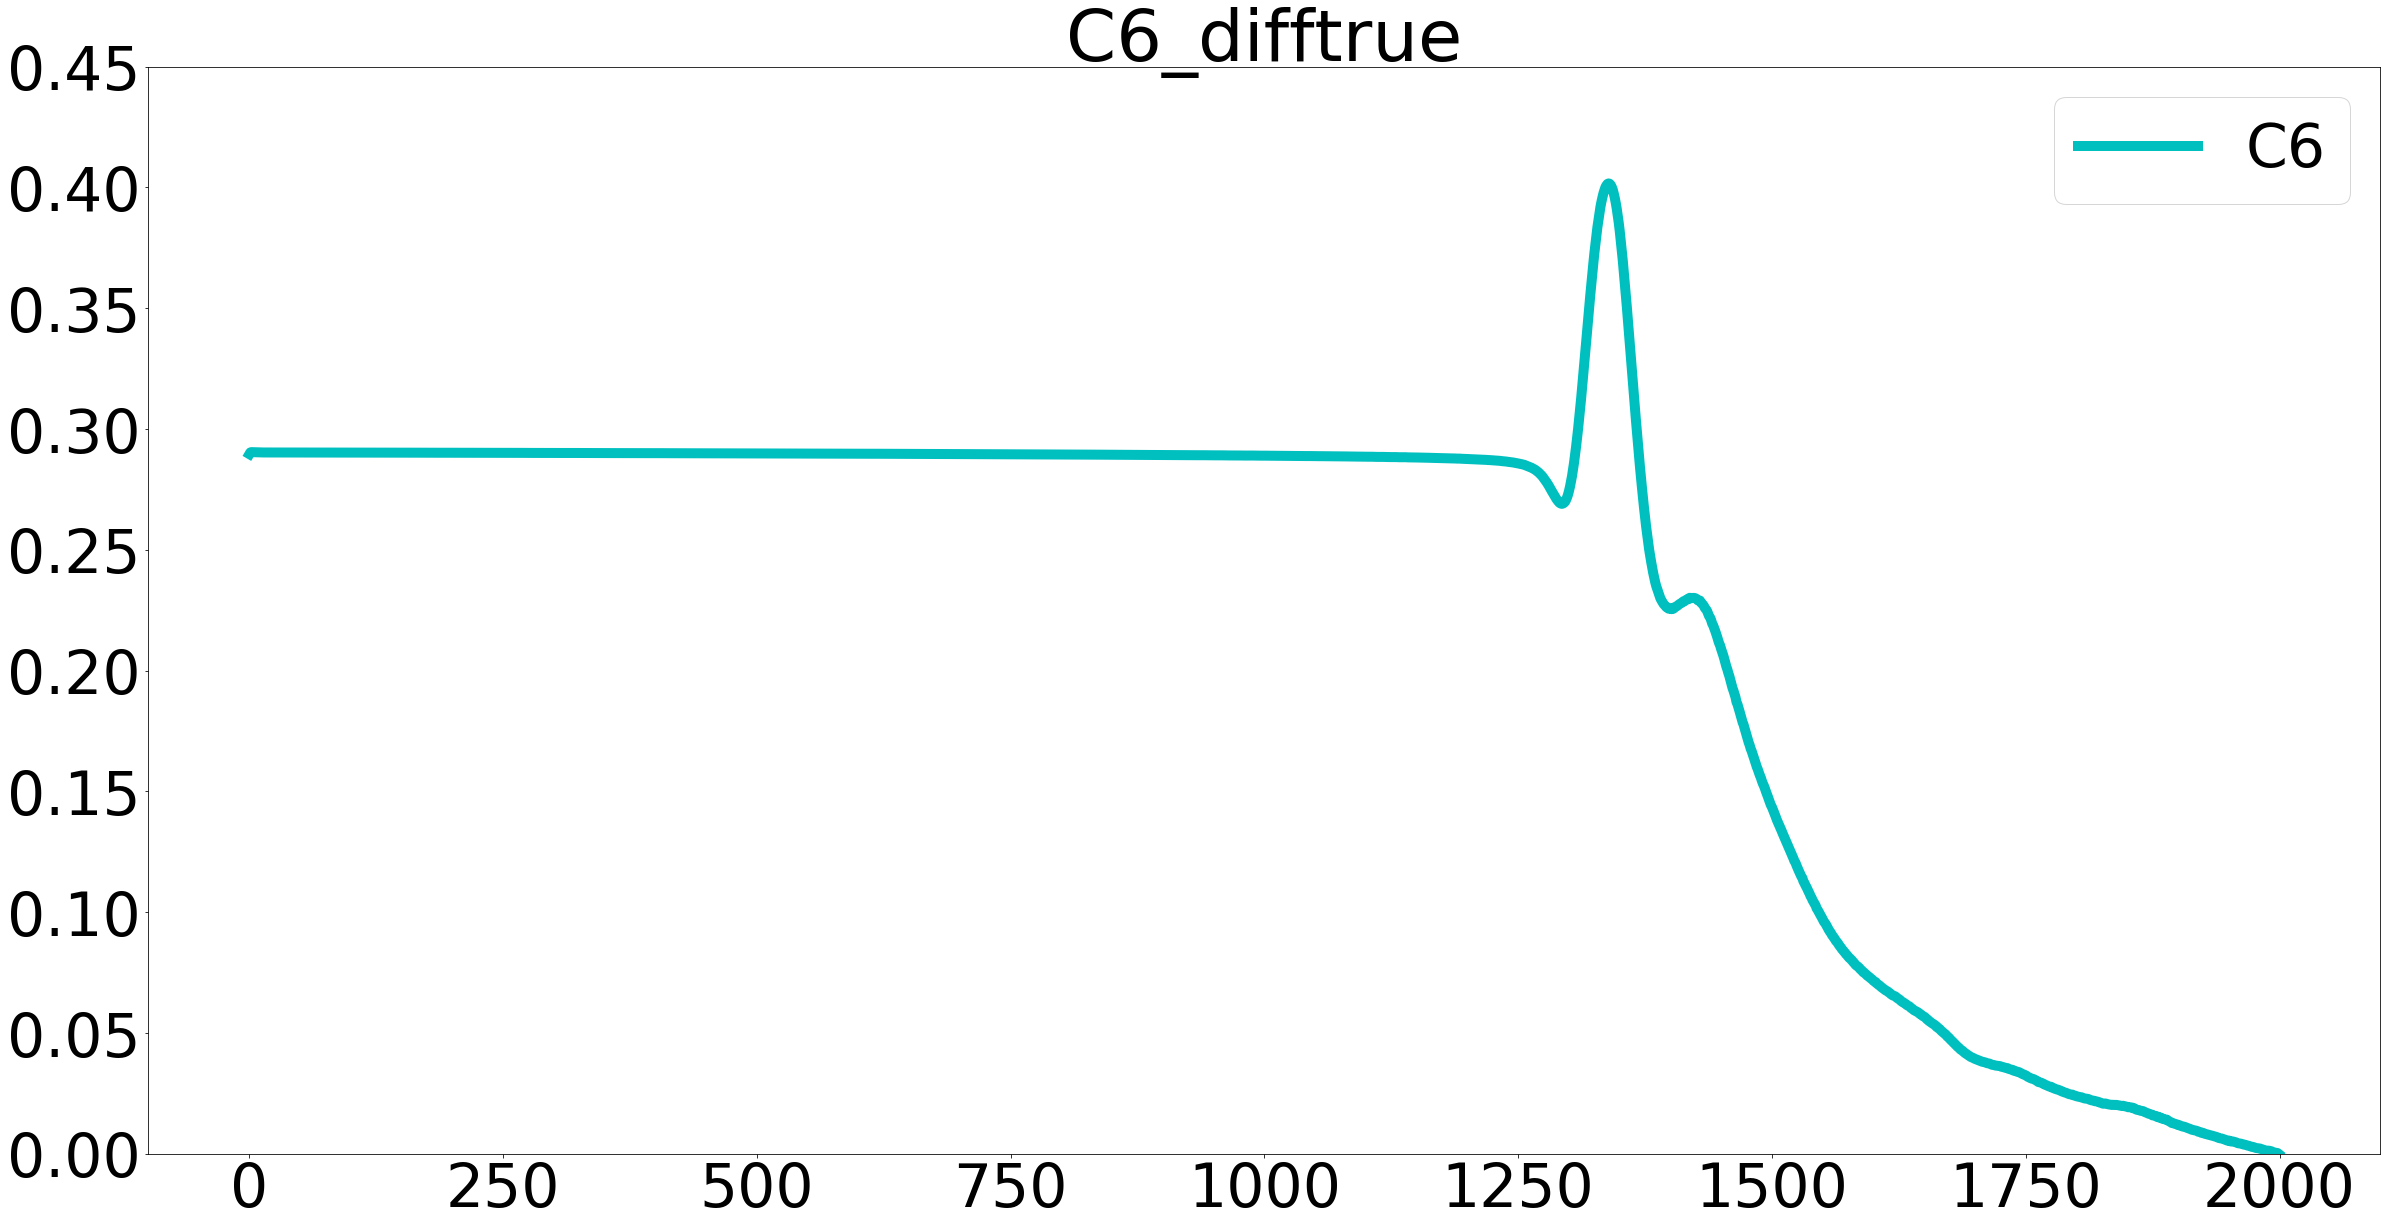

In [22]:
#statics = ["IM_MAR","CF_MAR","BND_MMAR","CF_CA","BND_MCOR","CF_COUS","CF_CPAR","CF_RCOU","CF_RPAR","H0_PRO"]
plt.figure(figsize=(40,20))
plt.rcParams["font.size"] = 60

plt.plot(df_distance_dict["CF_COUS"],label="C6",color="c", linewidth=10)#C6s
plt.ylim(0, y)
plt.ylim(0, .45)
plt.title("C6_difftrue")
plt.legend()

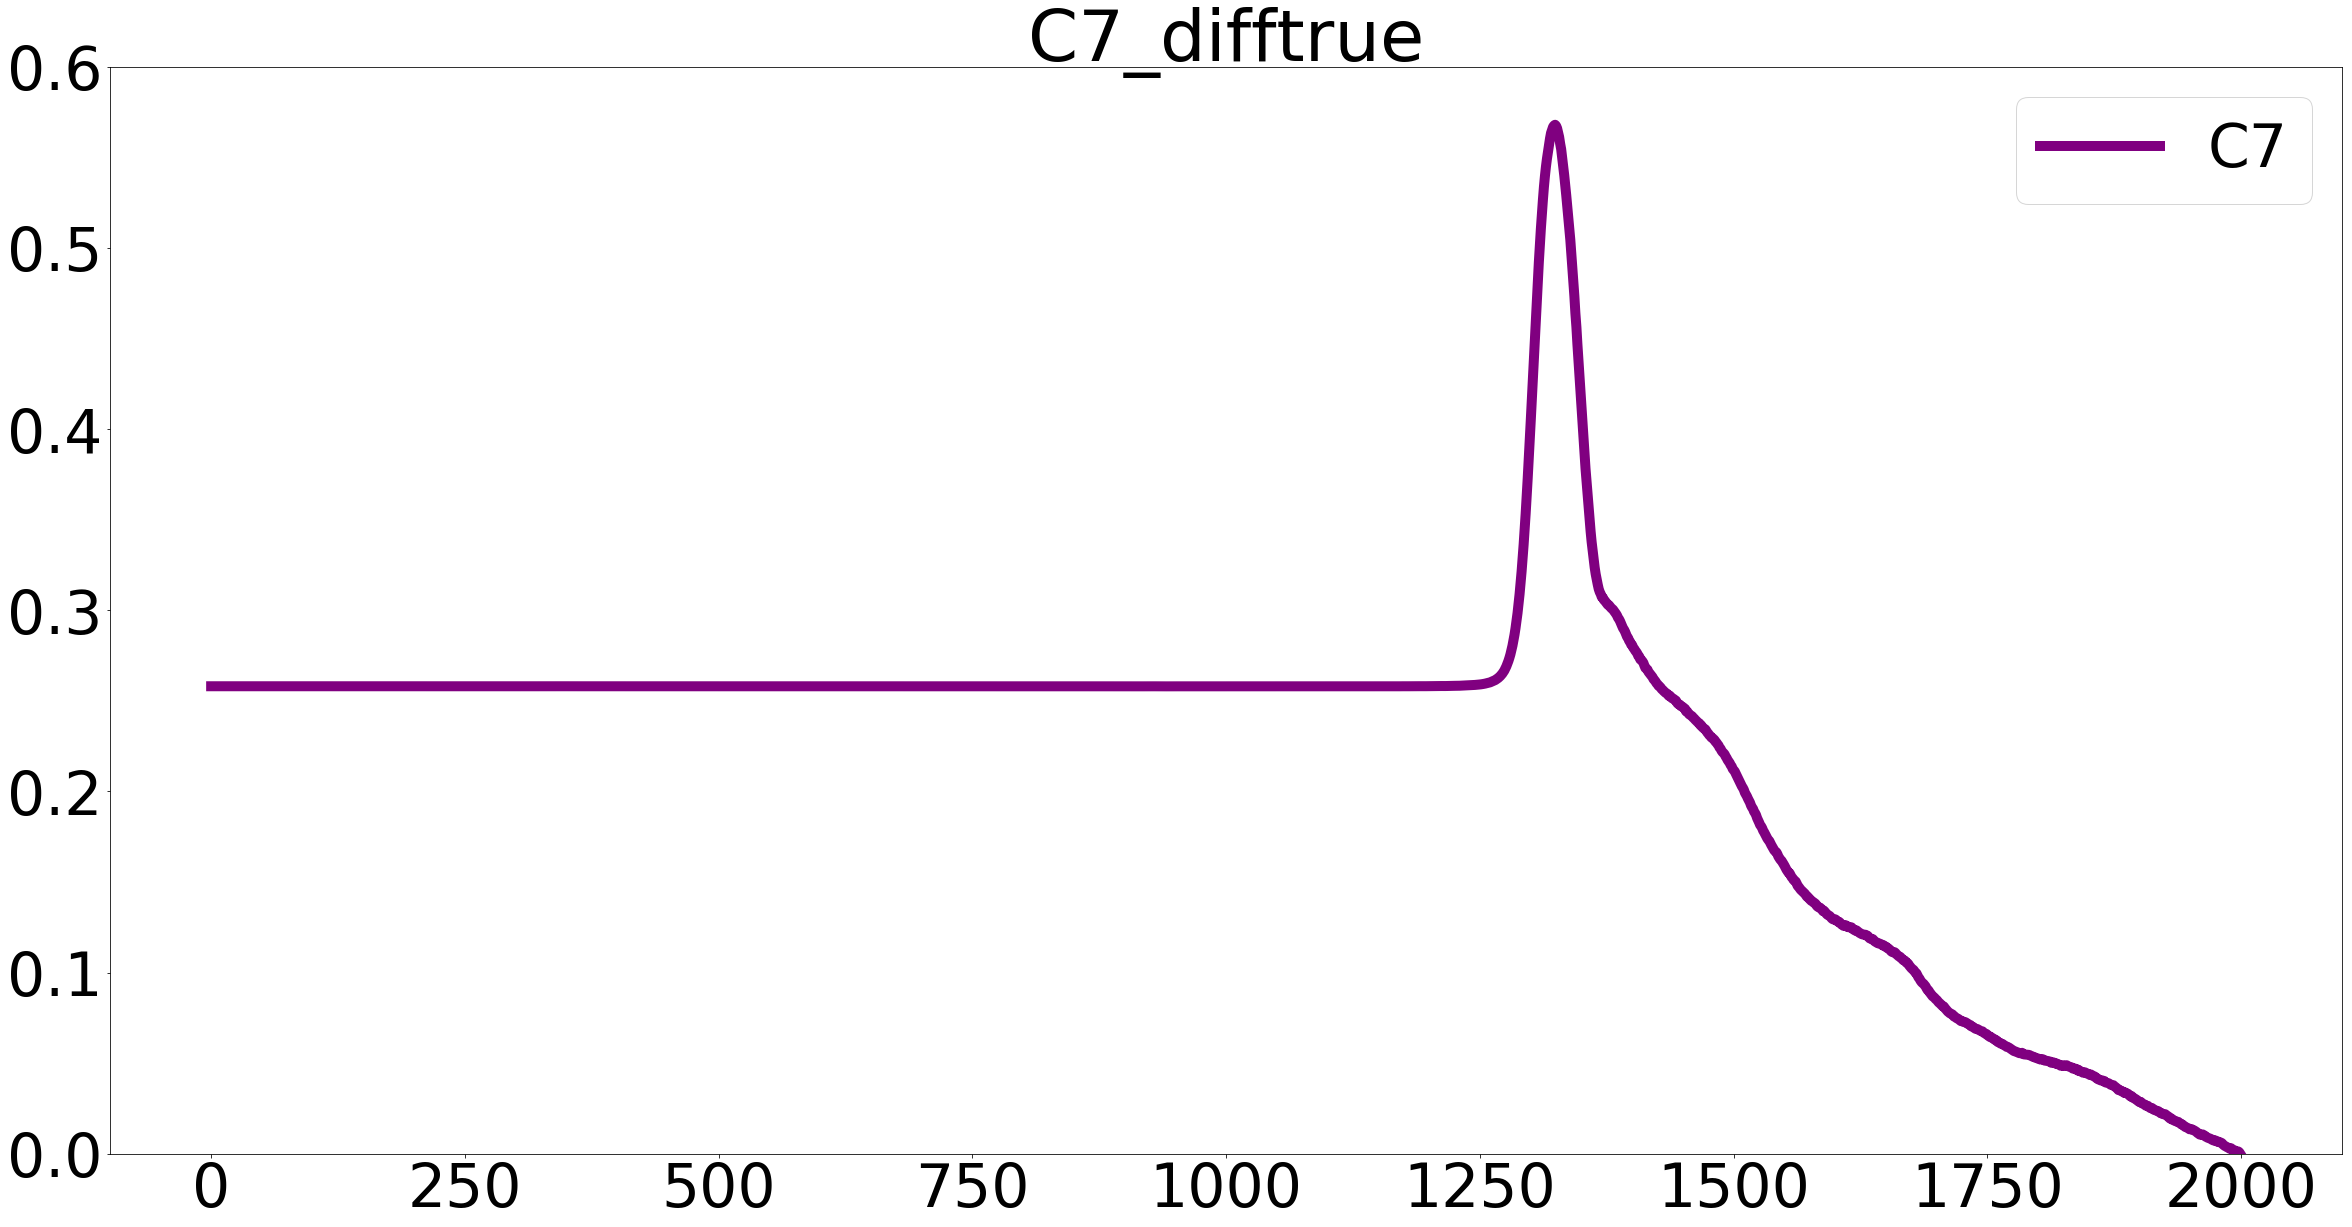

In [23]:
#statics = ["IM_MAR","CF_MAR","BND_MMAR","CF_CA","BND_MCOR","CF_COUS","CF_CPAR","CF_RCOU","CF_RPAR","H0_PRO"]
plt.figure(figsize=(40,20))
plt.rcParams["font.size"] = 60
plt.plot(df_distance_dict["CF_CPAR"],label="C7",color="purple", linewidth=10)#C7s
plt.ylim(0, y)
plt.ylim(0,.6)
plt.title("C7_difftrue")
plt.legend()

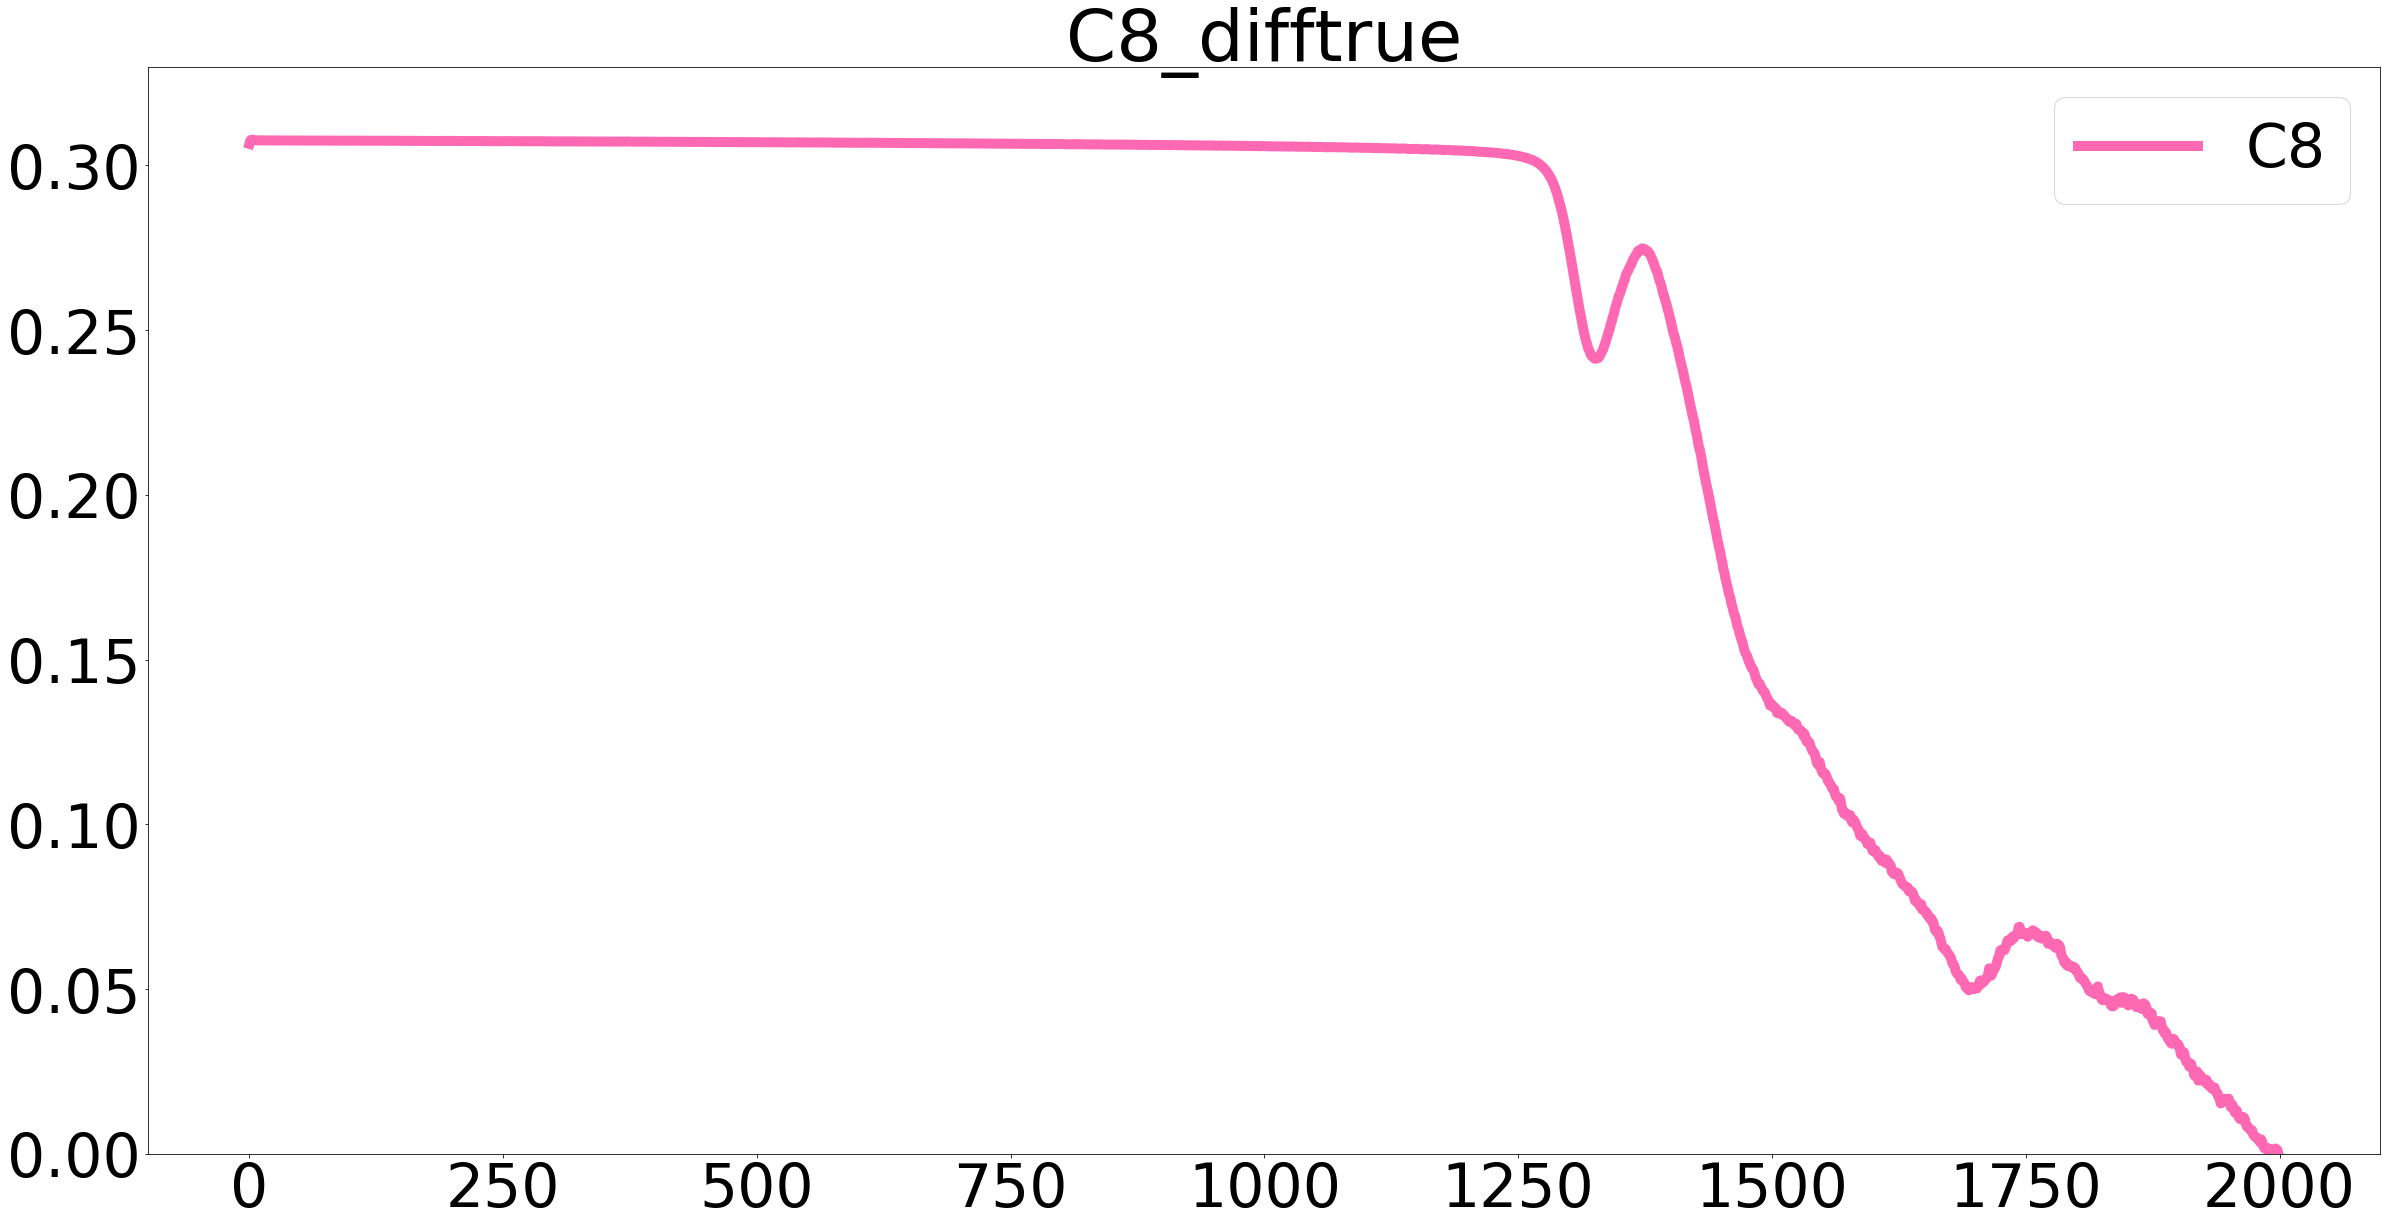

In [24]:
#statics = ["IM_MAR","CF_MAR","BND_MMAR","CF_CA","BND_MCOR","CF_COUS","CF_CPAR","CF_RCOU","CF_RPAR","H0_PRO"]
plt.figure(figsize=(40,20))
plt.rcParams["font.size"] = 60
plt.plot(df_distance_dict["CF_RCOU"],label="C8",color="hotpink", linewidth=10)#C8s
plt.ylim(0, y)
plt.ylim(0, .33)
plt.title("C8_difftrue")
plt.legend()

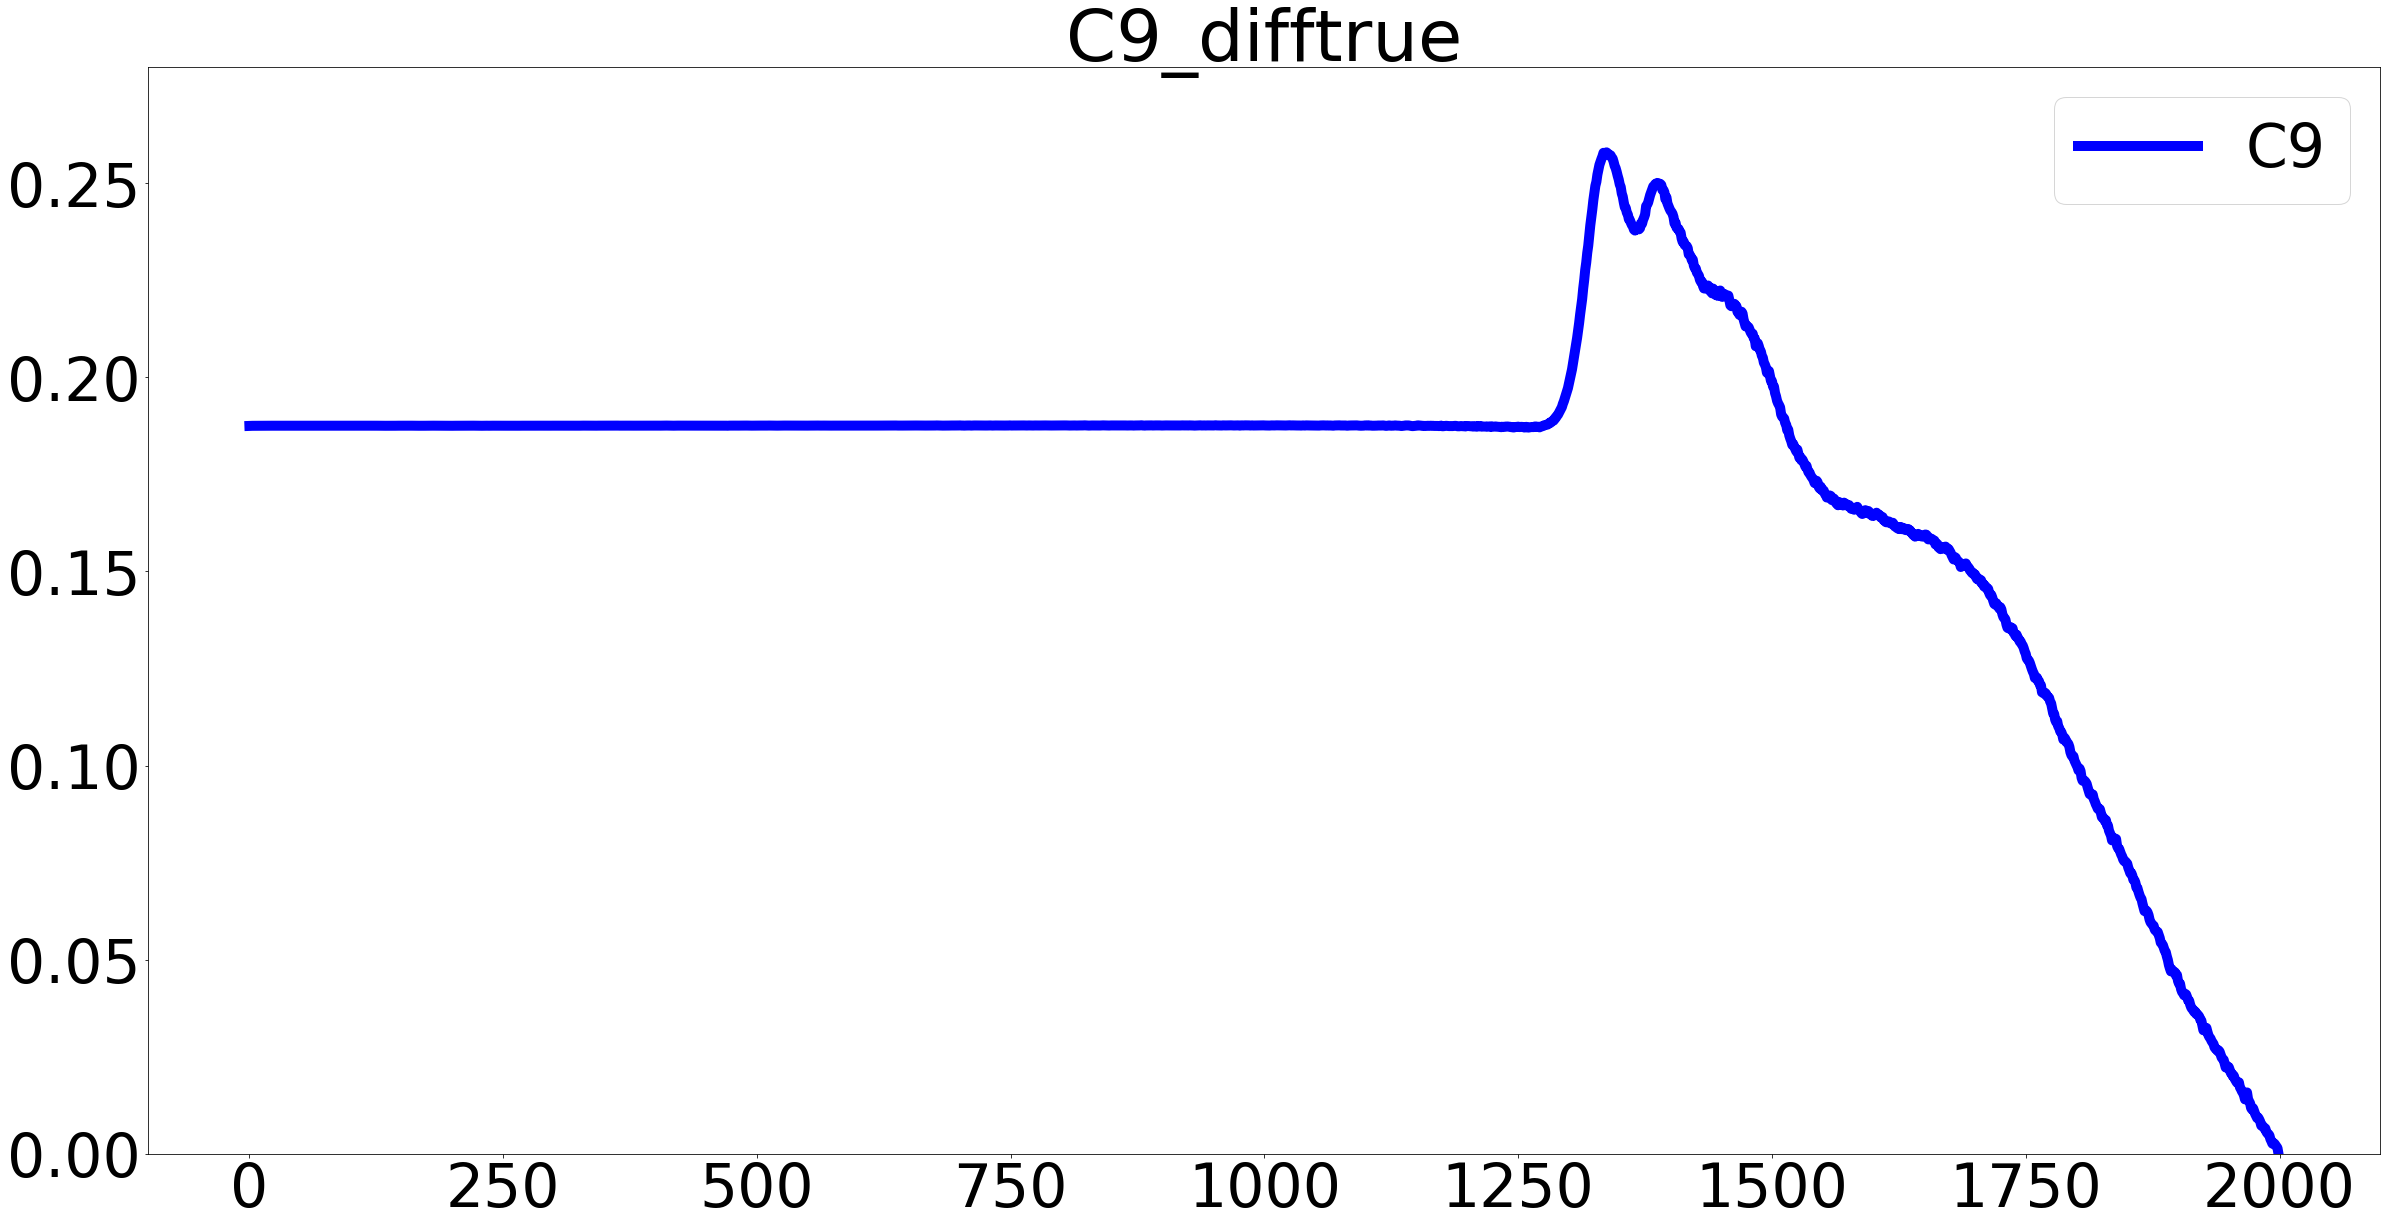

In [25]:
#statics = ["IM_MAR","CF_MAR","BND_MMAR","CF_CA","BND_MCOR","CF_COUS","CF_CPAR","CF_RCOU","CF_RPAR","H0_PRO"]
plt.figure(figsize=(40,20))
plt.rcParams["font.size"] = 60
plt.plot(df_distance_dict["CF_RPAR"],label="C9",color="blue", linewidth=10)#C9s
plt.ylim(0, y)
plt.ylim(0, .28)
plt.title("C9_difftrue")
plt.legend()

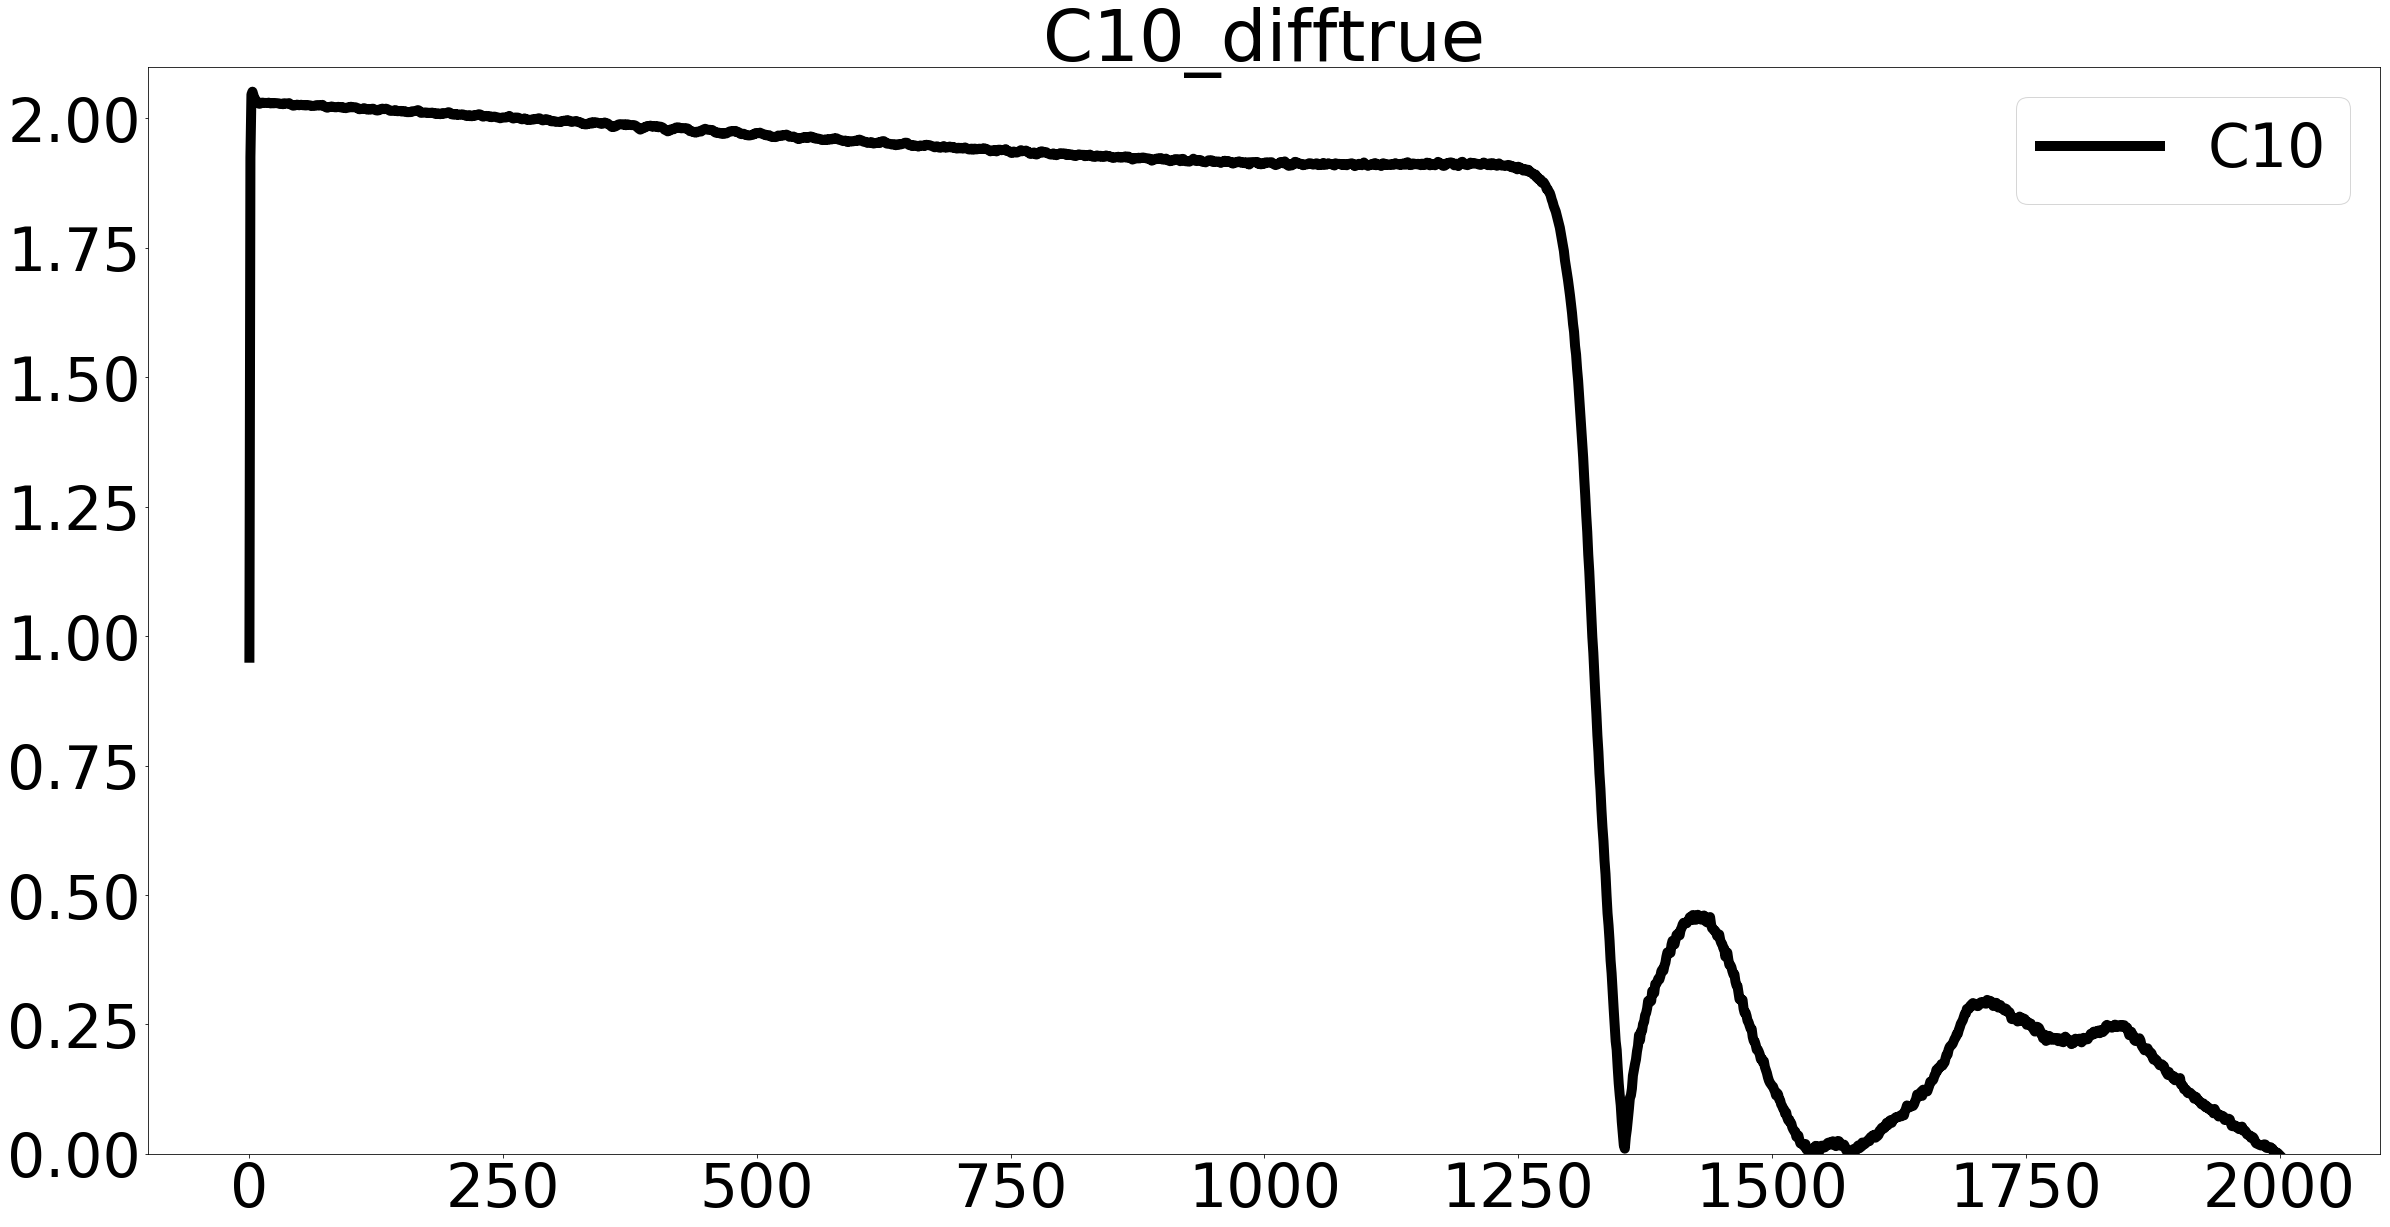

In [26]:
#statics = ["IM_MAR","CF_MAR","BND_MMAR","CF_CA","BND_MCOR","CF_COUS","CF_CPAR","CF_RCOU","CF_RPAR","H0_PRO"]
plt.figure(figsize=(40,20))
plt.rcParams["font.size"] = 60
plt.plot(df_distance_dict["H0_PRO"],label="C10",color="black", linewidth=10)#C10s
plt.ylim(0, y)
plt.title("C10_difftrue")
plt.legend()

In [27]:
maxIndex1  = [i for i, x in enumerate(df_distance_dict["IM_MAR"]) if x >= max(df_distance_dict["IM_MAR"]) - 0.001]
maxIndex2  = [i for i, x in enumerate(df_distance_dict["CF_MAR"]) if x >= max(df_distance_dict["CF_MAR"]) - 0.001]
maxIndex3  = [i for i, x in enumerate(df_distance_dict["BND_MCOR"]) if x >= max(df_distance_dict["BND_MCOR"]) - 0.001]
maxIndex4  = [i for i, x in enumerate(df_distance_dict["CF_CA"]) if x >= max(df_distance_dict["CF_CA"]) - 0.001]
maxIndex5  = [i for i, x in enumerate(df_distance_dict["BND_MMAR"]) if x >= max(df_distance_dict["BND_MMAR"]) - 0.001]
maxIndex6  = [i for i, x in enumerate(df_distance_dict["CF_COUS"]) if x >= max(df_distance_dict["CF_COUS"]) - 0.001]
maxIndex7  = [i for i, x in enumerate(df_distance_dict["CF_CPAR"]) if x >= max(df_distance_dict["CF_CPAR"]) - 0.001]
maxIndex8  = [i for i, x in enumerate(df_distance_dict["CF_RCOU"]) if x >= max(df_distance_dict["CF_RCOU"]) - 0.001]
maxIndex9  = [i for i, x in enumerate(df_distance_dict["CF_RPAR"]) if x >= max(df_distance_dict["CF_RPAR"]) - 0.001]
maxIndex10 = [i for i, x in enumerate(df_distance_dict["H0_PRO"]) if x >= max(df_distance_dict["H0_PRO"]) - 0.001]
maxIndexAll= [i for i, x in enumerate(distance) if x >= max(distance) - 0.001]
print(maxIndex1) 
print(maxIndex2)
print(maxIndex3)
print(maxIndex4)
print(maxIndex5)
print(maxIndex6)
print(maxIndex7)
print(maxIndex8)
print(maxIndex9)
print(maxIndex10)
print(maxIndexAll)

[1289, 1290]
[1292]
[1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398]
[1354, 1355, 1356, 1357, 1358]
[2, 3]
[1337, 1338, 1339, 1340, 1341]
[1323, 1324, 1325]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182

In [28]:
#ここからdiffnext用
#1ステップ次の生成画像との統計量の差分をグラフにすることを考える

In [29]:
df_pss_st.to_csv("2020_0.01.csv")

In [32]:
test=pd.read_csv('2020_0.01.csv',header=[1,2,3,4],index_col=[])
test
a=(test.drop(columns=test.columns[[0, 0]]))
a

none                                        \
                   none                                         
                   mean                val               skew   
     Unnamed: 1_level_3 Unnamed: 2_level_3 Unnamed: 3_level_3   
0             -1.555085          -0.716576          -0.536846   
1             -1.407647          -0.717227          -0.242811   
2             -1.344883          -0.717311          -0.616050   
3             -1.315382          -0.717301          -0.504198   
4             -1.300871          -0.717272          -0.532320   
5             -1.293379          -0.717246          -0.520158   
6             -1.289315          -0.717226          -0.495017   
7             -1.286969          -0.717212          -0.474943   
8             -1.285382          -0.717202          -0.483157   
9             -1.284232          -0.717195          -0.490255   
10            -1.283309          -0.717190          -0.485280   
11            -1.282582          -0.717189          -0.495954   
12            -1.281809          -0.717187          -0.499053   
13            -1.281112          -0.717186          -0.491139   
14            -1.280444          -0.717184          -0.471792   
15            -1.279791          -0.717184          -0.461817   
16            -1.279095          -0.717185          -0.463618   
17            -1.278454          -0.717184          -0.449719   
18            -1.277762          -0.717184          -0.443945   
19            -1.277122          -0.717184          -0.427231   
20            -1.276440          -0.717183          -0.421745   
21            -1.275795          -0.717182          -0.432225   
22            -1.275134          -0.717182          -0.425676   
23            -1.274413          -0.717181          -0.425496   
24            -1.273757          -0.717180          -0.424503   
25            -1.273134          -0.717180          -0.425068   
26            -1.272474          -0.717181          -0.407115   
27            -1.271762          -0.717180          -0.401728   
28            -1.271002          -0.717180          -0.382698   
29            -1.270319          -0.717179          -0.364517   
30            -1.269663          -0.717178          -0.352861   
31            -1.268992          -0.717178          -0.364671   
32            -1.268351          -0.717177          -0.364954   
33            -1.267657          -0.717175          -0.374702   
34            -1.266967          -0.717176          -0.399877   
35            -1.266275          -0.717175          -0.408363   
36            -1.265616          -0.717172          -0.414323   
37            -1.264880          -0.717172          -0.413868   
38            -1.264186          -0.717172          -0.400497   
39            -1.263493          -0.717171          -0.403656   
40            -1.262824          -0.717170          -0.438831   
41            -1.262043          -0.717168          -0.443809   
42            -1.261374          -0.717168          -0.454264   
43            -1.260722          -0.717168          -0.462607   
44            -1.260025          -0.717168          -0.479215   
45            -1.259313          -0.717167          -0.478803   
46            -1.258593          -0.717166          -0.484471   
47            -1.257990          -0.717167          -0.472743   
48            -1.257310          -0.717166          -0.461449   
49            -1.256613          -0.717167          -0.461557   
...                 ...                ...                ...   
1950           1.354114           1.483309          -0.116582   
1951           1.354172           1.483392          -0.116787   
1952           1.354150           1.483290          -0.116783   
1953           1.354207           1.483446          -0.116970   
1954           1.354163           1.483367          -0.116880   
1955           1.354179           1.483319          -0.116827   
1956           1.354168           1.483324          -0

In [33]:
num=2000
b = pd.DataFrame(np.zeros([num, 782]))
tmp_a = pd.DataFrame(data=a.iloc[1:,0:])

tmp_a=tmp_a.reset_index(drop=True)
b=(a-tmp_a)**2
b

none                                        \
                   none                                         
                   mean                val               skew   
     Unnamed: 1_level_3 Unnamed: 2_level_3 Unnamed: 3_level_3   
0          2.173796e-02       4.244470e-07       8.645649e-02   
1          3.939342e-03       7.031820e-09       1.393073e-01   
2          8.702973e-04       1.002671e-10       1.251088e-02   
3          2.105699e-04       8.606407e-10       7.908318e-04   
4          5.613210e-05       6.413799e-10       1.479170e-04   
5          1.651494e-05       3.904705e-10       6.320553e-04   
6          5.501800e-06       2.099848e-10       4.029692e-04   
7          2.520389e-06       1.001463e-10       6.747526e-05   
8          1.322722e-06       4.749388e-11       5.037250e-05   
9          8.521206e-07       2.760868e-11       2.474557e-05   
10         5.276232e-07       1.127145e-12       1.139332e-04   
11         5.977625e-07       4.462480e-12       9.604835e-06   
12         4.864878e-07       7.052756e-13       6.263866e-05   
13         4.451840e-07       1.753662e-12       3.742874e-04   
14         4.270151e-07       9.907999e-14       9.950649e-05   
15         4.845706e-07       1.900840e-13       3.242144e-06   
16         4.109868e-07       5.260170e-13       1.931725e-04   
17         4.788417e-07       1.770378e-14       3.333506e-05   
18         4.092248e-07       5.790881e-14       2.793831e-04   
19         4.656069e-07       3.699887e-13       3.009229e-05   
20         4.162955e-07       1.696429e-12       1.098299e-04   
21         4.360522e-07       4.085455e-13       4.288451e-05   
22         5.196592e-07       2.449650e-12       3.266506e-08   
23         4.306186e-07       7.845286e-13       9.846239e-07   
24         3.883760e-07       1.068262e-13       3.191569e-07   
25         4.360522e-07       7.345231e-13       3.223102e-04   
26         5.058679e-07       6.810163e-13       2.901933e-05   
27         5.787704e-07       3.925226e-13       3.621539e-04   
28         4.656069e-07       1.189046e-12       3.305404e-04   
29         4.306186e-07       6.543901e-13       1.358592e-04   
30         4.507084e-07       5.124468e-13       1.394651e-04   
31         4.109868e-07       1.326184e-12       8.030559e-08   
32         4.807476e-07       1.722600e-12       9.501444e-05   
33         4.769397e-07       1.448177e-13       6.338020e-04   
34         4.788417e-07       8.571510e-13       7.200459e-05   
35         4.342372e-07       7.428540e-12       3.552083e-05   
36         5.417059e-07       1.046347e-13       2.070433e-07   
37         4.807476e-07       5.225295e-13       1.787712e-04   
38         4.807476e-07       3.424030e-14       9.980786e-06   
39         4.470217e-07       2.292080e-12       1.237240e-03   
40         6.105942e-07       3.739506e-12       2.478148e-05   
41         4.470217e-07       3.292886e-14       1.093189e-04   
42         4.252191e-07       3.109922e-14       6.960272e-05   
43         4.864878e-07       2.897646e-14       2.758051e-04   
44         5.058679e-07       9.739041e-13       1.690828e-07   
45         5.196592e-07       3.514268e-13       3.211803e-05   
46         3.630816e-07       7.995342e-13       1.375431e-04   
47         4.618596e-07       1.610529e-12       1.275566e-04   
48         4.864878e-07       4.984916e-13       1.164638e-08   
49         4.127526e-07       1.003279e-12       8.293946e-06   
...                 ...                ...                ...   
1950       3.338525e-09       6.900070e-09       4.213107e-08   
1951       4.845025e-10       1.035906e-08       1.932581e-11   
1952       3.181440e-09       2.434820e-08       3.523836e-08   
1953       1.938010e-09       6.279943e-09       8.086357e-09   
1954       2.725326e-10       2.306272e-09       2.875746e-09   
1955       1.211256e-10       2.206722e-11       2.429256e-09   
1956       1.892588e-12       2.549671e-09       6.121

In [34]:
c = pd.DataFrame(np.zeros([num, 10]), columns=["IM_MAR","CF_MAR","BND_MMAR","CF_CA","BND_MCOR","CF_COUS","CF_CPAR","CF_RCOU","CF_RPAR","H0_PRO"])
c

IM_MAR  CF_MAR  BND_MMAR  CF_CA  BND_MCOR  CF_COUS  CF_CPAR  CF_RCOU  \
0        0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
1        0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
2        0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
3        0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
4        0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
5        0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
6        0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
7        0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
8        0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
9        0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
10       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
11       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
12       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
13       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
14       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
15       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
16       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
17       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
18       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
19       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
20       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
21       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
22       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
23       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
24       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
25       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
26       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
27       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
28       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
29       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
30       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
31       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
32       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
33       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
34       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
35       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
36       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
37       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
38       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
39       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
40       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
41       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
42       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
43       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
44       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
45       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
46       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
47       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
48       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
49       0.0     0.0       0.0    0.0       0.0      0.0      0.0      0.0   
...      ...     ...       .

In [35]:
from tqdm import tqdm

In [36]:
for j in tqdm(range(num-1)):#IM_MAR,C1
    content=0
    for i in range(6):
        content=content + b.iloc[j,i]
    c.iloc[j:j+1,0:1]=np.sqrt(content)/6

    
    
for j in tqdm(range(num-1)):#CF_MAR,C2
    content=0
    for i in range(10):
        content=content + b.iloc[j,6+i]
    c.iloc[j:j+1,1:2]=np.sqrt(content)/10
    
    
for j in tqdm(range(num-1)):#CF_CA,C3
    content=0
    for i in range(125):
        content=content + b.iloc[j,16+i]
    c.iloc[j:j+1,3:4]=np.sqrt(content)/125
    
    
for j in tqdm(range(num-1)):#BND_MCOR,C4
    content=0
    for i in range(400):
        content=content + b.iloc[j,141+i]
    c.iloc[j:j+1,4:5]=np.sqrt(content)/400
    
for j in tqdm(range(num-1)):#BND_MMAR,C5
    content=0
    for i in range(16):
        content=content + b.iloc[j,541+i]
    c.iloc[j:j+1,2:3]=np.sqrt(content)/16    
    
  
for j in tqdm(range(num-1)):#CF_COUS,C6
    content=0
    for i in range(40):
        content=content + b.iloc[j,557+i]
    c.iloc[j:j+1,5:6]=np.sqrt(content)/40
    
   
for j in tqdm(range(num-1)):#CF_CPAR,C7
    content=0
    for i in range(48):
        content=content + b.iloc[j,597+i]
    c.iloc[j:j+1,6:7]=np.sqrt(content)/48
    
  
for j in tqdm(range(num-1)):#CF_RCOU,C8
    content=0
    for i in range(40):
        content=content + b.iloc[j,645+i]
    c.iloc[j:j+1,7:8]=np.sqrt(content)/40
    
     
for j in tqdm(range(num-1)):#CF_RPAR,C9
    content=0
    for i in range(96):
        content=content + b.iloc[j,685+i]
    c.iloc[j:j+1,8:9]=np.sqrt(content)/96
    
    
for j in tqdm(range(num-1)):#H0-PRO,C10
    content=0
    for i in range(1):
        content=content + b.iloc[j,781+i]
    c.iloc[j:j+1,9:10]=np.sqrt(content)/1
    
c

100%|████████████████████████████████████████████████████████████████████████████| 1999/1999 [00:00<00:00, 5645.96it/s]


IM_MAR    CF_MAR  BND_MMAR     CF_CA  BND_MCOR   CF_COUS   CF_CPAR  \
0     0.119508  0.312391  0.021098  0.000033  0.000202  0.001366  0.000061   
1     0.085383  0.231734  0.005851  0.000007  0.000031  0.000191  0.000028   
2     0.081470  0.070016  0.000619  0.000012  0.000013  0.000084  0.000073   
3     0.045155  0.418181  0.001746  0.000017  0.000016  0.000055  0.000055   
4     0.008843  0.427477  0.001380  0.000011  0.000013  0.000072  0.000033   
5     0.004919  0.130553  0.001158  0.000012  0.000016  0.000062  0.000022   
6     0.004388  0.099821  0.000645  0.000010  0.000008  0.000032  0.000028   
7     0.001425  0.036722  0.000425  0.000011  0.000006  0.000030  0.000014   
8     0.001557  0.088178  0.000281  0.000009  0.000006  0.000023  0.000015   
9     0.000928  0.039915  0.000193  0.000007  0.000004  0.000022  0.000010   
10    0.001797  0.115210  0.000091  0.000008  0.000006  0.000018  0.000018   
11    0.001077  0.041131  0.000142  0.000005  0.000005  0.000021  0.000013   
12    0.001402  0.081921  0.000084  0.000007  0.000004  0.000006  0.000017   
13    0.003236  0.073925  0.000066  0.000008  0.000005  0.000015  0.000014   
14    0.002606  0.079996  0.000096  0.000003  0.000005  0.000011  0.000008   
15    0.001048  0.032941  0.000081  0.000004  0.000003  0.000017  0.000011   
16    0.002487  0.024583  0.000059  0.000008  0.000004  0.000011  0.000017   
17    0.002491  0.034589  0.000111  0.000007  0.000004  0.000020  0.000011   
18    0.003865  0.097628  0.000055  0.000013  0.000008  0.000014  0.000009   
19    0.001657  0.025608  0.000059  0.000008  0.000008  0.000013  0.000020   
20    0.002304  0.102571  0.000107  0.000004  0.000005  0.000018  0.000013   
21    0.001524  0.047479  0.000105  0.000009  0.000004  0.000011  0.000016   
22    0.000212  0.040530  0.000117  0.000006  0.000007  0.000011  0.000015   
23    0.000699  0.035012  0.000059  0.000007  0.000004  0.000016  0.000011   
24    0.000742  0.019896  0.000127  0.000005  0.000004  0.000018  0.000010   
25    0.003181  0.065596  0.000083  0.000004  0.000004  0.000011  0.000015   
26    0.001655  0.084355  0.000089  0.000007  0.000006  0.000014  0.000019   
27    0.003204  0.022586  0.000055  0.000012  0.000003  0.000013  0.000016   
28    0.003098  0.040427  0.000124  0.000006  0.000004  0.000007  0.000020   
29    0.002616  0.032172  0.000100  0.000007  0.000004  0.000015  0.000018   
30    0.002093  0.035605  0.000059  0.000006  0.000004  0.000011  0.000008   
31    0.000414  0.065146  0.000113  0.000005  0.000003  0.000011  0.000018   
32    0.001741  0.048442  0.000091  0.000007  0.000006  0.000018  0.000020   
33    0.004201  0.031059  0.000064  0.000007  0.000006  0.000010  0.000009   
34    0.001890  0.089641  0.000082  0.000006  0.000005  0.000021  0.000017   
35    0.001084  0.045860  0.000188  0.000006  0.000007  0.000016  0.000011   
36    0.001038  0.014910  0.000041  0.000005  0.000004  0.000014  0.000016   
37    0.002366  0.054466  0.000146  0.000006  0.000005  0.000010  0.000009   
38    0.000590  0.020320  0.000095  0.000005  0.000003  0.000021  0.000011   
39    0.005968  0.086656  0.000124  0.000009  0.000004  0.000007  0.000011   
40    0.001670  0.042682  0.000107  0.000006  0.000005  0.000019  0.000011   
41    0.001938  0.036292  0.000069  0.000011  0.000003  0.000009  0.000016   
42    0.001873  0.073127  0.000142  0.000009  0.000005  0.000013  0.000014   
43    0.002856  0.100509  0.000051  0.000006  0.000005  0.000017  0.000014   
44    0.000492  0.036793  0.000109  0.000007  0.000004  0.000014  0.000014   
45    0.001188  0.069342  0.000100  0.000010  0.000007  0.000013  0.000017   
46    0.002487  0.031226  0.000136  0.000007  0.000007  0.000015  0.000014   
47    0.013396  0.048931  0.000068  0.000009  0.000004  0.000015  0.000013   
48    0.000165  0.028968  0.000113  0.000004  0.000006  0.000014  0.000008   
49    0.000746  0.028002  0.000097  0.000005  0.000005  0.000018  0.000011   
...        ...       ...      

In [37]:
d = pd.DataFrame(np.zeros([num, 1]), columns=["Call"])
d.iloc[:,0]=np.sqrt(b.sum(axis=1))/782
d

Call
0     0.004306
1     0.003041
2     0.001092
3     0.005359
4     0.005467
5     0.001670
6     0.001277
7     0.000470
8     0.001128
9     0.000511
10    0.001473
11    0.000526
12    0.001048
13    0.000946
14    0.001023
15    0.000421
16    0.000315
17    0.000443
18    0.001249
19    0.000328
20    0.001312
21    0.000607
22    0.000518
23    0.000448
24    0.000255
25    0.000839
26    0.001079
27    0.000290
28    0.000518
29    0.000412
30    0.000456
31    0.000833
32    0.000620
33    0.000399
34    0.001146
35    0.000587
36    0.000191
37    0.000697
38    0.000260
39    0.001109
40    0.000546
41    0.000464
42    0.000935
43    0.001285
44    0.000471
45    0.000887
46    0.000400
47    0.000634
48    0.000370
49    0.000358
...        ...
1950  0.000269
1951  0.000267
1952  0.000358
1953  0.000230
1954  0.000182
1955  0.000198
1956  0.000229
1957  0.000194
1958  0.000237
1959  0.000259
1960  0.000252
1961  0.000211
1962  0.000233
1963  0.000187
1964  0.000207
1965  0.000284
1966  0.000357
1967  0.000372
1968  0.000288
1969  0.000185
1970  0.000163
1971  0.000356
1972  0.000213
1973  0.000225
1974  0.000226
1975  0.000224
1976  0.000234
1977  0.000202
1978  0.000290
1979  0.000228
1980  0.000233
1981  0.000316
1982  0.000234
1983  0.000171
1984  0.000205
1985  0.000240
1986  0.000243
1987  0.000200
1988  0.000184
1989  0.000182
1990  0.000240
1991  0.000210
1992  0.000175
1993  0.000261
1994  0.000192
1995  0.000212
1996  0.000212
1997  0.000163
1998  0.000223
1999  0.000000

[2000 rows x 1 columns]

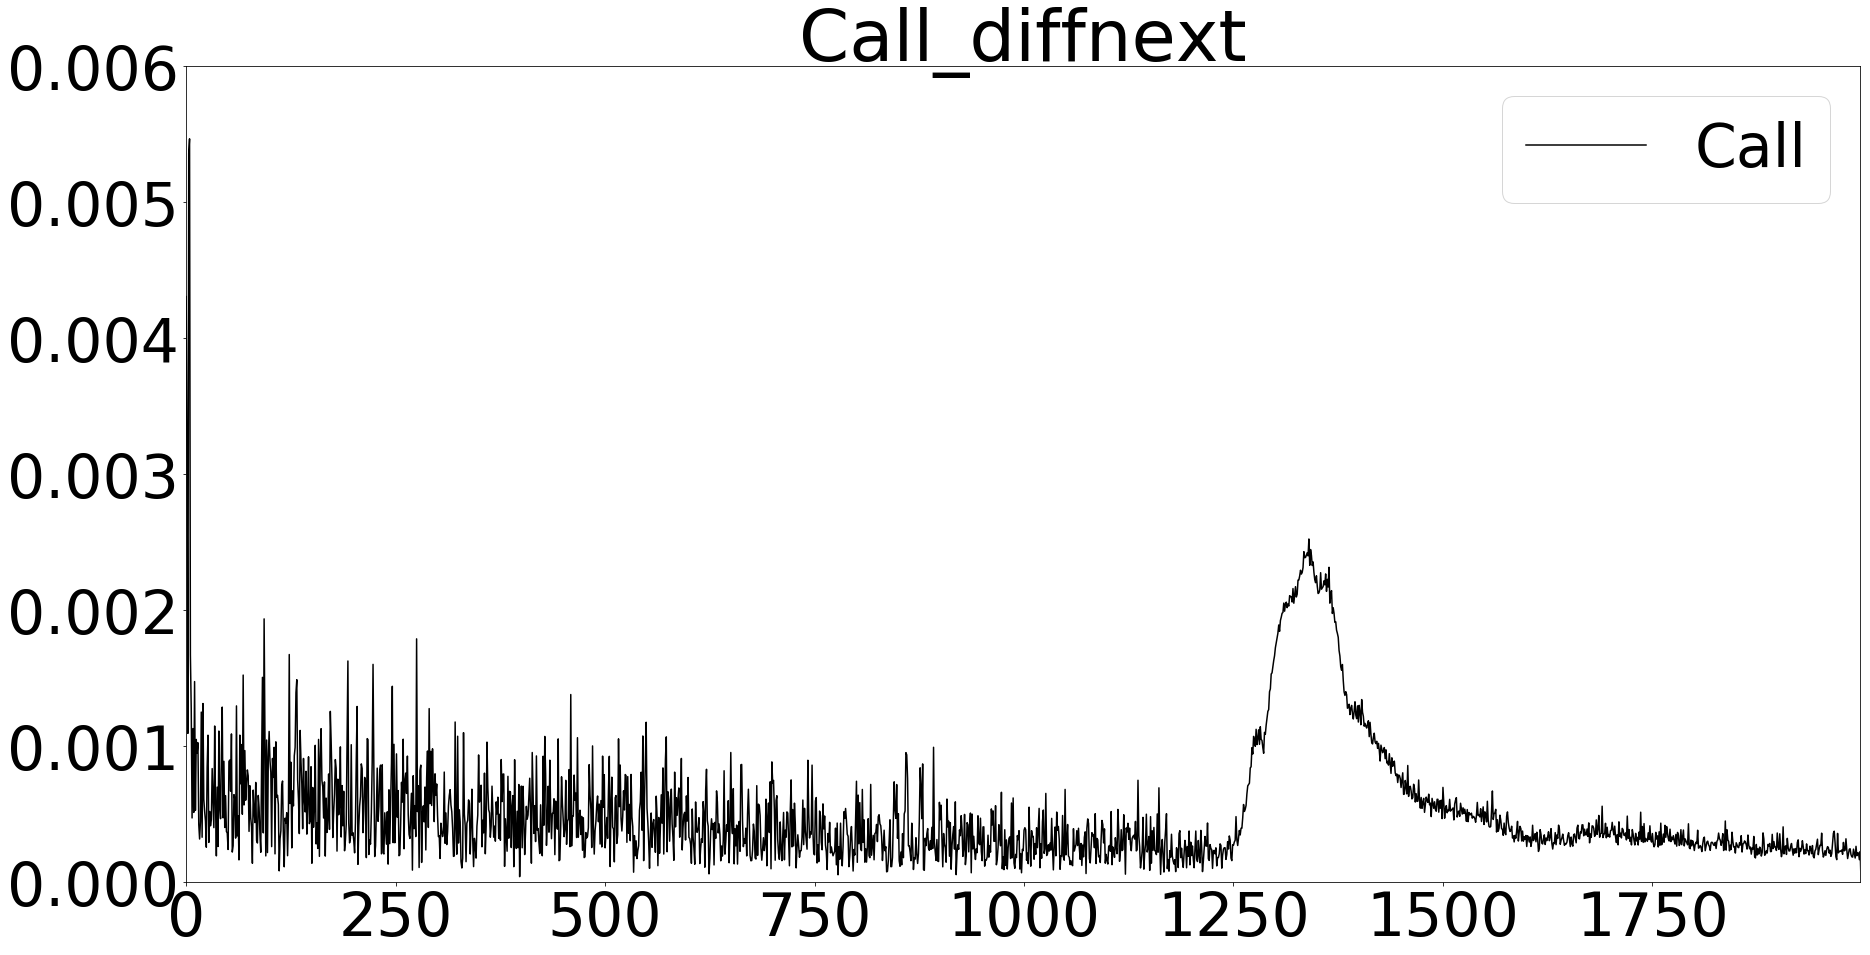

In [38]:
d.iloc[:,:].plot(figsize=(30,15),legend=True,ylim=[0,0.006],xlim=[0, 1998],color="black", title='Call_diffnext')#

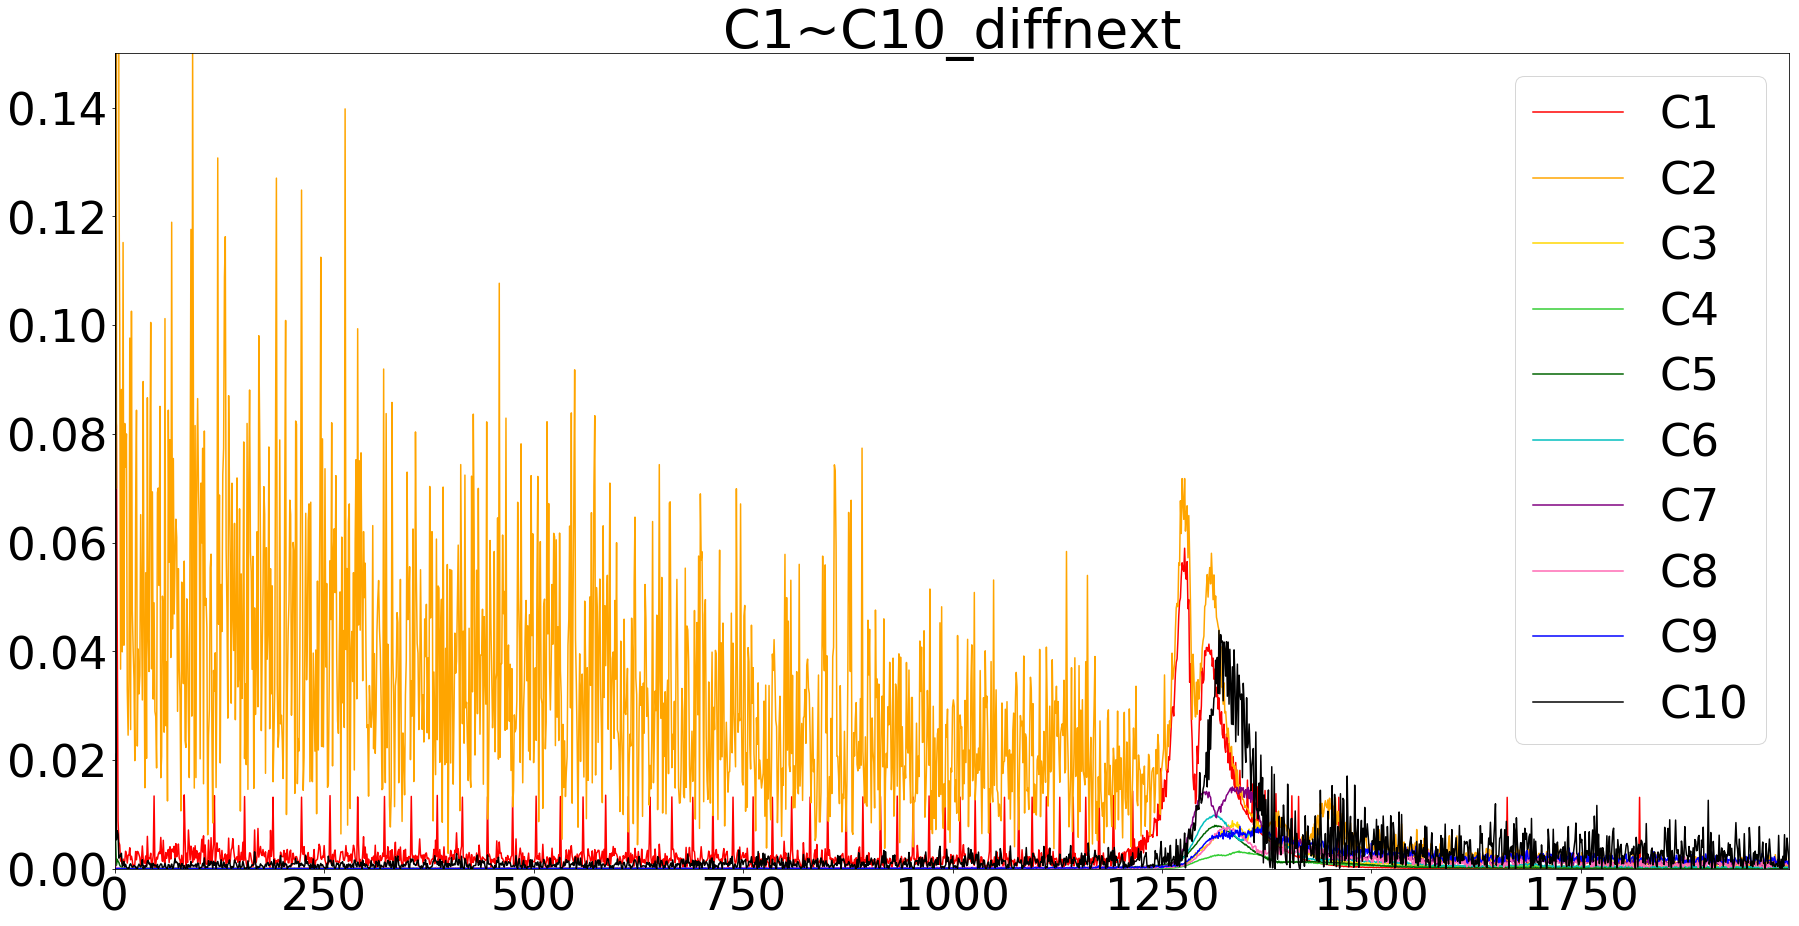

In [39]:
#plt.figure(figsize=(64,32))
y = 0.15
plt.rcParams["font.size"] = 45
c.iloc[:,0].plot(figsize=(30,15),legend=True,ylim=[0, y],xlim=[0, 1998],color="red", label='C1')#C1
c.iloc[:,1].plot(figsize=(30,15),legend=True,ylim=[0, y],xlim=[0, 1998],color="orange", label='C2')#C2
c.iloc[:,3].plot(figsize=(30,15),legend=True,ylim=[0, y],xlim=[0, 1998],color="gold", label='C3')#C3
c.iloc[:,4].plot(figsize=(30,15),legend=True,ylim=[0, y],xlim=[0, 1998],color="limegreen", label='C4')#C4
c.iloc[:,2].plot(figsize=(30,15),legend=True,ylim=[0, y],xlim=[0, 1998],color="darkgreen", label='C5')#C5
c.iloc[:,5].plot(figsize=(30,15),legend=True,ylim=[0, y],xlim=[0, 1998],color="c", label='C6')#C6
c.iloc[:,6].plot(figsize=(30,15),legend=True,ylim=[0, y],xlim=[0, 1998],color="purple", label='C7')#c7
c.iloc[:,7].plot(figsize=(30,15),legend=True,ylim=[0, y],xlim=[0, 1998],color="hotpink", label='C8')#C8
c.iloc[:,8].plot(figsize=(30,15),legend=True,ylim=[0, y],xlim=[0, 1998],color="blue", label='C9')#C9
c.iloc[:,9].plot(figsize=(30,15),legend=True,ylim=[0, y],xlim=[0, 1998],color="black", title='C1~C10_diffnext', label='C10')#C10

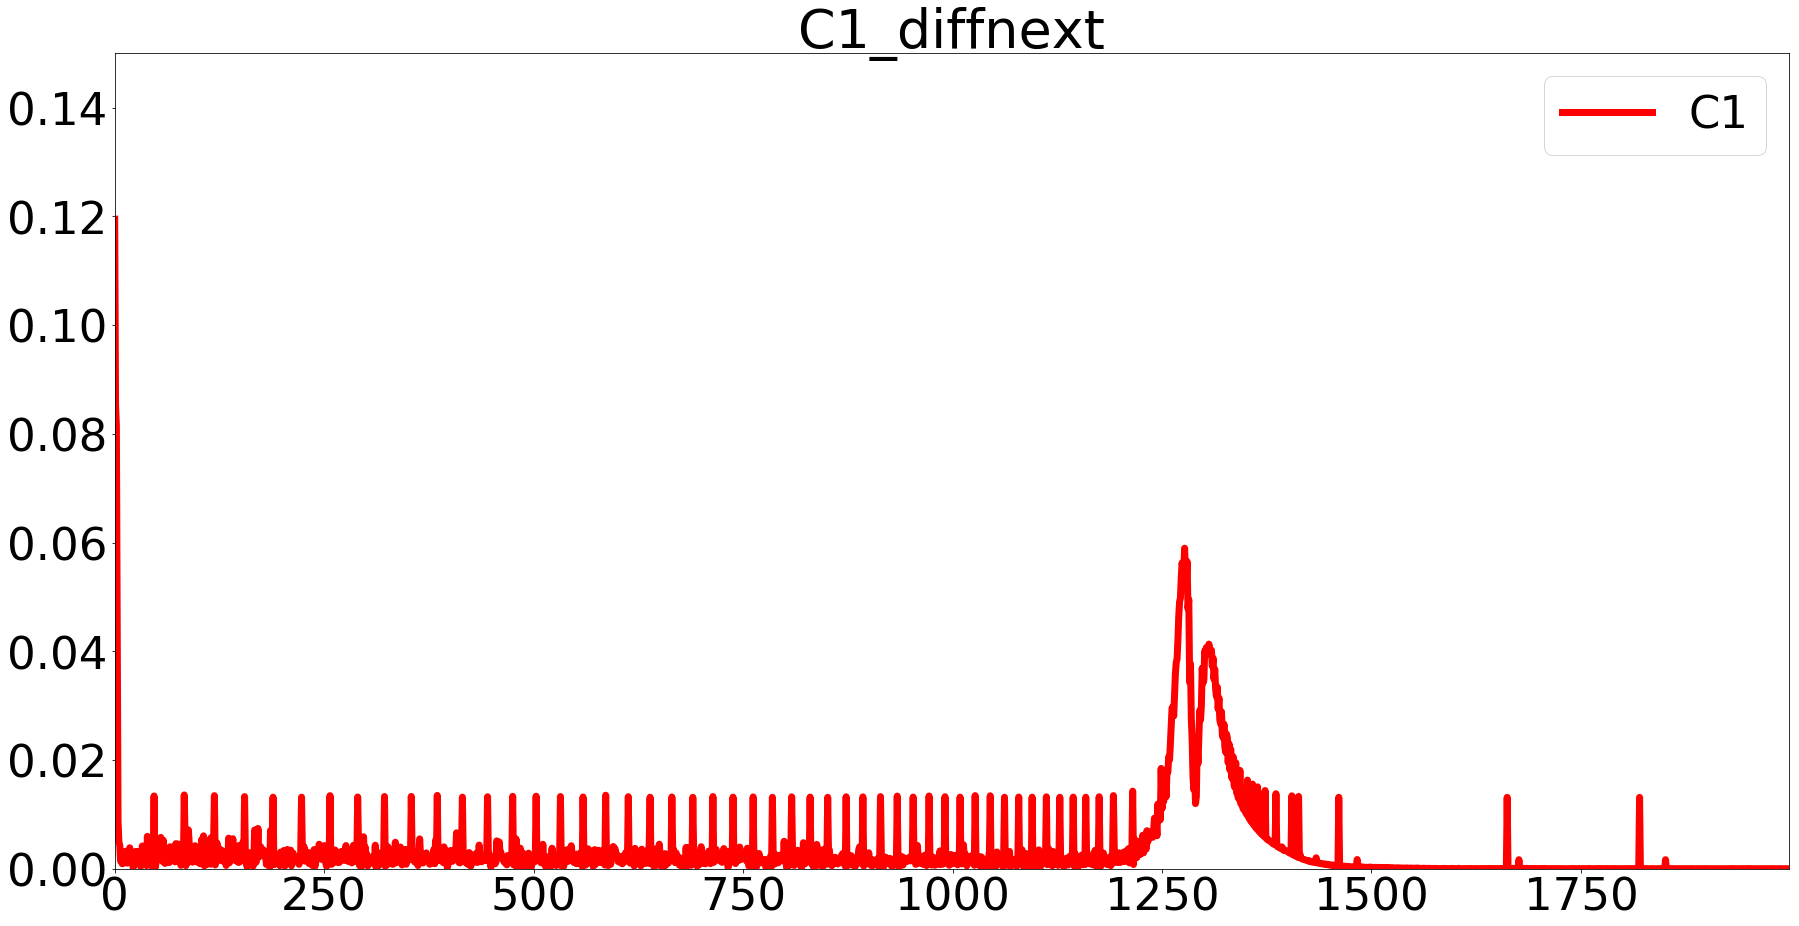

In [40]:
c.iloc[:,0].plot(figsize=(30,15),legend=True,ylim=[0, y],xlim=[0, 1998],color="red", title='C1_diffnext', linewidth=7, label='C1')#C1

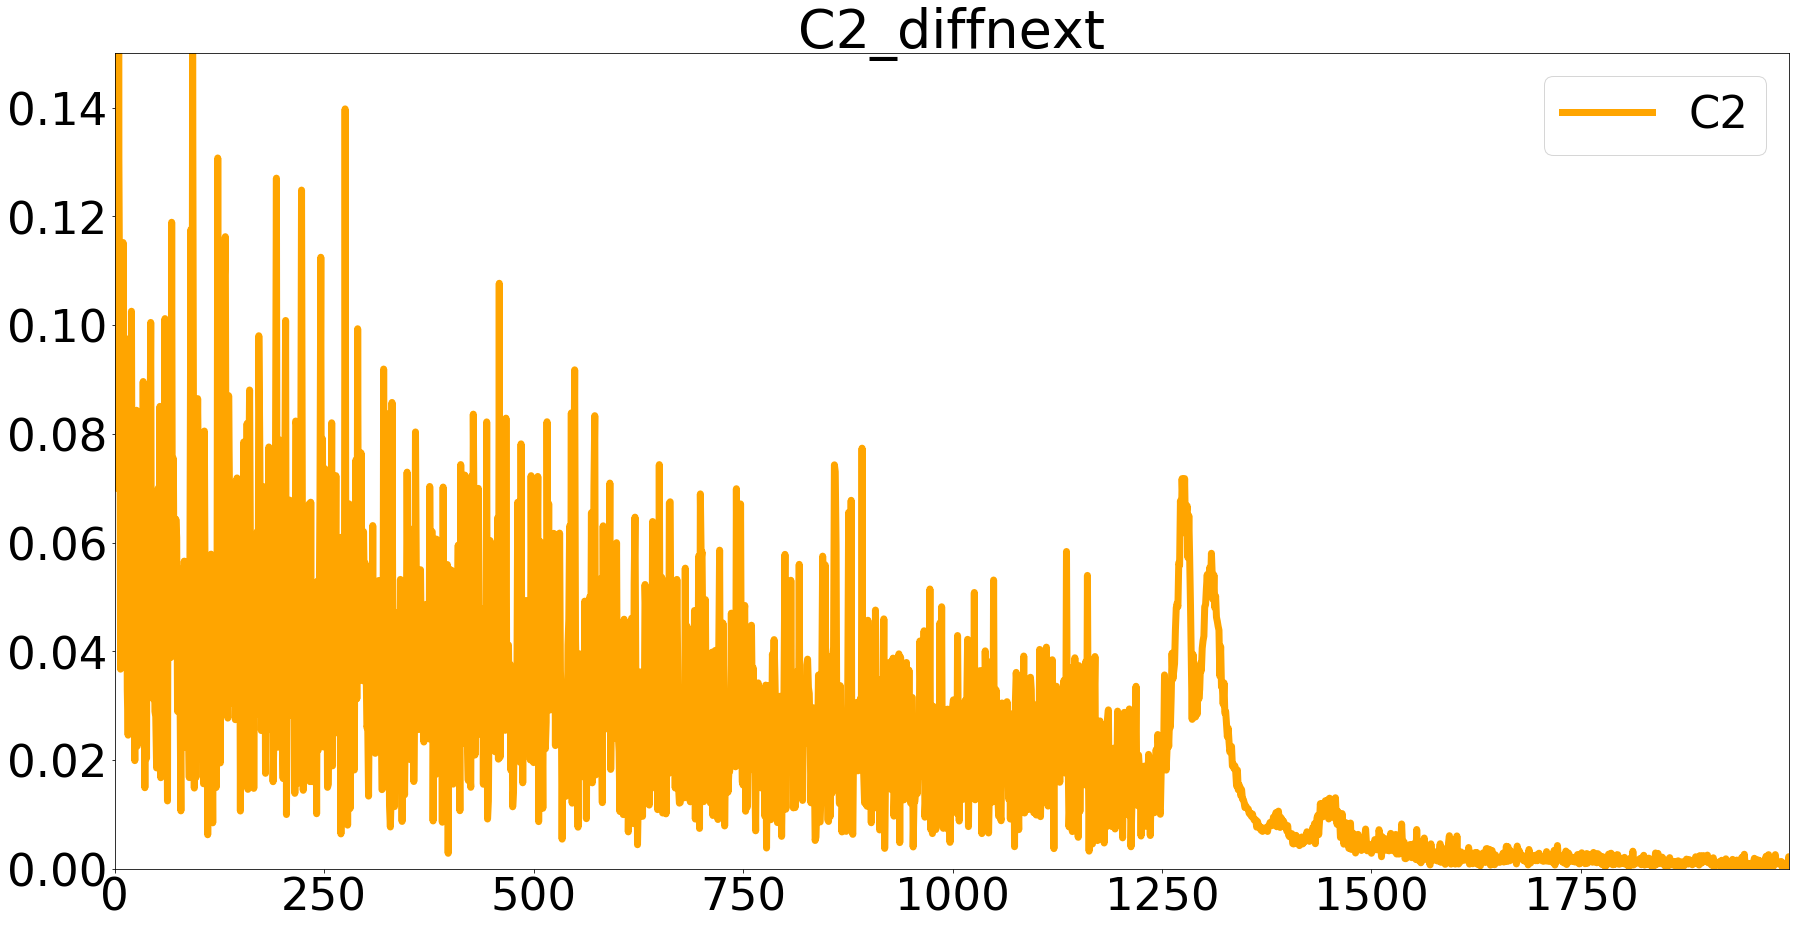

In [41]:
c.iloc[:,1].plot(figsize=(30,15),legend=True,ylim=[0, y],xlim=[0, 1998],color="orange", title='C2_diffnext', linewidth=7, label='C2')#C2

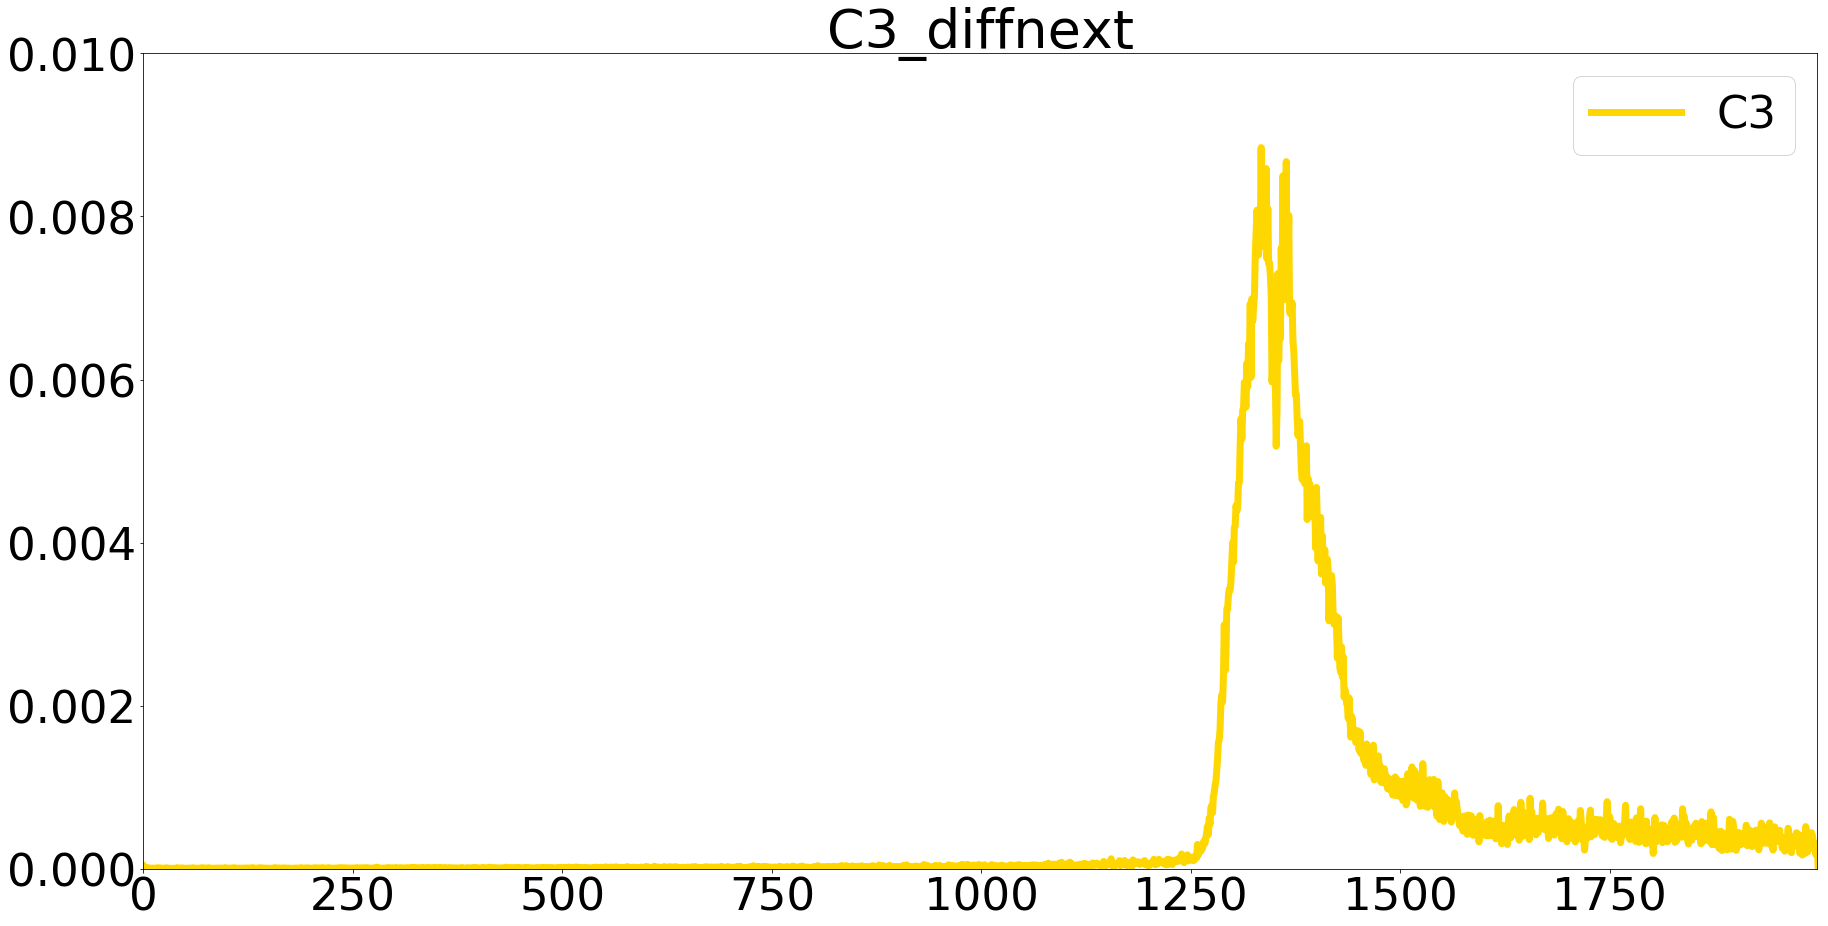

In [42]:
c.iloc[:,3].plot(figsize=(30,15),legend=True,ylim=[0, 0.01],xlim=[0, 1998],color="gold", title='C3_diffnext', linewidth=7, label='C3')#C3

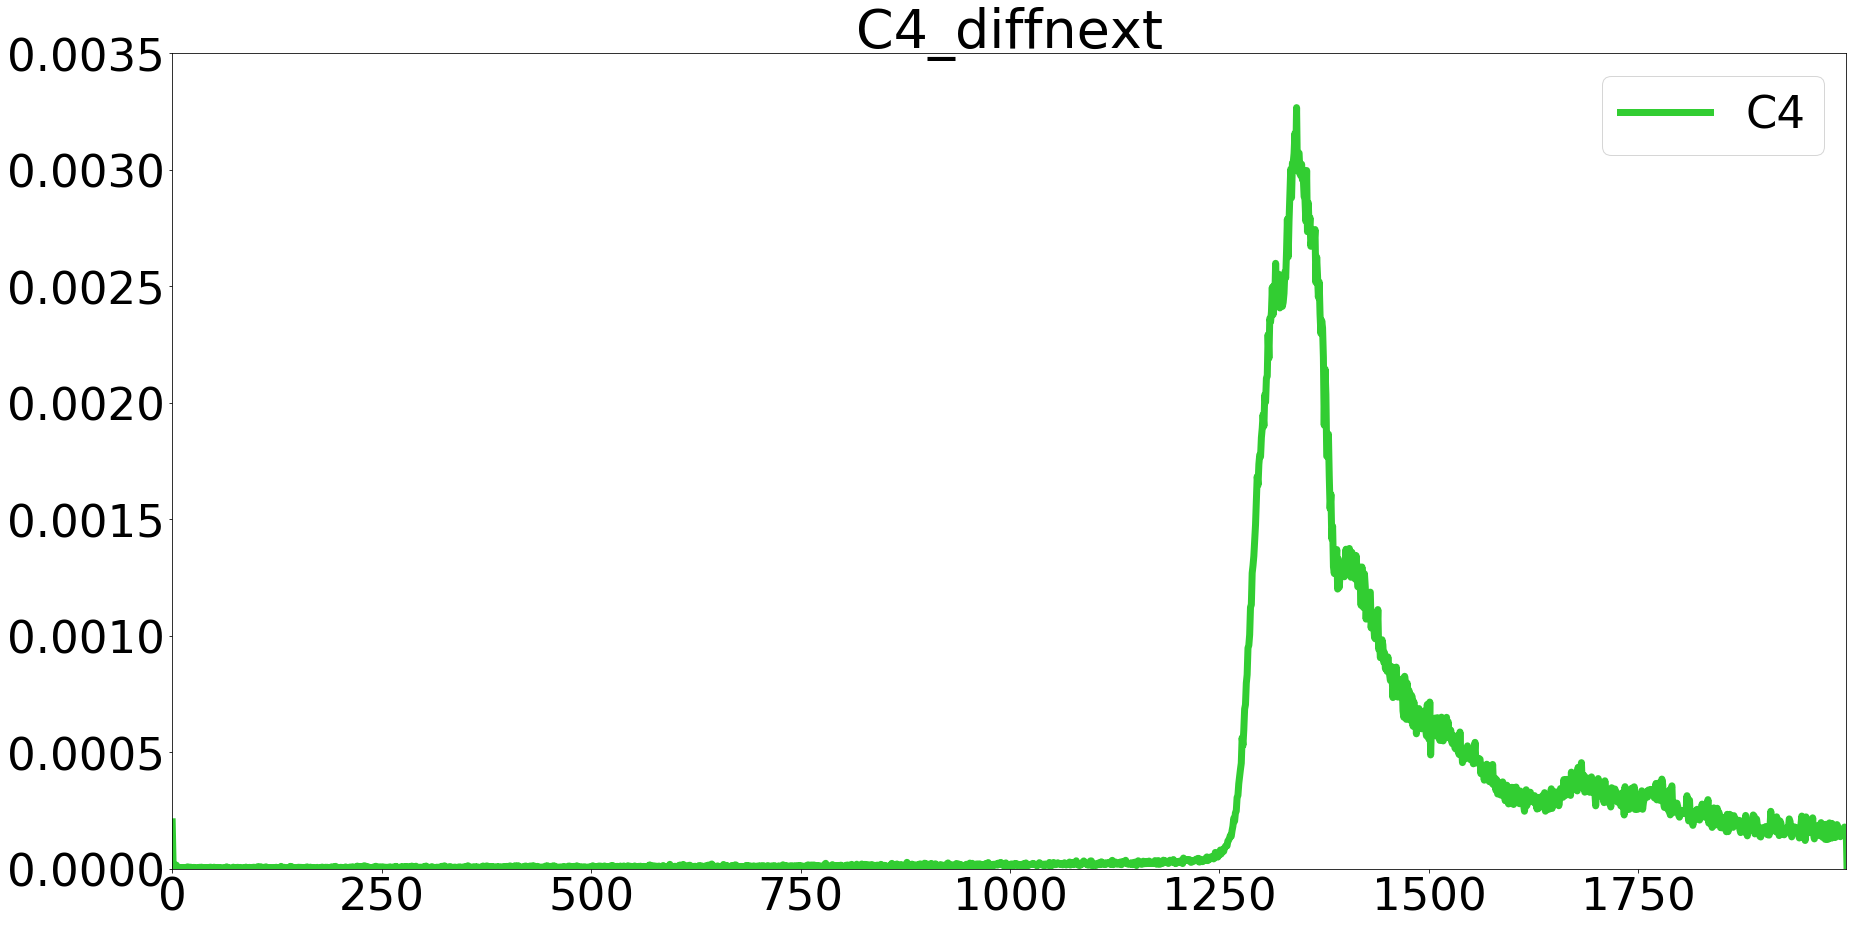

In [43]:
c.iloc[:,4].plot(figsize=(30,15),legend=True,ylim=[0, .0035],xlim=[0, 1998],color="limegreen", title='C4_diffnext', linewidth=7, label='C4')#C4

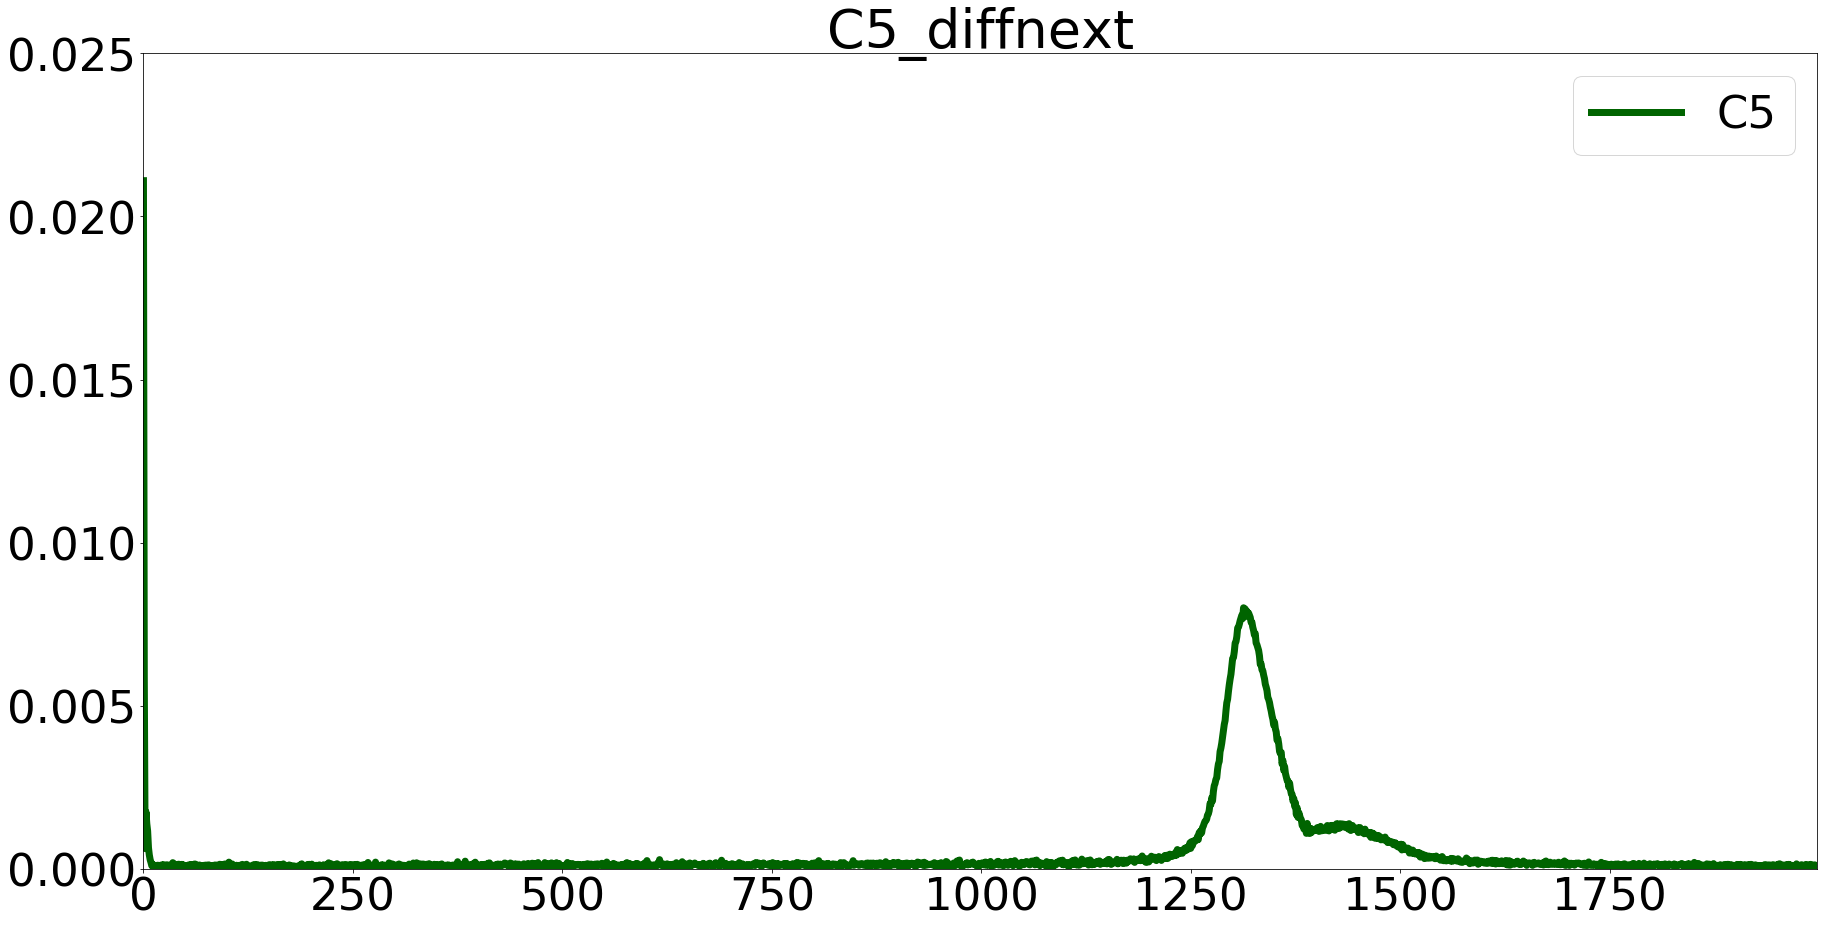

In [44]:
c.iloc[:,2].plot(figsize=(30,15),legend=True,ylim=[0, .025],xlim=[0, 1998],color="darkgreen", title='C5_diffnext', linewidth=7, label='C5')#C5

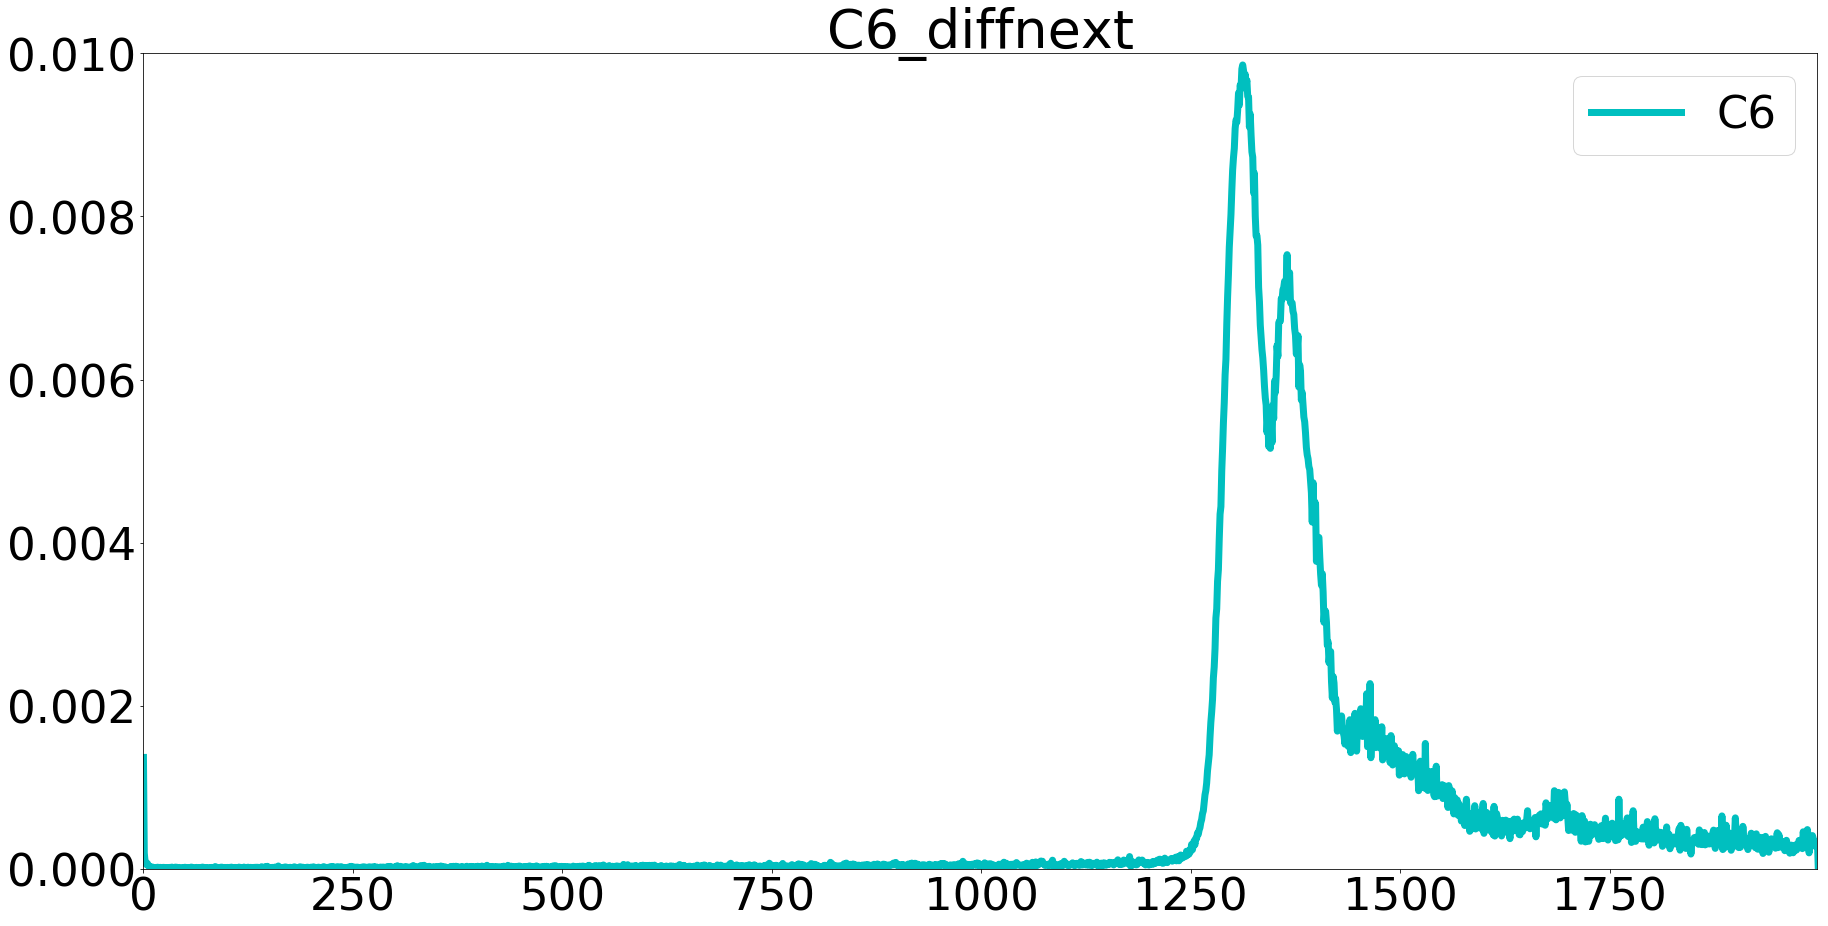

In [45]:
c.iloc[:,5].plot(figsize=(30,15),legend=True,ylim=[0, .01],xlim=[0, 1998],color="c", title='C6_diffnext', linewidth=7, label='C6')#C6

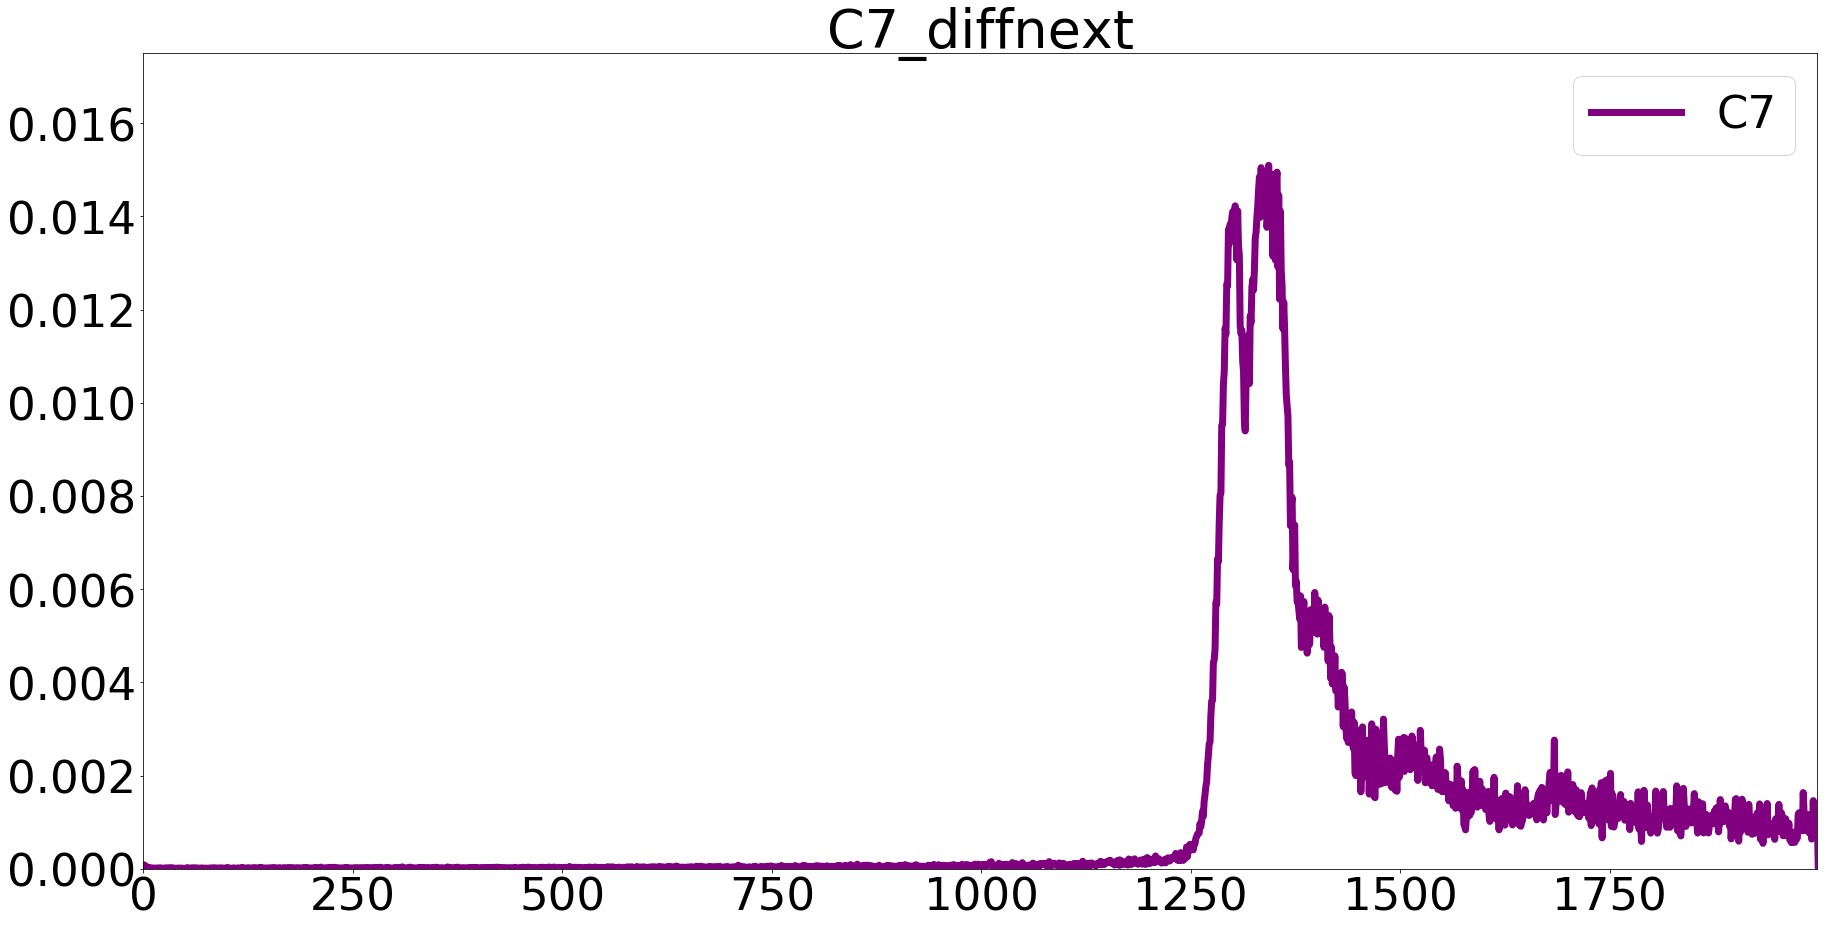

In [46]:
c.iloc[:,6].plot(figsize=(30,15),legend=True,ylim=[0, .0175],xlim=[0, 1998],color="purple", title='C7_diffnext', linewidth=7, label='C7')#c7

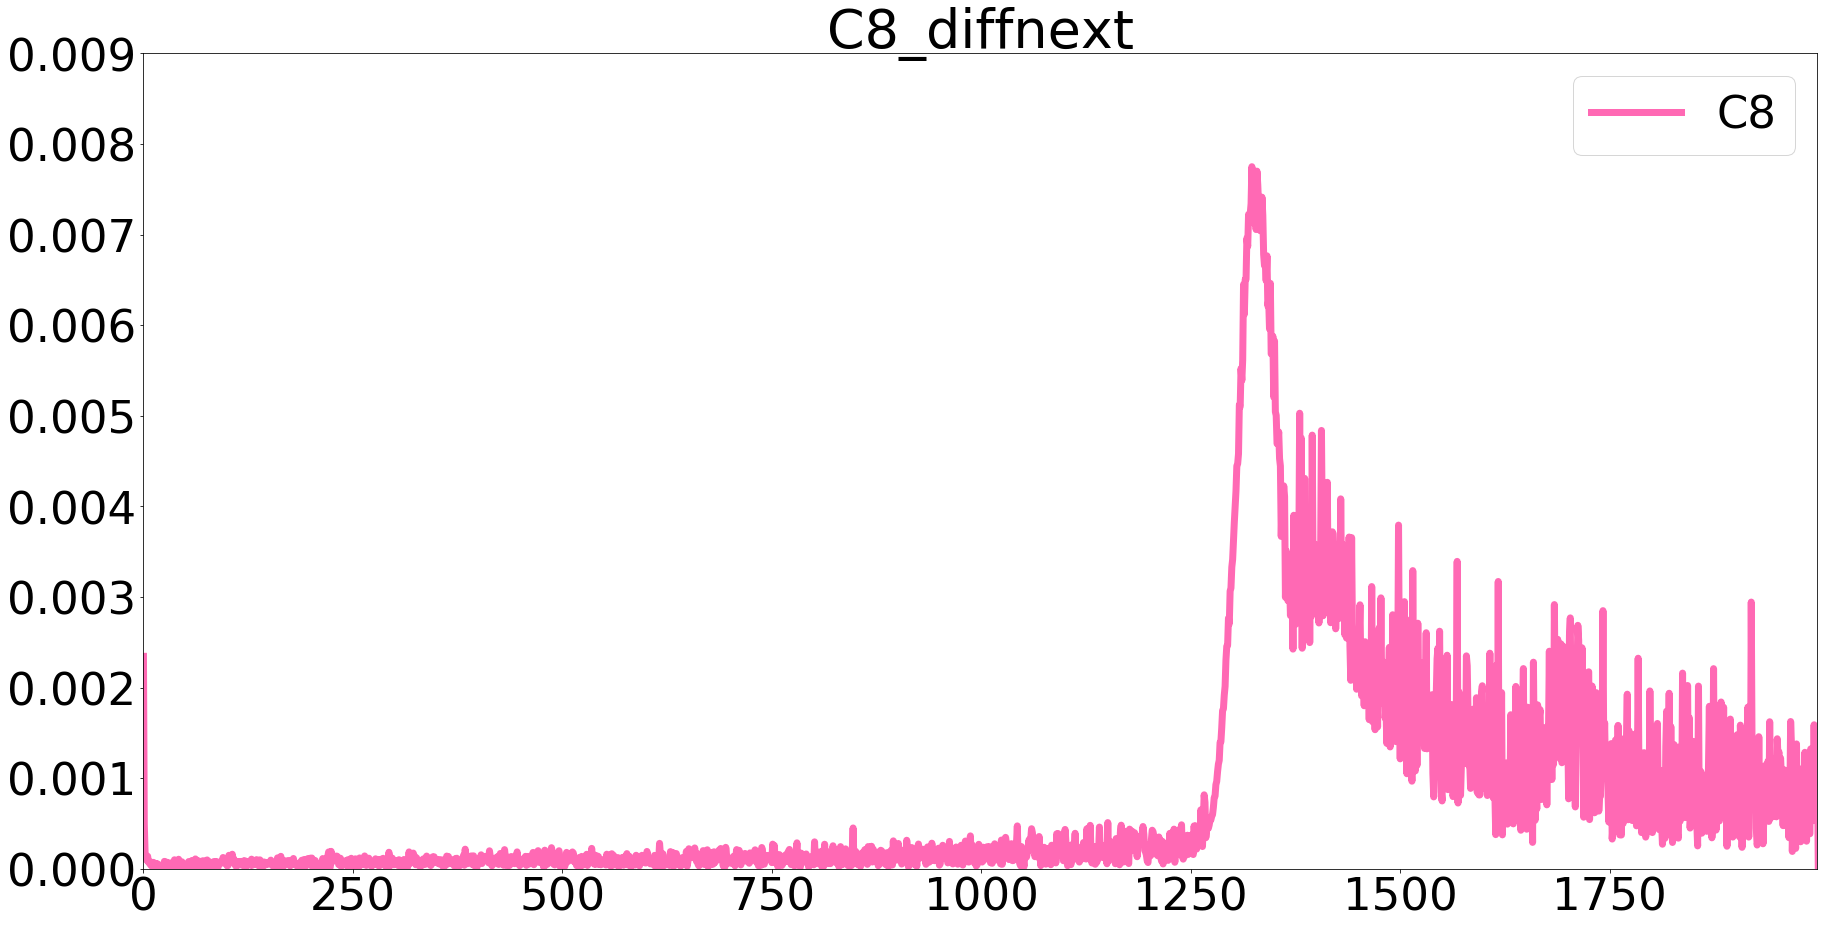

In [47]:
c.iloc[:,7].plot(figsize=(30,15),legend=True,ylim=[0, .009],xlim=[0, 1998],color="hotpink", title='C8_diffnext', linewidth=7, label='C8')#C8

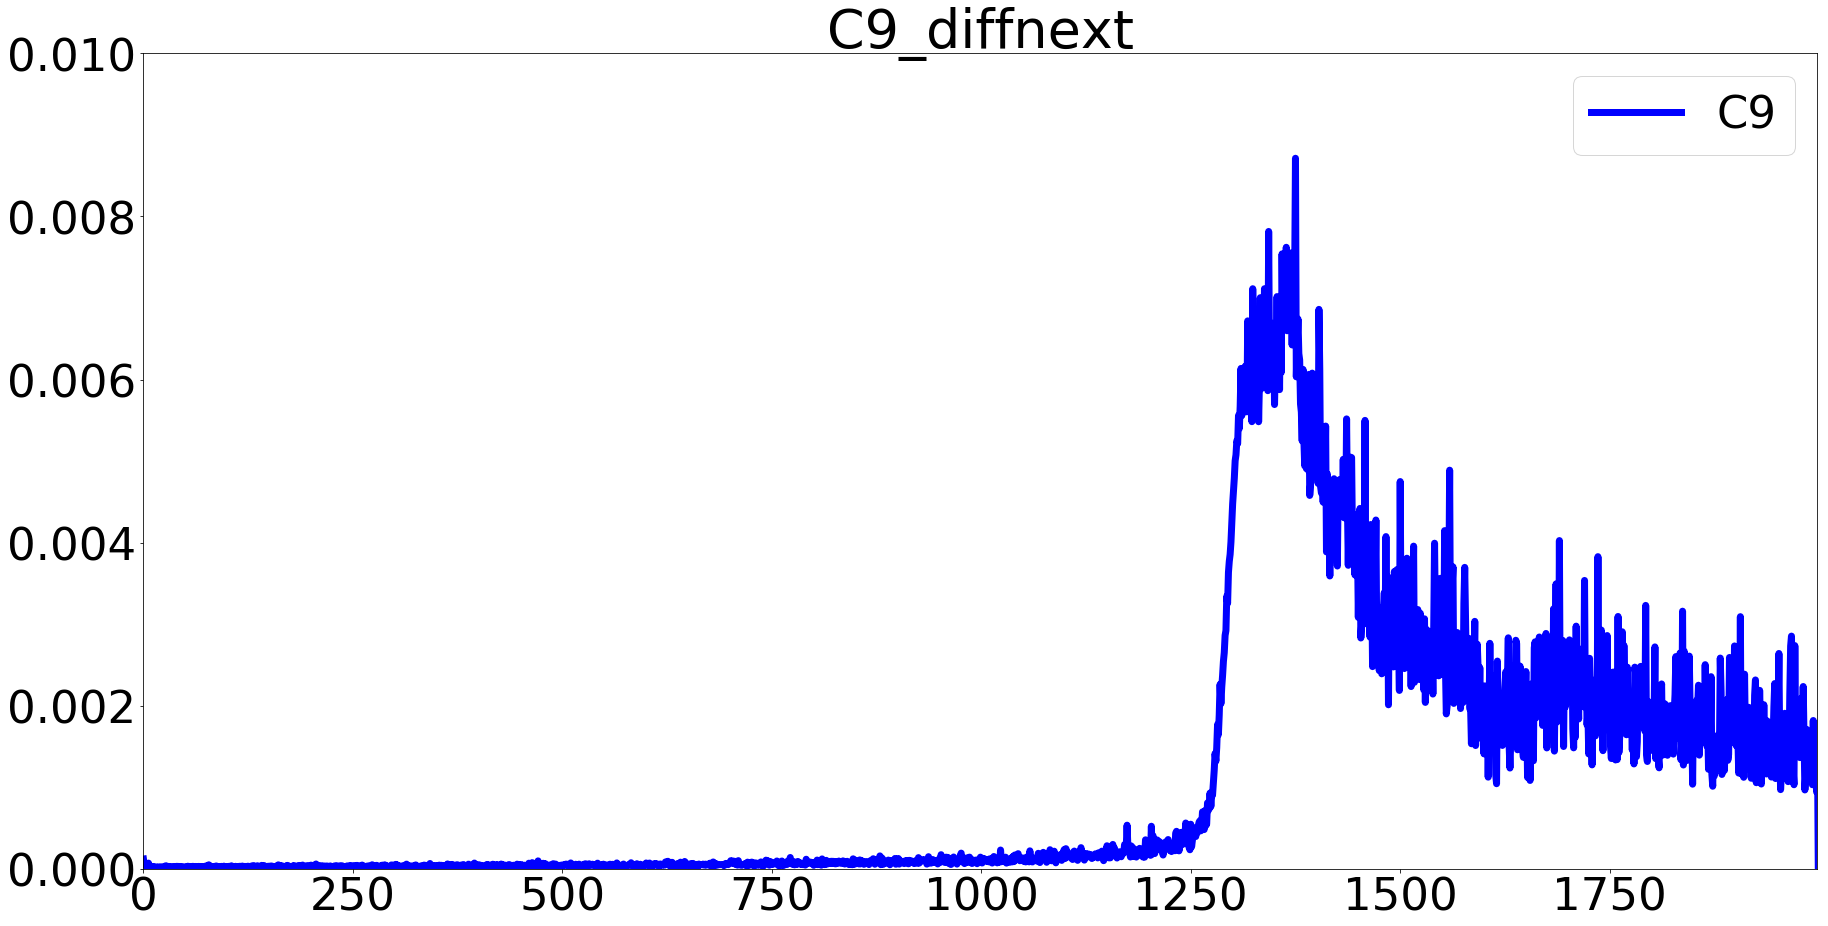

In [48]:
c.iloc[:,8].plot(figsize=(30,15),legend=True,ylim=[0, .01],xlim=[0, 1998],color="blue", title='C9_diffnext', linewidth=7, label='C9')#C9

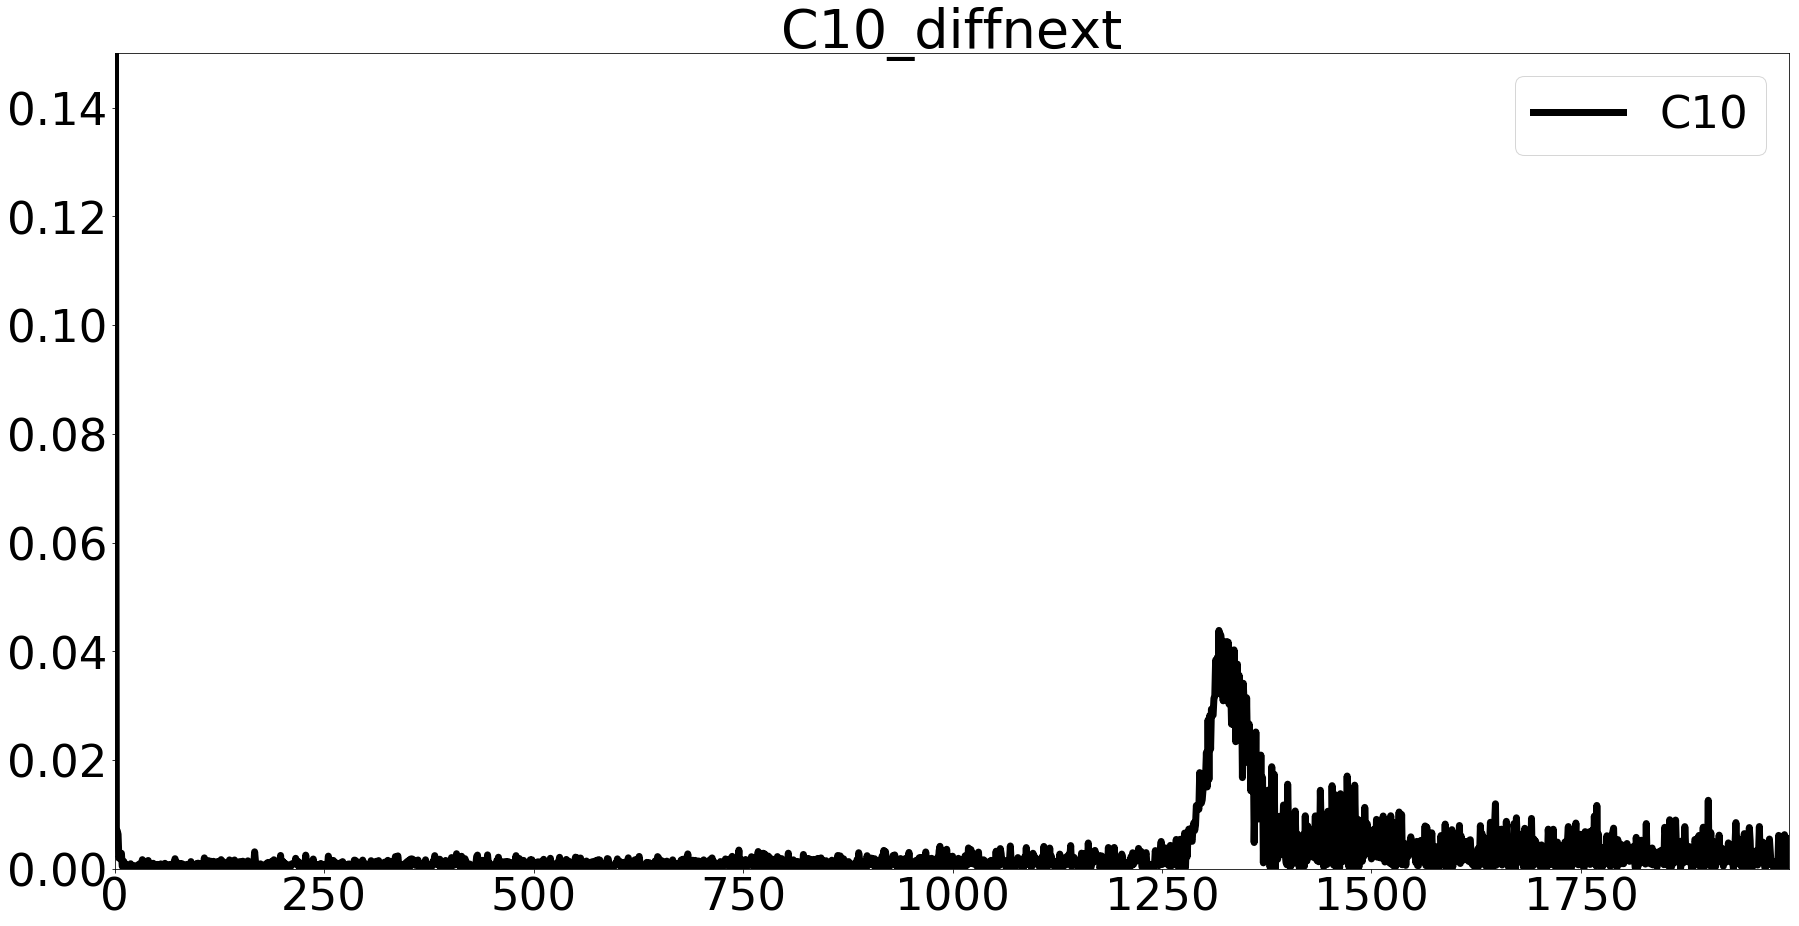

In [49]:
c.iloc[:,9].plot(figsize=(30,15),legend=True,ylim=[0, y],xlim=[0, 1998],color="black", title='C10_diffnext', linewidth=7, label='C10')#C10

In [50]:
maxIndex1  = [i for i, x in enumerate(c.iloc[1000:1500,0]) if x >= max(c.iloc[1000:1500,0]) - 0.001]
maxIndex2  = [i for i, x in enumerate(c.iloc[1000:1500,1]) if x >= max(c.iloc[1000:1500,1]) - 0.001]
maxIndex3  = [i for i, x in enumerate(c.iloc[1000:1500,2]) if x >= max(c.iloc[1000:1500,2]) - 0.001]
maxIndex4  = [i for i, x in enumerate(c.iloc[1000:1500,3]) if x >= max(c.iloc[1000:1500,3]) - 0.001]
maxIndex5  = [i for i, x in enumerate(c.iloc[1000:1500,4]) if x >= max(c.iloc[1000:1500,4]) - 0.001]
maxIndex6  = [i for i, x in enumerate(c.iloc[1000:1500,5]) if x >= max(c.iloc[1000:1500,5]) - 0.001]
maxIndex7  = [i for i, x in enumerate(c.iloc[1000:1500,6]) if x >= max(c.iloc[1000:1500,6]) - 0.001]
maxIndex8  = [i for i, x in enumerate(c.iloc[1000:1500,7]) if x >= max(c.iloc[1000:1500,7]) - 0.001]
maxIndex9  = [i for i, x in enumerate(c.iloc[1000:1500,8]) if x >= max(c.iloc[1000:1500,8]) - 0.001]
maxIndex10 = [i for i, x in enumerate(c.iloc[1000:1500,9]) if x >= max(c.iloc[1000:1500,9]) - 0.001]
maxIndexALL =[i for i, x in enumerate(d.values[1000:1500]) if x >= max(d.values[1000:1500]) - 0.001]
print(maxIndex1) 
print(maxIndex2)
print(maxIndex3)
print(maxIndex4)
print(maxIndex5)
print(maxIndex6)
print(maxIndex7)
print(maxIndex8)
print(maxIndex9)
print(maxIndex10)
print(maxIndexALL)

[277]
[274, 277]
[305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327]
[329, 332, 334, 336, 337, 338, 340, 342, 360, 364, 367]
[308, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373]
[303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322]
[300, 303, 306, 330, 331, 332, 334, 335, 336, 337, 338, 339, 340, 343, 345, 346, 347, 349, 350, 352, 353, 355, 357]
[317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 341]
[343, 375]
[318, 320]
[295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321,

In [51]:
#グラフの相関係数を求めることを考える
import seaborn as sns

In [52]:
dftrue = pd.DataFrame(df_distance_dict.values(), index=df_distance_dict.keys()).T
dftrue

IM_MAR    CF_MAR  BND_MMAR     CF_CA  BND_MCOR   CF_COUS   CF_CPAR  \
0     0.843424  0.348377  0.523834  0.170793  0.103296  0.289610  0.258030   
1     0.776023  0.326999  0.536059  0.170793  0.103373  0.290325  0.258036   
2     0.762485  0.296738  0.539112  0.170794  0.103384  0.290425  0.258035   
3     0.766508  0.345310  0.538870  0.170793  0.103382  0.290410  0.258034   
4     0.751216  0.345907  0.537541  0.170795  0.103377  0.290389  0.258033   
5     0.751949  0.335150  0.536585  0.170794  0.103374  0.290359  0.258032   
6     0.749949  0.266808  0.535799  0.170793  0.103367  0.290330  0.258033   
7     0.750006  0.299695  0.535304  0.170791  0.103364  0.290315  0.258034   
8     0.749901  0.312308  0.534995  0.170792  0.103363  0.290305  0.258035   
9     0.749686  0.311145  0.534809  0.170793  0.103361  0.290301  0.258032   
10    0.749449  0.337720  0.534673  0.170792  0.103361  0.290294  0.258030   
11    0.749571  0.303323  0.534623  0.170791  0.103361  0.290290  0.258029   
12    0.749726  0.292687  0.534525  0.170792  0.103360  0.290285  0.258030   
13    0.749455  0.294353  0.534525  0.170792  0.103360  0.290285  0.258030   
14    0.749078  0.304659  0.534500  0.170791  0.103359  0.290283  0.258032   
15    0.749288  0.293658  0.534516  0.170791  0.103359  0.290283  0.258032   
16    0.749446  0.291827  0.534525  0.170791  0.103358  0.290284  0.258031   
17    0.749392  0.289467  0.534504  0.170790  0.103357  0.290282  0.258033   
18    0.748705  0.289328  0.534497  0.170791  0.103358  0.290288  0.258033   
19    0.747893  0.295329  0.534485  0.170791  0.103359  0.290290  0.258032   
20    0.747484  0.286913  0.534474  0.170791  0.103360  0.290291  0.258031   
21    0.747239  0.289242  0.534425  0.170791  0.103359  0.290287  0.258029   
22    0.746887  0.273830  0.534470  0.170790  0.103359  0.290290  0.258031   
23    0.746849  0.279445  0.534415  0.170791  0.103360  0.290287  0.258028   
24    0.746907  0.282743  0.534416  0.170790  0.103361  0.290286  0.258029   
25    0.746999  0.273397  0.534352  0.170792  0.103361  0.290283  0.258029   
26    0.746519  0.257602  0.534360  0.170792  0.103361  0.290284  0.258029   
27    0.746670  0.280637  0.534352  0.170791  0.103361  0.290283  0.258031   
28    0.746313  0.280839  0.534367  0.170793  0.103361  0.290286  0.258031   
29    0.746201  0.290084  0.534339  0.170793  0.103361  0.290287  0.258031   
30    0.746387  0.310959  0.534316  0.170792  0.103359  0.290282  0.258032   
31    0.746285  0.305849  0.534310  0.170792  0.103360  0.290279  0.258032   
32    0.746306  0.284781  0.534256  0.170792  0.103359  0.290277  0.258035   
33    0.746456  0.262946  0.534229  0.170791  0.103358  0.290272  0.258034   
34    0.746680  0.249141  0.534203  0.170791  0.103359  0.290275  0.258034   
35    0.746448  0.260194  0.534177  0.170792  0.103358  0.290277  0.258033   
36    0.746534  0.281025  0.534067  0.170791  0.103359  0.290277  0.258033   
37    0.746249  0.287220  0.534076  0.170792  0.103359  0.290278  0.258031   
38    0.745877  0.270196  0.534082  0.170792  0.103358  0.290277  0.258030   
39    0.745795  0.271563  0.534055  0.170793  0.103357  0.290273  0.258031   
40    0.745906  0.286035  0.534020  0.170793  0.103357  0.290272  0.258030   
41    0.745602  0.305499  0.533983  0.170792  0.103356  0.290269  0.258029   
42    0.745834  0.310836  0.534004  0.170792  0.103356  0.290270  0.258029   
43    0.746127  0.338910  0.534038  0.170792  0.103358  0.290271  0.258029   
44    0.746418  0.309346  0.534011  0.170791  0.103358  0.290266  0.258030   
45    0.746438  0.300550  0.533950  0.170792  0.103358  0.290269  0.258030   
46    0.746589  0.281256  0.533933  0.170792  0.103357  0.290266  0.258031   
47    0.746686  0.287235  0.533976  0.170791  0.103356  0.290262  0.258031   
48    0.741640  0.288980  0.533951  0.170790  0.103355  0.290261  0.258032   
49    0.741549  0.280784  0.533981  0.170789  0.103355  0.290262  0.258032   
...        ...       ...      

In [53]:
df11 = pd.DataFrame(df_distance_dict3)
df11.columns = ['Call']

In [54]:
dflast=pd.concat([dftrue, df11], axis=1)
dflast=dflast[['IM_MAR','CF_MAR','CF_CA','BND_MCOR','BND_MMAR','CF_COUS', 'CF_CPAR', 'CF_RCOU', 'CF_RPAR', 'H0_PRO', 'Call']]
dflast2 = dflast.rename(columns={'IM_MAR': 'C1', 'CF_MAR': 'C2', 'CF_CA':'C3', 'BND_MCOR':'C4', 'BND_MMAR':'C5', 'CF_COUS':'C6', 'CF_CPAR':'C7', 'CF_RCOU':'C8', 'CF_RPAR':'C9', 'H0_PRO':'C10'})
dflast2

C1        C2        C3        C4        C5        C6        C7  \
0     0.843424  0.348377  0.170793  0.103296  0.523834  0.289610  0.258030   
1     0.776023  0.326999  0.170793  0.103373  0.536059  0.290325  0.258036   
2     0.762485  0.296738  0.170794  0.103384  0.539112  0.290425  0.258035   
3     0.766508  0.345310  0.170793  0.103382  0.538870  0.290410  0.258034   
4     0.751216  0.345907  0.170795  0.103377  0.537541  0.290389  0.258033   
5     0.751949  0.335150  0.170794  0.103374  0.536585  0.290359  0.258032   
6     0.749949  0.266808  0.170793  0.103367  0.535799  0.290330  0.258033   
7     0.750006  0.299695  0.170791  0.103364  0.535304  0.290315  0.258034   
8     0.749901  0.312308  0.170792  0.103363  0.534995  0.290305  0.258035   
9     0.749686  0.311145  0.170793  0.103361  0.534809  0.290301  0.258032   
10    0.749449  0.337720  0.170792  0.103361  0.534673  0.290294  0.258030   
11    0.749571  0.303323  0.170791  0.103361  0.534623  0.290290  0.258029   
12    0.749726  0.292687  0.170792  0.103360  0.534525  0.290285  0.258030   
13    0.749455  0.294353  0.170792  0.103360  0.534525  0.290285  0.258030   
14    0.749078  0.304659  0.170791  0.103359  0.534500  0.290283  0.258032   
15    0.749288  0.293658  0.170791  0.103359  0.534516  0.290283  0.258032   
16    0.749446  0.291827  0.170791  0.103358  0.534525  0.290284  0.258031   
17    0.749392  0.289467  0.170790  0.103357  0.534504  0.290282  0.258033   
18    0.748705  0.289328  0.170791  0.103358  0.534497  0.290288  0.258033   
19    0.747893  0.295329  0.170791  0.103359  0.534485  0.290290  0.258032   
20    0.747484  0.286913  0.170791  0.103360  0.534474  0.290291  0.258031   
21    0.747239  0.289242  0.170791  0.103359  0.534425  0.290287  0.258029   
22    0.746887  0.273830  0.170790  0.103359  0.534470  0.290290  0.258031   
23    0.746849  0.279445  0.170791  0.103360  0.534415  0.290287  0.258028   
24    0.746907  0.282743  0.170790  0.103361  0.534416  0.290286  0.258029   
25    0.746999  0.273397  0.170792  0.103361  0.534352  0.290283  0.258029   
26    0.746519  0.257602  0.170792  0.103361  0.534360  0.290284  0.258029   
27    0.746670  0.280637  0.170791  0.103361  0.534352  0.290283  0.258031   
28    0.746313  0.280839  0.170793  0.103361  0.534367  0.290286  0.258031   
29    0.746201  0.290084  0.170793  0.103361  0.534339  0.290287  0.258031   
30    0.746387  0.310959  0.170792  0.103359  0.534316  0.290282  0.258032   
31    0.746285  0.305849  0.170792  0.103360  0.534310  0.290279  0.258032   
32    0.746306  0.284781  0.170792  0.103359  0.534256  0.290277  0.258035   
33    0.746456  0.262946  0.170791  0.103358  0.534229  0.290272  0.258034   
34    0.746680  0.249141  0.170791  0.103359  0.534203  0.290275  0.258034   
35    0.746448  0.260194  0.170792  0.103358  0.534177  0.290277  0.258033   
36    0.746534  0.281025  0.170791  0.103359  0.534067  0.290277  0.258033   
37    0.746249  0.287220  0.170792  0.103359  0.534076  0.290278  0.258031   
38    0.745877  0.270196  0.170792  0.103358  0.534082  0.290277  0.258030   
39    0.745795  0.271563  0.170793  0.103357  0.534055  0.290273  0.258031   
40    0.745906  0.286035  0.170793  0.103357  0.534020  0.290272  0.258030   
41    0.745602  0.305499  0.170792  0.103356  0.533983  0.290269  0.258029   
42    0.745834  0.310836  0.170792  0.103356  0.534004  0.290270  0.258029   
43    0.746127  0.338910  0.170792  0.103358  0.534038  0.290271  0.258029   
44    0.746418  0.309346  0.170791  0.103358  0.534011  0.290266  0.258030   
45    0.746438  0.300550  0.170792  0.103358  0.533950  0.290269  0.258030   
46    0.746589  0.281256  0.170792  0.103357  0.533933  0.290266  0.258031   
47    0.746686  0.287235  0.170791  0.103356  0.533976  0.290262  0.258031   
48    0.741640  0.288980  0.170790  0.103355  0.533951  0.290261  0.258032   
49    0.741549  0.280784  0.170789  0.103355  0.533981  0.290262  0.258032   
...        ...       ...       ...

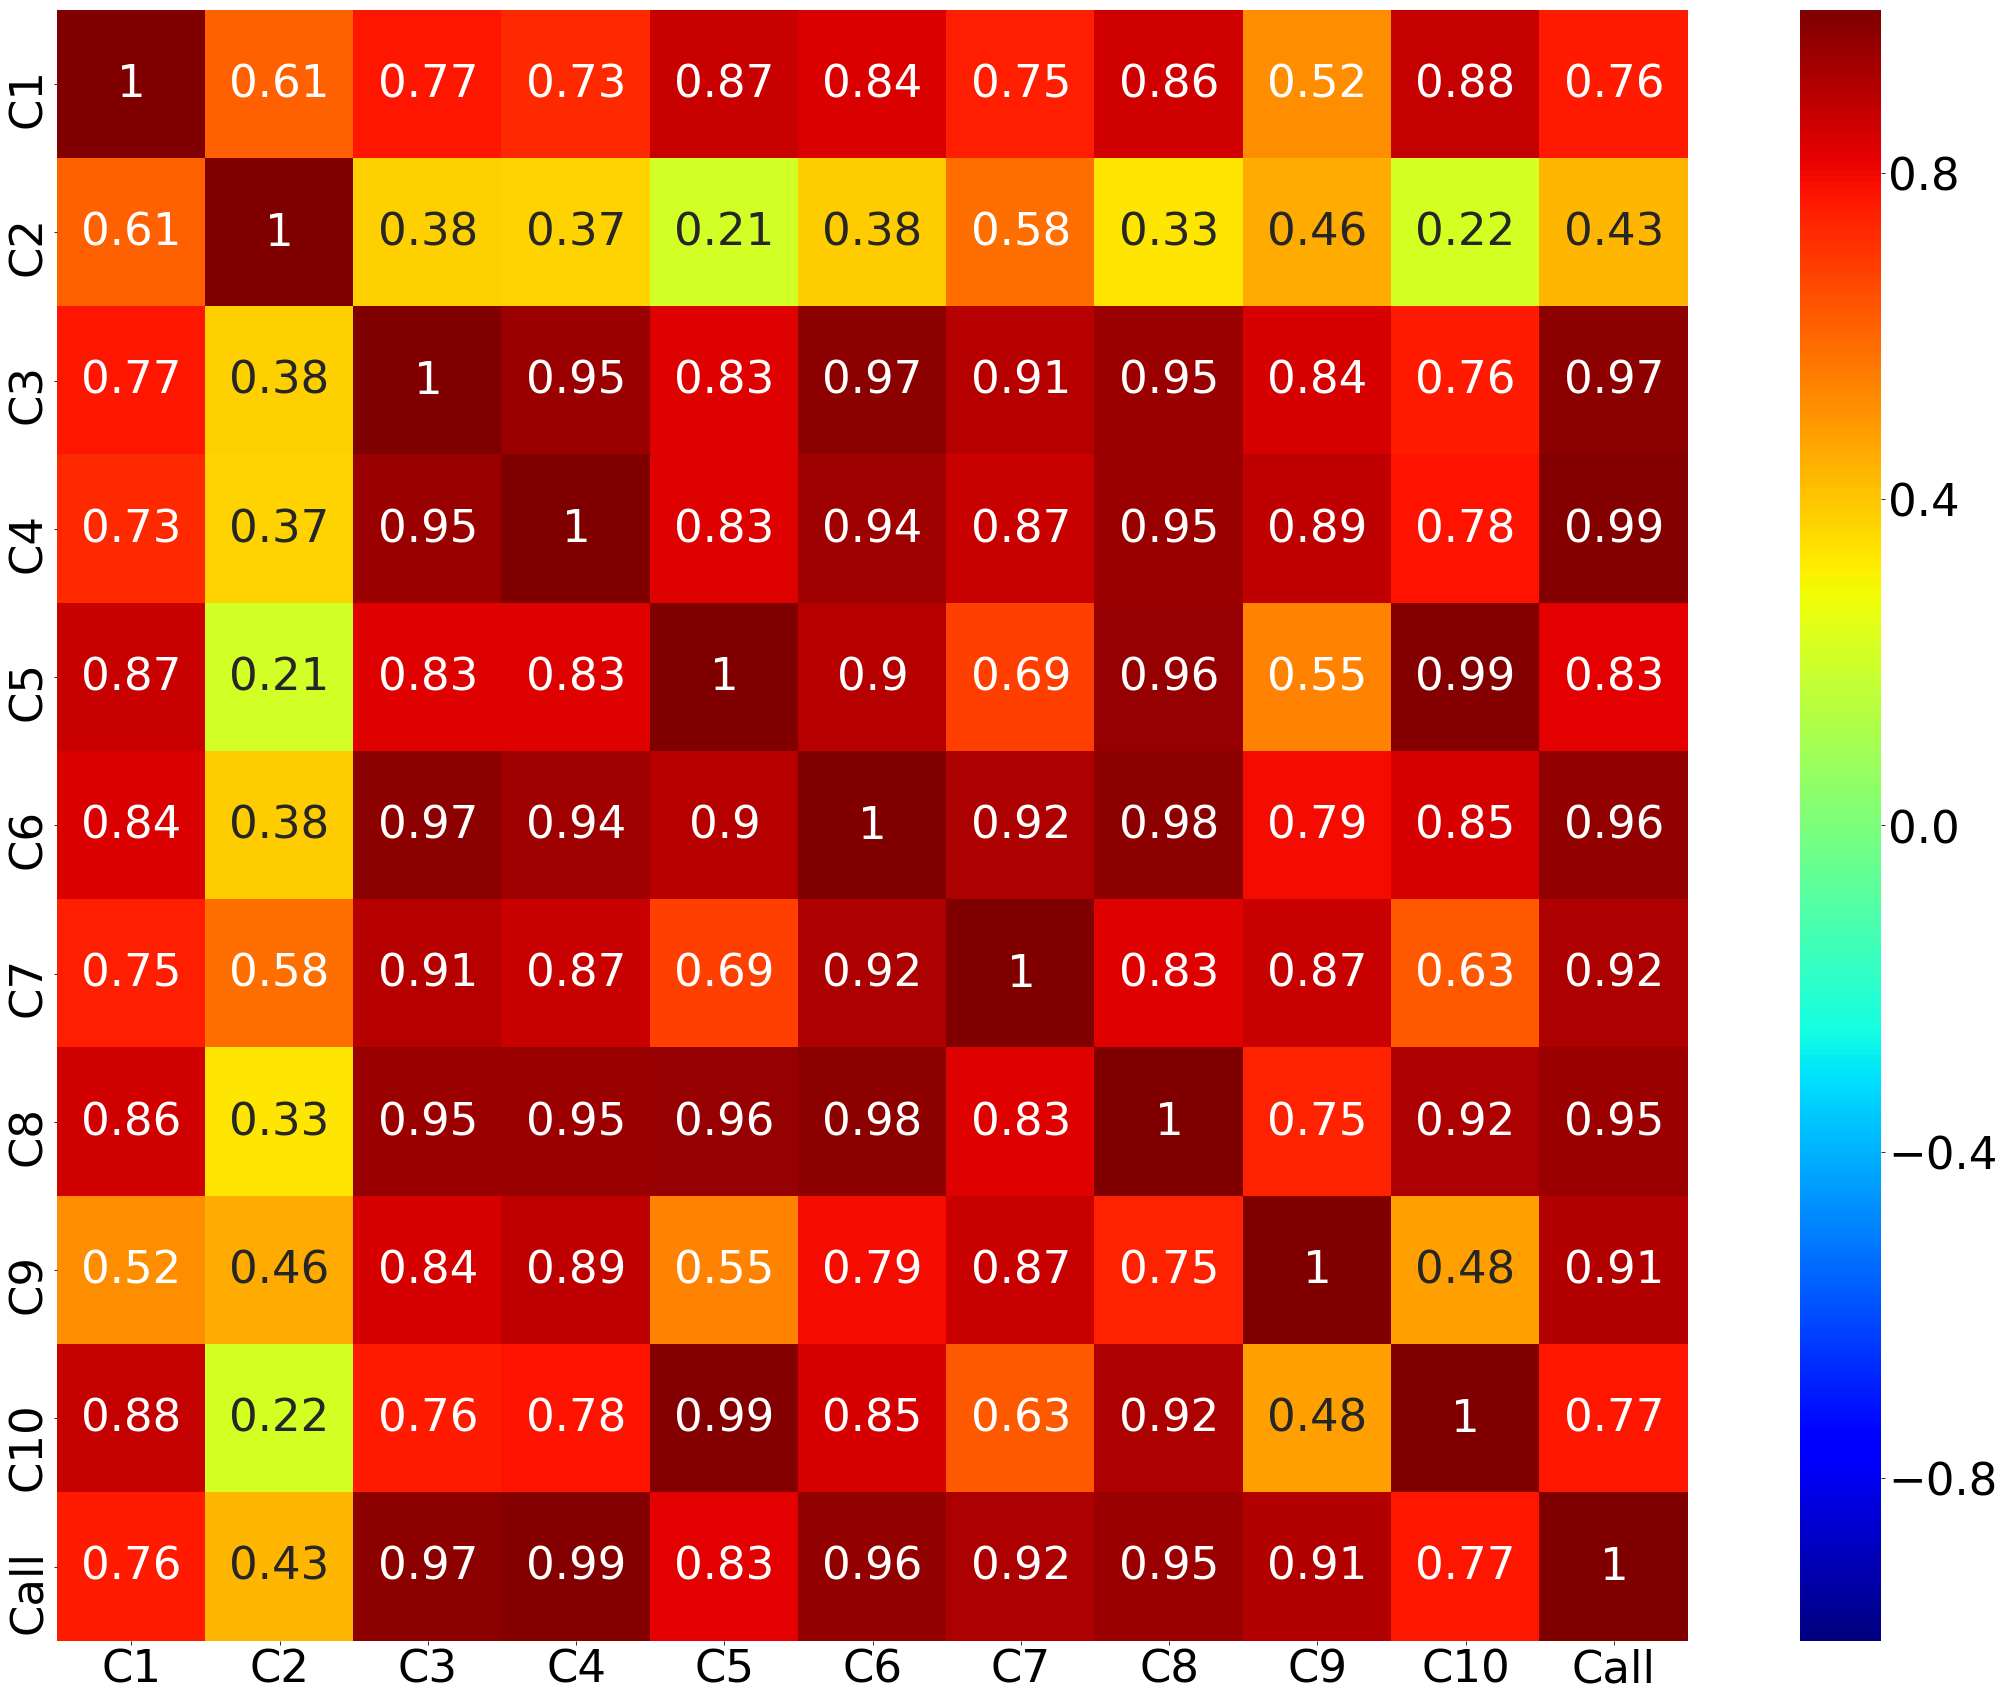

In [55]:
colormap = plt.cm.jet
fig, ax = plt.subplots(figsize=(40, 30))
sns.heatmap(dflast2.corr(),square=True, vmax=1.00, vmin=-1, center=0, cmap=colormap, linecolor='white', annot=True)
#difftrue(2000枚目の画像との画像統計量の差分グラフ)の相関関係

In [56]:
dflast_next=pd.concat([c, d], axis=1)
dflast_next
dflast_next=dflast_next[['IM_MAR','CF_MAR','CF_CA','BND_MCOR','BND_MMAR','CF_COUS', 'CF_CPAR', 'CF_RCOU', 'CF_RPAR', 'H0_PRO', 'Call']]
dflast_next
dflast2_next = dflast_next.rename(columns={'IM_MAR': 'C1', 'CF_MAR': 'C2', 'CF_CA':'C3', 'BND_MCOR':'C4', 'BND_MMAR':'C5', 'CF_COUS':'C6', 'CF_CPAR':'C7', 'CF_RCOU':'C8', 'CF_RPAR':'C9', 'H0_PRO':'C10'})
dflast2_next

C1        C2        C3        C4        C5        C6        C7  \
0     0.119508  0.312391  0.000033  0.000202  0.021098  0.001366  0.000061   
1     0.085383  0.231734  0.000007  0.000031  0.005851  0.000191  0.000028   
2     0.081470  0.070016  0.000012  0.000013  0.000619  0.000084  0.000073   
3     0.045155  0.418181  0.000017  0.000016  0.001746  0.000055  0.000055   
4     0.008843  0.427477  0.000011  0.000013  0.001380  0.000072  0.000033   
5     0.004919  0.130553  0.000012  0.000016  0.001158  0.000062  0.000022   
6     0.004388  0.099821  0.000010  0.000008  0.000645  0.000032  0.000028   
7     0.001425  0.036722  0.000011  0.000006  0.000425  0.000030  0.000014   
8     0.001557  0.088178  0.000009  0.000006  0.000281  0.000023  0.000015   
9     0.000928  0.039915  0.000007  0.000004  0.000193  0.000022  0.000010   
10    0.001797  0.115210  0.000008  0.000006  0.000091  0.000018  0.000018   
11    0.001077  0.041131  0.000005  0.000005  0.000142  0.000021  0.000013   
12    0.001402  0.081921  0.000007  0.000004  0.000084  0.000006  0.000017   
13    0.003236  0.073925  0.000008  0.000005  0.000066  0.000015  0.000014   
14    0.002606  0.079996  0.000003  0.000005  0.000096  0.000011  0.000008   
15    0.001048  0.032941  0.000004  0.000003  0.000081  0.000017  0.000011   
16    0.002487  0.024583  0.000008  0.000004  0.000059  0.000011  0.000017   
17    0.002491  0.034589  0.000007  0.000004  0.000111  0.000020  0.000011   
18    0.003865  0.097628  0.000013  0.000008  0.000055  0.000014  0.000009   
19    0.001657  0.025608  0.000008  0.000008  0.000059  0.000013  0.000020   
20    0.002304  0.102571  0.000004  0.000005  0.000107  0.000018  0.000013   
21    0.001524  0.047479  0.000009  0.000004  0.000105  0.000011  0.000016   
22    0.000212  0.040530  0.000006  0.000007  0.000117  0.000011  0.000015   
23    0.000699  0.035012  0.000007  0.000004  0.000059  0.000016  0.000011   
24    0.000742  0.019896  0.000005  0.000004  0.000127  0.000018  0.000010   
25    0.003181  0.065596  0.000004  0.000004  0.000083  0.000011  0.000015   
26    0.001655  0.084355  0.000007  0.000006  0.000089  0.000014  0.000019   
27    0.003204  0.022586  0.000012  0.000003  0.000055  0.000013  0.000016   
28    0.003098  0.040427  0.000006  0.000004  0.000124  0.000007  0.000020   
29    0.002616  0.032172  0.000007  0.000004  0.000100  0.000015  0.000018   
30    0.002093  0.035605  0.000006  0.000004  0.000059  0.000011  0.000008   
31    0.000414  0.065146  0.000005  0.000003  0.000113  0.000011  0.000018   
32    0.001741  0.048442  0.000007  0.000006  0.000091  0.000018  0.000020   
33    0.004201  0.031059  0.000007  0.000006  0.000064  0.000010  0.000009   
34    0.001890  0.089641  0.000006  0.000005  0.000082  0.000021  0.000017   
35    0.001084  0.045860  0.000006  0.000007  0.000188  0.000016  0.000011   
36    0.001038  0.014910  0.000005  0.000004  0.000041  0.000014  0.000016   
37    0.002366  0.054466  0.000006  0.000005  0.000146  0.000010  0.000009   
38    0.000590  0.020320  0.000005  0.000003  0.000095  0.000021  0.000011   
39    0.005968  0.086656  0.000009  0.000004  0.000124  0.000007  0.000011   
40    0.001670  0.042682  0.000006  0.000005  0.000107  0.000019  0.000011   
41    0.001938  0.036292  0.000011  0.000003  0.000069  0.000009  0.000016   
42    0.001873  0.073127  0.000009  0.000005  0.000142  0.000013  0.000014   
43    0.002856  0.100509  0.000006  0.000005  0.000051  0.000017  0.000014   
44    0.000492  0.036793  0.000007  0.000004  0.000109  0.000014  0.000014   
45    0.001188  0.069342  0.000010  0.000007  0.000100  0.000013  0.000017   
46    0.002487  0.031226  0.000007  0.000007  0.000136  0.000015  0.000014   
47    0.013396  0.048931  0.000009  0.000004  0.000068  0.000015  0.000013   
48    0.000165  0.028968  0.000004  0.000006  0.000113  0.000014  0.000008   
49    0.000746  0.028002  0.000005  0.000005  0.000097  0.000018  0.000011   
...        ...       ...       ...

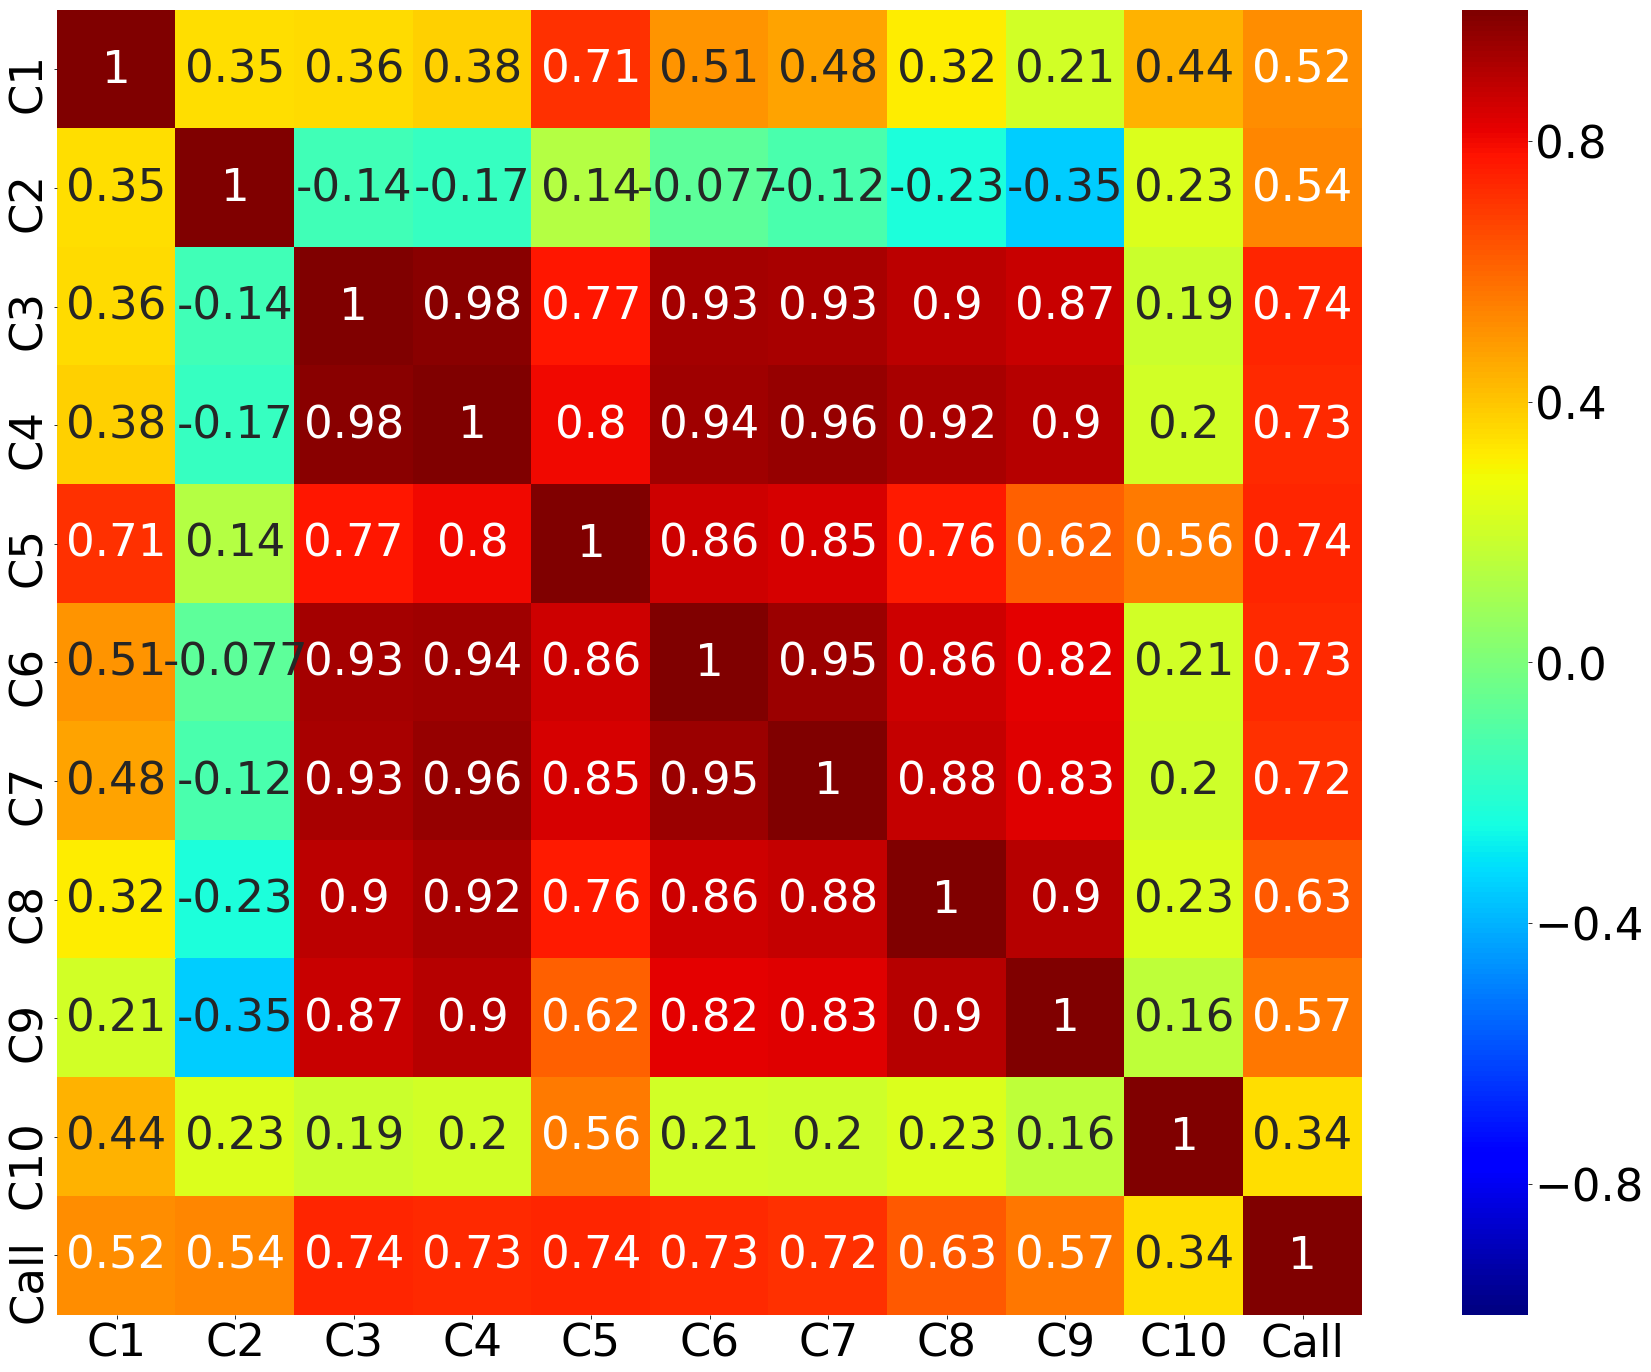

In [57]:
colormap = plt.cm.jet
fig, ax = plt.subplots(figsize=(36, 24))
sns.heatmap(dflast2_next.corr(),square=True, vmax=1.00, vmin=-1.00, center=0, cmap=colormap, linecolor='white', annot=True)
#diffnext(次の画像との統計量の差分)の相関関係